In [1]:
#Cargamos librerías
library(funModeling)
library(dplyr)
library(plotly)
options(scipen = 999) #evitamos la notación cientifica en las cifras.
options(warn = -1) #warnings
library(readr) #read_delim
library(tidyverse) #fct_reorder
#library(DT)
library(reshape2) #melt
library(DescTools) #winsorize
library(ggrepel) #geom_text_repel
library(ggpmisc) #annotate table
library(gridExtra) #tabla
library(fmsb) #radarchart

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


funModeling v.1.9.4 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:Hmisc’:

    subplot


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


T

# Análisis de información nutricional sobre alimentos comunes ('comunes' al menos en una dieta típica occidental)
La idea de este post es analizar datos nutricionales sobre alimentos. Voy a ir agregando algunos comentarios para contextualizar un poco lo que estamos viendo, con información obtenida de distintas fuentes que utilice para aportar mayor sentido y coherencia. <br/> 
Importante: para visualizar mejor las gráficas en la página de Kaggle, te recomiendo cerrar la tabla de contenidos que figura a la derecha.

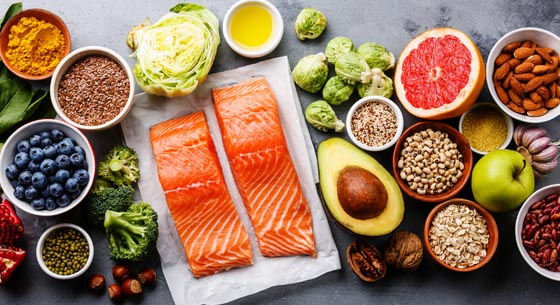

# Origen y preparación de datos

Según lo indicado por el autor del dataset, los datos fueron obtenidos por medio de Web Scraping a la web https://www.nutritionvalue.org/ <br/> 
Es un registro de aproximadamente 8800 alimentos, con información de sus macronutrientes, vitaminas y minerales.

In [2]:
#guardamos en un dataframe el set de datos
data=read_delim("../input/nutritional-values-for-common-foods-and-products/nutrition.csv", delim = ",")

New names:
* `` -> ...1

Rows: 8789 Columns: 77

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (74): name, serving_size, total_fat, saturated_fat, cholesterol, sodium,...
dbl  (3): ...1, calories, lucopene


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Inspeccionemos superficialmente el dataset:

In [3]:
head(data) #vemos los datos por arriba
# 8789 registros
# 77 columnas

...1,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,⋯,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,Cornstarch,100 g,381,0.1g,NA,0,9.00 mg,0.4 mg,0.00 mcg,⋯,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,⋯,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NA,0,2.00 mg,6.9 mg,22.00 mcg,⋯,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,⋯,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,⋯,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
5,"Cauliflower, raw",100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,⋯,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g


In [4]:
status(data)

,variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
...1,...1,1,0.0001137786,0,0.000000,0,0,numeric,8789
name,name,0,0.0000000000,0,0.000000,0,0,character,8789
serving_size,serving_size,0,0.0000000000,0,0.000000,0,0,character,1
calories,calories,39,0.0044373649,0,0.000000,0,0,numeric,671
total_fat,total_fat,0,0.0000000000,0,0.000000,0,0,character,176
saturated_fat,saturated_fat,0,0.0000000000,1590,0.180908,0,0,character,156
cholesterol,cholesterol,4079,0.4641028558,0,0.000000,0,0,character,313
sodium,sodium,162,0.0184321311,0,0.000000,0,0,character,1245
choline,choline,4016,0.4569348049,0,0.000000,0,0,character,1197


¿Qué representa cada columna?<br/> 
Te recomiendo leer el [diccionario de datos](https://docs.google.com/document/d/13ZNXDsYDZ-ctmsnF3UU4uiLg42txIjE-/edit?usp=sharing&ouid=114517844413562493811&rtpof=true&sd=true) para contextualizar un poco más el análisis <br/> 

**Temas a ajustar previo a las visualizaciones:**
* A) Eliminar columnas que no vamos a utilizar:
1. La columna 'X1' tiene el código identificador del alimento. No aporta nada a nuestro análisis 
1. 'serving_size' contiene siempre el mismo valor (100g). Tampoco aporta nada por si misma
1. 'lucopene' contiene siempre el mismo valor (0). 
1. 'Total_fat' representa casi el mismo valor que 'fat'
1. 'saturated_fat' representa casi el mismo valor que 'saturated_fatty_acids'
1. 'tocopherol_alfa" lo tomamos como sinonimo de vitamina E (que ya existe como otro campo, asi que quitamos tocoferol)
1. Eliminar del set de datos todos aquellos alimentos que hagan mención a marcas, ya que en algunos casos son muy repetitivos.
* B) Tipo de datos: convertir variables a numericas:
1. Todos los valores estan expresados junto a su unidad de medida (g=gramos, mg=miligramos, mcg=microgramos, UI=unidades internacionales). Cuando se usa la función read_delim para cargar por primera vez los datos, al detectar que tiene caracteres, le asigna el tipo "character". Esto puede traer un problema después ya que en algunos algoritmos (por ejemplo de clustering) solo se aceptan variables numericas.
* C) Cambio de nombres de variables y columnas calculadas:
1. Asignar a cada nombre de columna, su unidad de medida.



* A) Eliminar columnas que no vamos a utilizar

In [5]:
# columnas
data = data %>% select(-1) #eliminamos la primer columna (indice)
data = data %>% select(-serving_size,-lucopene,-total_fat,-saturated_fat,-tocopherol_alpha) #eliminamos otras columnas por nombre

* B) Tipo de datos: convertir variables a numericas

Excepto por 'name', todas las variables parecen tener valores numericos. Sin embargo, como vemos en la tabla de la función Status, la mayoria de las columnas son de tipo character. <br/> 
Esto sucede porque en esas variables, junto con el valor tambien muestran la unidad en la que está expresado el mismo (por ejemplo, muestra para un x alimento 13g de proteína. Esa "g" (de gramos) es un caracter entonces la función que usamos para cargar los datos asume que es de tipo caracter. <br/> 
La idea es pasar esas variables de "character" a "numeric", y la forma en que lo vamos a hacer es primero encontrando esos caracteres de unidades (g, mg, mcg, UI) y quitándolos, y luego simplemente convertir el tipo de datos a numerico.

In [6]:
# Primero resguardamos la columna 'name' y luego la quitamos del dataframe 
# (sino cuando cuando quitamos los caracteres de las unidades, tambien va a quitar caracteres de los nombres de alimentos)
name = data$name
data=data %>% select(-name)
# de las variables con las que me quedé, elimino todos los caracteres (pero no los numeros)
data[] <- lapply(data, function(x) as.numeric(gsub("[[:alpha:]]", "", x)))
#con el dataframe ya sin caracteres, vuelvo a tomar la columna name que quite antes y reordeno las columnas
data$name = name
data = data %>%  select(name,everything())

* C) Cambio de nombres de variables:
1. Asignar a cada nombre de columna, su unidad de medida.<br />
Como eliminamos todas las unidades de medida (UM) en las que estan expresados los valores (punto B), estamos perdiendo información valiosa. 
Ya que dentro de una misma columna, la UM no varía, podemos agregar esa información directamente en el nombre de la columna.

In [7]:
data = data %>% 
  rename(
    'calories_100g' = calories,
    #'total_fat_g' = total_fat,
    #'saturated_fat_g' = saturated_fat,
    'cholesterol_mg' = cholesterol,
    'sodium_mg'= sodium,
    'choline_mg'= choline,
    'folate_mcg' = folate,
    'folic_acid_mcg' = folic_acid,
    'niacin_mg' = niacin,
    'pantothenic_acid_mg' = pantothenic_acid,
    'riboflavin_mg' = riboflavin,
    'thiamin_mg' = thiamin,
    'vitamin_a_IU' = vitamin_a,
    'vitamin_a_rae_mcg' =  vitamin_a_rae,
    'carotene_alpha_mcg' = carotene_alpha,
    'carotene_beta_mcg' = carotene_beta,
    'cryptoxanthin_beta_mcg'= cryptoxanthin_beta,
    'lutein_zeaxanthin_mcg' =lutein_zeaxanthin,
    #'lucopene'=licopeno,
    'vitamin_b12_mcg'=vitamin_b12,
    'vitamin_b6_mg'=vitamin_b6,
    'vitamin_c_mg'=vitamin_c,
    'vitamin_d_IU'=vitamin_d,
    'vitamin_e_mg'=vitamin_e,
    #'tocopherol_alpha_mg'=tocopherol_alpha,
    'vitamin_k_mcg'=vitamin_k,
    'calcium_mg'=calcium,
    'copper_mg'=copper,
    'irom_mg' =irom,
    'magnesium_mg'=magnesium,
    'manganese_mg'=manganese,
    'phosphorous_mg'=phosphorous,
    'potassium_mg'=potassium,
    'selenium-(mcg)'=selenium,
    'zink_mg'=zink,
    'protein_g'=protein,
    'alanine_g'=alanine,
    'arginine_g'=arginine,
    'aspartic_acid_g'=aspartic_acid,
    'cystine_g'=cystine,
    'glutamic_acid_g'=glutamic_acid,
    'glycine_g'=glycine,
    'histidine_g'=histidine,
    'hydroxyproline_g'=hydroxyproline,
    'isoleucine_g'=isoleucine,
    'leucine_g'=leucine,
    'lysine_g'=lysine,
    'methionine_g'=methionine,
    'phenylalanine_g'=phenylalanine,
    'proline_g'=proline,
    'serine_g'=serine,
    'threonine_g'=threonine,
    'tryptophan_g'=tryptophan,
    'tyrosine_g'=tyrosine,
    'valine_g'=valine,
    'carbohydrate_g'=carbohydrate,
    'fiber_g'=fiber,
    'sugars_g'=sugars,
    'fructose_g'=fructose,
    'galactose_g'=galactose,
    'glucose_g'=glucose,
    'lactose_g'=lactose,
    'maltose_g'=maltose,
    'sucrose_g'=sucrose,
    'fat_g'=fat,
    'saturated_fatty_acids_g'=saturated_fatty_acids,
    'monounsaturated_fatty_acids_g'=monounsaturated_fatty_acids,
    'polyunsaturated_fatty_acids_g'=polyunsaturated_fatty_acids,
    'fatty_acids_total_trans_mg'=fatty_acids_total_trans,
    'alcohol_g'=alcohol,
    'ash_g'=ash,
    'caffeine_mg'=caffeine,
    'theobromine_mg'=theobromine,
    'water_g'=water
  )

Iremos haciendo más preparación de datos conforme lo necesiten las visualizaciones.

# ¿Qué son los nutrientes?

Los nutrientes son sustancias presentes en nuestro organismo y en alimentos, cuya ausencia o disminución por debajo de un limite pueden producir una enfermedad por carencia. 
Se clasifican en macro y micronutrientes, y la principal diferencia se relaciona con las cantidades que precisa nuestro organismo.<br/>  
**Macronutrientes:**  Son la mayor fuente de energía y volumen en la alimentacion.
* Proteínas (aportan 4kcal por cada gramo)
* Hidratos de carbono (aportan 4kcal por cada gramo)
* Grasas (aportan 9kcal por cada gramo)

**Micronutrientes:** Los precisamos en menos cantidades pero no por eso son irrelevantes.
* Vitaminas
* Minerales


https://unlp.edu.ar/frontend/media/40/27440/ab7339bdf91726af506ed2a232965841.pdf

**¿Qué papel cumplen las calorías?** <br />
Representan la energía que se encuentra en los alimentos. El cuerpo tiene una demanda constante de energía y utiliza las calorías de los alimentos para seguir funcionando

**Porcentaje de aporte calórico, por cada macronutriente**  <br />

Teniendo en cuenta las calorías que aporta cada macronutriente por gramo, podemos calcular que porcentaje de energía total aporta cada uno en un determinado alimento.

In [8]:
data$proteinas_porc=(data$protein_g*4)/data$calories_100g
data$carbs_porc=(data$carbohydrate_g*4)/data$calories_100g
data$grasas_porc=(data$fat_g*9)/data$calories_100g
#data%>% select(name, calories_100g,protein_g,carbohydrate_g,fat_g,proteinas_porc,carbs_porc,grasas_porc)

In [9]:
#-----------------------------------------------------------------------
# creamos columnas calculadas (Proteínas)
#-----------------------------------------------------------------------

data$AminEsenc = data$arginine_g + data$cystine_g + data$glycine_g + data$isoleucine_g + data$leucine_g + 
                 data$lysine_g + data$methionine_g + data$phenylalanine_g +
                 data$threonine_g + data$tryptophan_g + data$valine_g #defino el campo suma de aminoacidos esenciales

data$AminNoEsenc = data$alanine_g + data$aspartic_acid_g + data$glutamic_acid_g + data$histidine_g +
                   data$hydroxyproline_g  +  data$proline_g + data$serine_g + data$tyrosine_g #defino el campo suma de aminoacidos no esenciales

data$AminTotal_g=data$AminEsenc + data$AminNoEsenc  # la suma total de aminoacidos

data$BCAA_g=data$isoleucine_g + data$leucine_g + data$valine_g #aminoacidos ramificados
#-----------------------------------------------------------------------
# creamos columnas calculadas (Grasas)
#-----------------------------------------------------------------------
data$grasasInsaturadas_g = data$monounsaturated_fatty_acids_g + data$polyunsaturated_fatty_acids_g

# Análisis exploratorio

In [10]:
# Definimos la dimension de las visualizaciones que hagamos
#options(repr.plot.width=25, repr.plot.height=10)
plot_size <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}


#Con theme_set definimos el formato de las visualizaciones
my_theme = theme_bw() + theme(
    axis.text = element_text( angle = 0, color="black", size=21, face=1),
    axis.title = element_text(color="black",size=20, face=2),
    axis.title.x = element_text(face=1),
    axis.title.y = element_text(face=1),
    legend.key.size = unit(1.7,'cm'), legend.justification = "center",legend.key = element_rect(fill = "white", colour = "black"),
    legend.text = element_text(size = 18, colour = "black"),legend.title = element_text(size = 20, colour = "black"),
    plot.title=element_text(family='', face=1, colour='black', size=26)
  )
theme_set(my_theme)


# definimos una fuente general 
t <- list(
  family = "Arial",
  size = 14,
  color = 'black')

**Análisis estadístico**

Con la función profiling_num de FunModeling, podemos ver como se distribuyen las variables numericas. Más que nada me interesan promedio(mean), desviación standard(std_dev), coeficiente de variación y percentiles de los macronutrientes (proteínas, carbohidratos y grasas). <br/> 
El **promedio(mean)** es precisamente, el promedio o media. Muestra que el nivel medio de proteínas en todo este set de datos de alimentos es de 11.34 gramos. A simple vista suena a ser un número elevado, pero aca es donde entran en juego los percentiles, ya que pueden existir valores extremos (outliers) que esten 'elevando' mi promedio.<br/> 
La **desviación standard** nos ayuda a definir (en promedio) cuanto se desvía la variable, de su promedio. Es un poco confuso de leer, pero basicamente quiere decir que la proteína de cada alimento de nuestro set de datos, se desvía en promedio 10.53 gramos, de su promedio general (11.34 gramos). <br/> 
El **coeficiente de variación** es la división entre la desviación standard y el promedio. Muestra la relación entre la media y la variabilidad de la variable. <br/> 
Los **percentiles** en este caso me sirven para entender como se distribuyen estos tres macronutrientes.
Por ejemplo para proteínas el percentil 95 es 29.09, indicando que si ordenamos de menor a mayor la variable 'proteing_g', en el 95% de los casos el máximo valor es 29.09 gramos.  <br/> 

In [11]:
profiling_num(data) %>% select(variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99) %>% 
filter(variable=='protein_g' | variable=='carbohydrate_g' | variable =='fat_g')

variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
protein_g,11.34562,10.53060,0.9281648,0,0.07,2.38,8.02,19.88,29.092,35.1912
carbohydrate_g,22.12191,27.26626,1.2325453,0,0.00,0.05,9.34,34.91,78.686,88.5000
fat_g,10.55079,15.81487,1.4989270,0,0.04,0.95,5.13,13.72,34.600,100.0000


Otra forma de interpretar los percentiles es que para el 95% de los alimentos (casi el total), el máximo valor para proteínas es de 29.790 gramos. Hay valores superiores en ese 5% que resta, pero son pocos casos.  <br/> 
Analicemos lo mismo en histogramas: <br/> 
para la variable proteínas, la escala del eje x llega casi hasta 100, es decir que existen pocos valores muy altos (valores extremos u outliers).

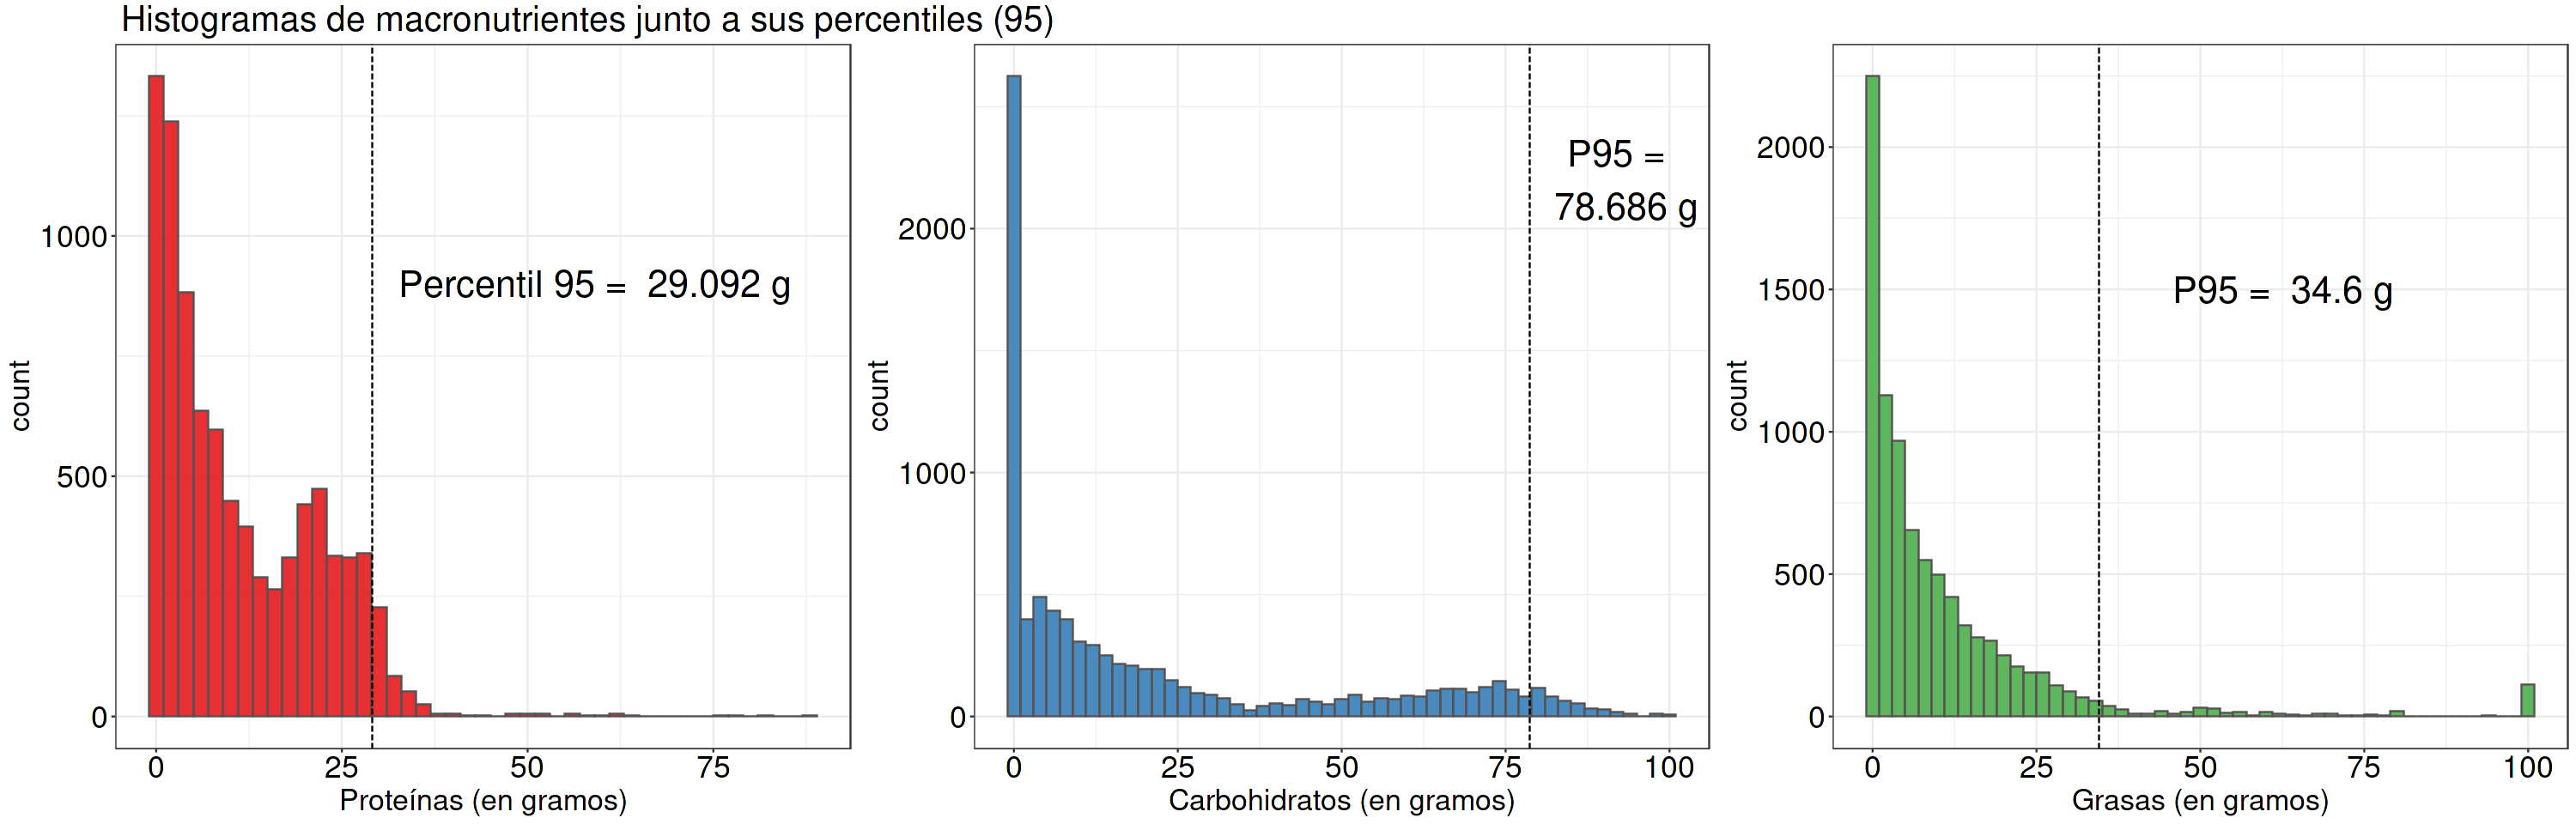

In [12]:
#options(repr.plot.width=25, repr.plot.height=8)
plot_size(25,8)

p95prot=quantile(data$protein_g,probs = .95)
p95carbs=quantile(data$carbohydrate_g,probs = .95)
p95fat=quantile(data$fat_g,probs = .95)

plot_proteina = ggplot(data, aes(x=protein_g)) +
geom_histogram(binwidth=2,fill="#e41a1c", color="#565152", alpha=0.9) +
xlab("Proteínas (en gramos)") + 
geom_vline(xintercept=p95prot, linetype = "longdash")+ #linea de referencia (indica el percentil)
 geom_text(x=p95prot+30,y=900,  #texto 'percentil 95'
    label=paste("Percentil 95 = ",p95prot,"g"), 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T,
           size = 9
  )

#color="#e9ecef"
plot_carbohidratos = ggplot(data, aes(x=carbohydrate_g)) +
geom_histogram(binwidth=2,fill="#377eb8", color="#565152", alpha=0.9) +
xlab("Carbohidratos (en gramos)") +
geom_vline(xintercept=p95carbs, linetype = "longdash")+ #linea de referencia (indica el percentil)
 geom_text(x=p95carbs+14,y=2200,
    label=paste("P95 = \n",p95carbs,"g"), 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T,
           size = 9
  )

plot_grasas = ggplot(data, aes(x=fat_g)) +
geom_histogram(binwidth=2,fill="#4daf4a", color="#565152", alpha=0.9) +
xlab("Grasas (en gramos)") +
geom_vline(xintercept=p95fat, linetype = "longdash")+ #linea de referencia (indica el percentil)
 geom_text(x=p95fat+28,y=1500,
           label=paste("P95 = ",p95fat,"g"), 
           nudge_x = 0.25, nudge_y = 0.25, 
           check_overlap = T,
           size = 9
  )

library(ggpubr)
mix_perc=ggarrange(plot_proteina, plot_carbohidratos,plot_grasas, ncol=3, common.legend = TRUE, legend="bottom")

annotate_figure(mix_perc,top=text_grob("Histogramas de macronutrientes junto a sus percentiles (95)", color = "black", size = 24, hjust=1.25))

**NRF (Nutrient Rich Foods)** es un sistema de puntuación para clasificar alimentos según su contenido y calidad de nutrientes. <br />
Se calcula como la suma de los porcentajes de valores diarios recomendados de nutrientes a promover, menos la suma de porcentajes de los valores máximos recomendados de nutrientes a limitar.<br />
Existen distintos modelos de NRF, los cuáles consideran mayor o menor cantidad de nutrientes (por ejemplo NRF9.3, NRF11.3, etc.)  <br />
En este análisis, utilizaremos el NRF15.3 (15 nutrientes a promover, 3 nutrientes a limitar)
* **A promover (15):** proteínas, fibra, grasa monoinsaturada, vitaminas (A, C, D, E, tiamina, riboflavina, B12, folato) y minerales (calcio, hierro, zink, potasio).
* **A limitar (3):** azúcares totales (en algunos modelos toman solo azúcar agregada), grasas saturadas y sodio.

Si te interesa conocer más: <br />
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4462757/ <br />
https://academic.oup.com/jn/article/139/8/1549/4670510<br />
https://www.fda.gov/food/new-nutrition-facts-label/daily-value-new-nutrition-and-supplement-facts-labels#1

Nota:  para calcular este índice, se toman en cuenta solamente los nutrientes comentados anteriormente como parámetros. Esto quiere decir que el puntaje que se le asigna a cada alimento, es considerando esos nutrientes y nada más (por ejemplo, NRF15.3 no considera como nutriente a limitar a las grasas trans).

In [13]:
data$vitamin_d_mcg = data$vitamin_d_IU*0.025 #CONVERSIÓN VITAMINA D: 1 IU = 0.025 mcg    
#en este set de datos, vitamina D viene expresado en UI(Unidades Internacionales). 
#a la fecha de publicado este análisis, la FDA considera los valores diarios recomendados en mcg(Microgramos), por lo que hacemos la conversión
#https://dsid.od.nih.gov/Conversions.php

# para hacer el cálculo del NRF15.3 es necesario obtener los alimentos y sus nutrientes considerados para 100kcal 
# en el set de datos los nutrientes que se muestran están expresados segun 100 gramos del alimento, por lo que primero debemos expresar los nutrientes según 100 kcal
dataNRF= data%>%select(name,calories_100g,protein_g,fiber_g,monounsaturated_fatty_acids_g,vitamin_a_rae_mcg,vitamin_c_mg,vitamin_d_mcg,
                       vitamin_e_mg,thiamin_mg,riboflavin_mg,vitamin_b12_mcg,folate_mcg,
                       calcium_mg,irom_mg,potassium_mg,zink_mg,saturated_fatty_acids_g,sugars_g,sodium_mg)

df <- data.frame(calorias = numeric(8789)) #creamos un df de 0. Declaramos las filas totales (las mismas que el set de datos), y agregamos el nombre del alimento y las calórias
df$calorias =100
df$name=dataNRF$name

# calculamos los nutrientes para 100kcal de alimento
df$gramos=df$calorias*100/dataNRF$calories_100g

df$protein_g=(df$gramos)*dataNRF$protein_g/100
df$fiber_g=(df$gramos)*dataNRF$fiber_g/100
df$monounsaturated_fatty_acids_g=(df$gramos)*dataNRF$monounsaturated_fatty_acids_g/100
df$vitamin_a_rae_mcg=(df$gramos)*dataNRF$vitamin_a_rae_mcg/100
df$vitamin_c_mg=(df$gramos)*dataNRF$vitamin_c_mg/100
df$vitamin_d_mcg=(df$gramos)*dataNRF$vitamin_d_mcg/100
df$vitamin_e_mg=(df$gramos)*dataNRF$vitamin_e_mg/100
df$thiamin_mg=(df$gramos)*dataNRF$thiamin_mg/100
df$riboflavin_mg=(df$gramos)*dataNRF$riboflavin_mg/100
df$vitamin_b12_mcg=(df$gramos)*dataNRF$vitamin_b12_mcg/100
df$riboflavin_mg=(df$gramos)*dataNRF$riboflavin_mg/100
df$folate_mcg=(df$gramos)*dataNRF$folate_mcg/100
df$calcium_mg=(df$gramos)*dataNRF$calcium_mg/100
df$irom_mg=(df$gramos)*dataNRF$irom_mg/100
df$potassium_mg=(df$gramos)*dataNRF$potassium_mg/100
df$zink_mg=(df$gramos)*dataNRF$zink_mg/100
# los de arriba son los nutrientes a promover, los de abajo a limitar
df$saturated_fatty_acids_g=(df$gramos)*dataNRF$saturated_fatty_acids_g/100
df$sugars_g=(df$gramos)*dataNRF$sugars_g/100
df$sodium_mg=(df$gramos)*dataNRF$sodium_mg/100


# finalmente hacemos el calculo, la sumatoria de nutrientes a promover(sobre valores recomendados) menos la sumatoria de nutrientes a limitar(sobre valores máximos)
# valores diarios recomendados y máximos obtenidos de https://www.fda.gov/food/new-nutrition-facts-label/daily-value-new-nutrition-and-supplement-facts-labels
df$NRF15.3=(df$protein_g/50 + df$fiber/28 + df$monounsaturated_fatty_acids_g/44  + df$vitamin_a_rae_mcg/900 + df$vitamin_c_mg/90 + df$vitamin_d_mcg/20 + df$vitamin_e_mg/15 +  
           df$thiamin_mg/1.2 + df$riboflavin_mg/1.3 + df$folate_mcg/400 + df$calcium_mg/1300 + df$irom_mg/18  +df$potassium_mg/4700 + df$zink_mg/11 -
           df$saturated_fatty_acids_g/20 -df$sugars_g/125 -df$sodium_mg/2300) *100
df$NRF15.3 = round(df$NRF15.3,digits=2)
#df=df %>% arrange(-NRF15.3)
data$NRF15.3=df$NRF15.3 

# puede ser un poco confuso de entender, dejo links de donde obtuve la información:
# https://academic.oup.com/jn/article/139/8/1549/4670510
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4462757/
# https://academic.oup.com/ajcn/article/91/4/1095S/4597206



# Eliminamos los regitros cuyos valores para NRF15.3 es nulo. Son muy pocos casos, que dan nulo ya que aportan 0 calorías (aguas embotelladas y similares)
nan_NRF= data%>%filter(is.nan(NRF15.3))
data=data[!data$name %in% nan_NRF$name, , drop = FALSE] 

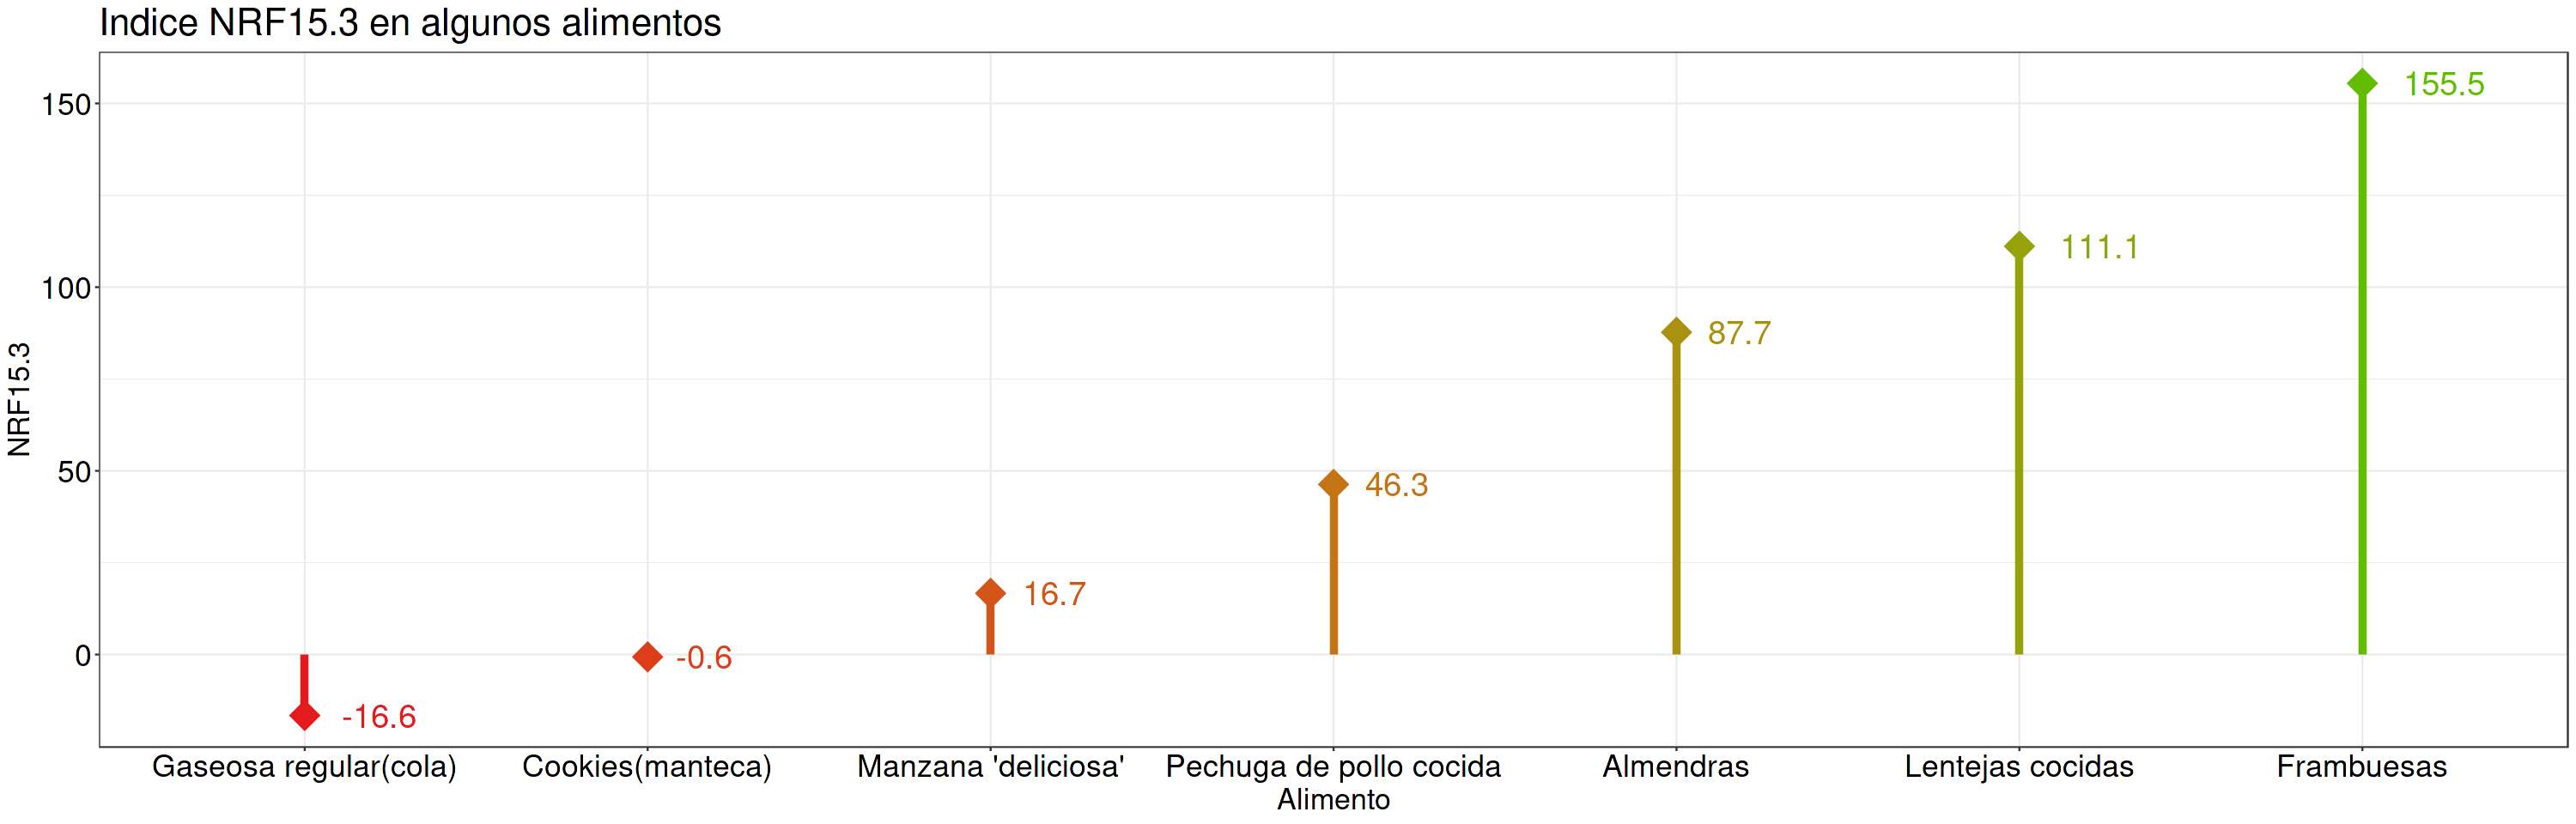

In [14]:
plot_size(25,8)
df_NRF=data %>% select(name,NRF15.3) %>% filter(name=="Beverages, regular, cola, carbonated"|name=="Cookies, unenriched, commercially prepared, butter"|
                                         name=="Apples, with skin, red delicious, raw"|name=="Chicken, stewed, cooked, meat and skin, breast, broilers or fryers"|
                                         name=="Nuts, almonds"|name=="Raspberries, raw"|name=="Lentils, without salt, stir-fried, cooked, sprouted") %>%
                                         arrange(-NRF15.3) %>%
                                         rename ("Alimento"=name)
df_NRF["Alimento"][df_NRF["Alimento"] == "Raspberries, raw"] <- "Frambuesas"
df_NRF["Alimento"][df_NRF["Alimento"] == "Lentils, without salt, stir-fried, cooked, sprouted"] <- "Lentejas cocidas"
df_NRF["Alimento"][df_NRF["Alimento"] == "Nuts, almonds"] <- "Almendras"
df_NRF["Alimento"][df_NRF["Alimento"] == "Chicken, stewed, cooked, meat and skin, breast, broilers or fryers"] <- "Pechuga de pollo cocida"
df_NRF["Alimento"][df_NRF["Alimento"] == "Apples, with skin, red delicious, raw"] <- "Manzana 'deliciosa'"
df_NRF["Alimento"][df_NRF["Alimento"] == "Cookies, unenriched, commercially prepared, butter"] <- "Cookies(manteca)"
df_NRF["Alimento"][df_NRF["Alimento"] == "Beverages, regular, cola, carbonated"] <- "Gaseosa regular(cola)"

df_NRF %>%mutate(Alimento = fct_reorder(Alimento, NRF15.3)) %>%
ggplot(aes(x=Alimento, y=NRF15.3,color=NRF15.3)) + 
  geom_segment(size=2, aes(x=Alimento, xend=Alimento, y=NRF15.3, yend=0))+
  geom_point(aes(color = NRF15.3), size=9, shape=18, stroke=2)+
  geom_text(aes(label=round(NRF15.3,digits=1)),hjust=-0.5, vjust=0.5,size=8)+
  scale_colour_gradient(low = "#E41A1C",
  high = "#62BD00")+
  theme(legend.position="none")+
ggtitle("Indice NRF15.3 en algunos alimentos")


Veamos como se distribuye la variable creada:

In [15]:
profiling_num(data$NRF15.3) %>% select(variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99) 
#verificamos como se distribuye la variable

variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
var,82.37249,187.4337,2.275441,-42.8732,-10.36,20.9,49.645,87.61,283.491,667.1165


La variable NRF15.3 tiene valores extremos(outliers) tanto positivos como negativos, los vamos a detener con la función **Winsorize**.<br />
Con los parámetros ingresados, la función detiene los valores a la izquierda del percentil 5 y tambien detiene los valores a la derecha del percentil 95. Es decir, deja una ventana de 5%-95% sin cambiar y a los que no están en ese rango, les asigna el maximo valor correspondiente al borde inferior o superior.<br />
Vamos a conservar la variable NRF15.3 original para los detalles, pero para las visualizaciones vamos a usar una nueva con el metodo **Winsorize**, y de esta manera logramos evitar el borrado de información que puede llegar a ser muy valiosa.<br />
Verifiquemos también la distribución ahora que le aplicamos Winsorize:

In [16]:
data$NRF15.3Wins = data$NRF15.3 %>% Winsorize(na.rm=TRUE)
profiling_num(data$NRF15.3Wins) %>% select(variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99)
#hist(data$NRF15.3,breaks=699)

variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
var,68.55111,71.66337,1.045401,-10.36,-10.36,20.9,49.645,87.61,283.4365,283.491


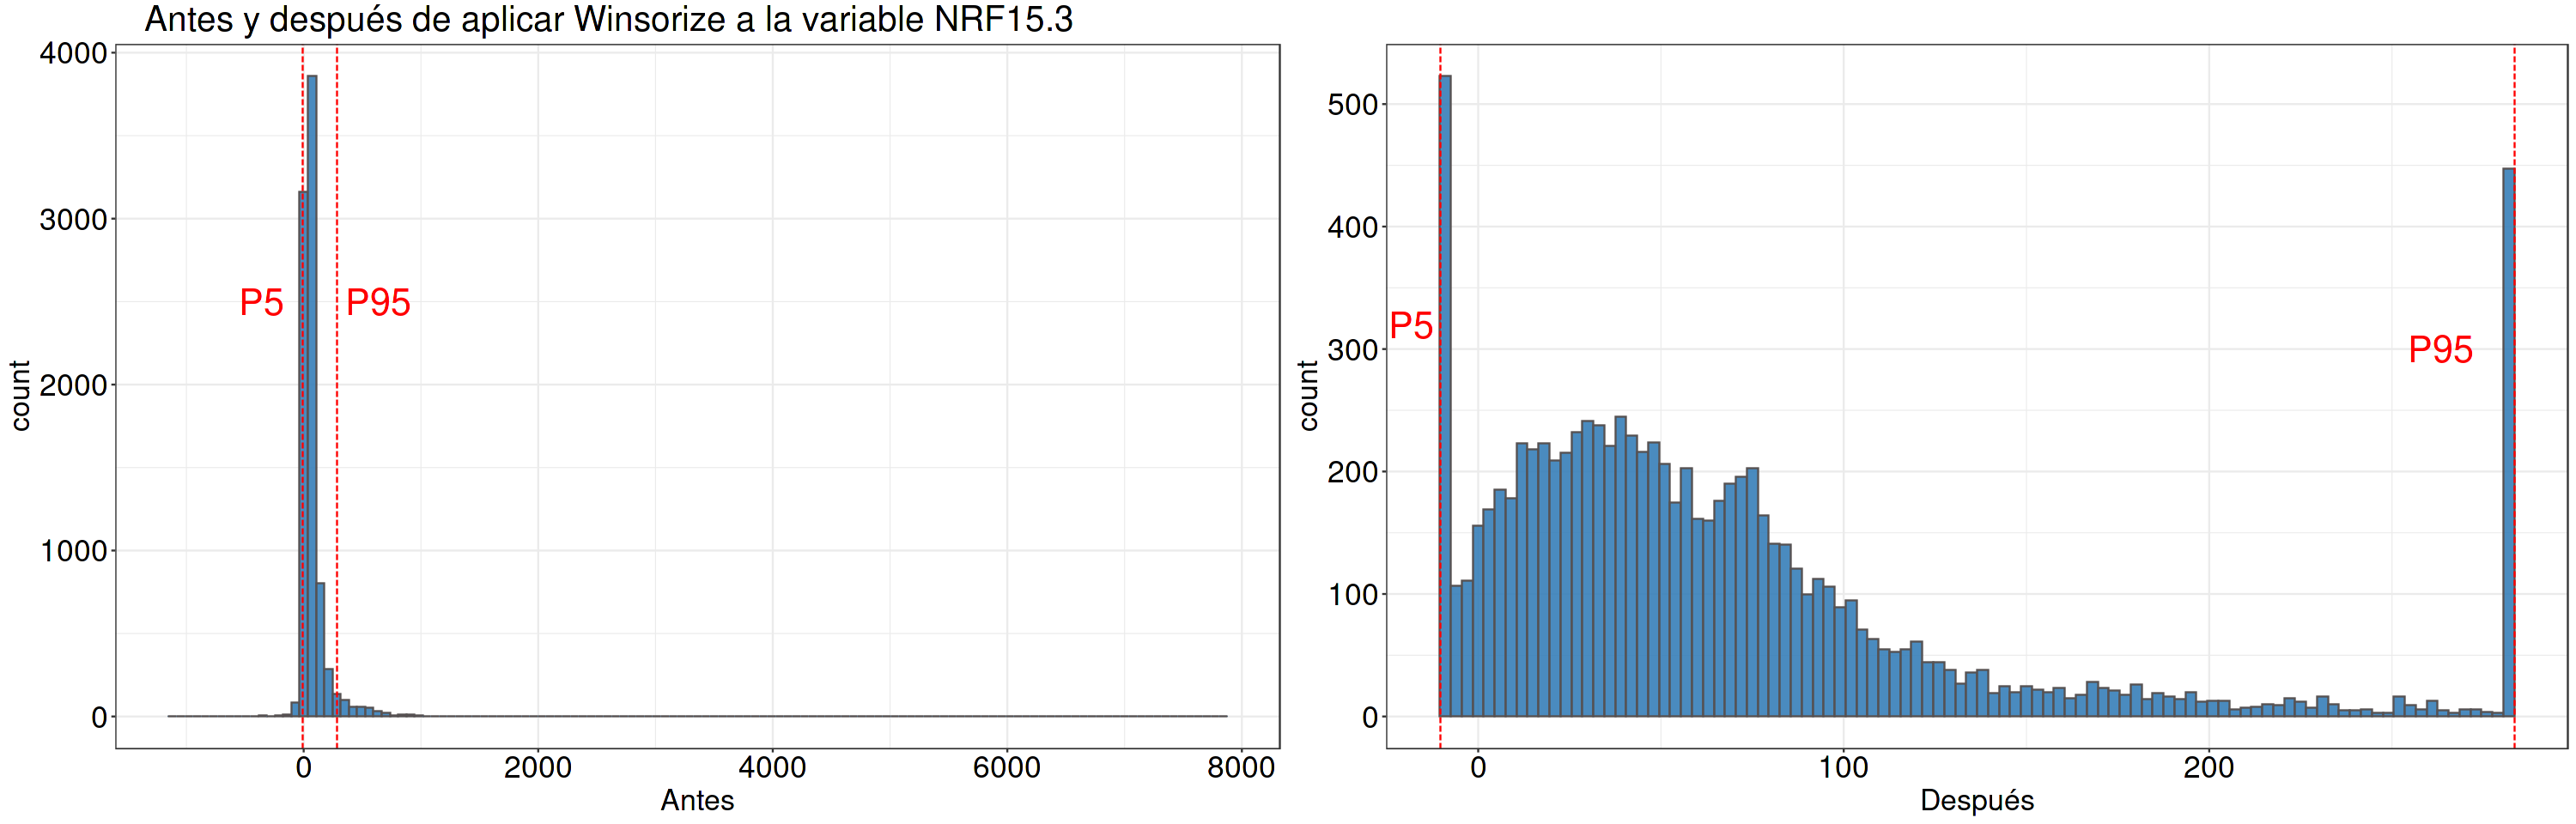

In [17]:
plot_size(25,8)

p5NRF=quantile(data$NRF15.3,probs = .05)
p95NRF=quantile(data$NRF15.3,probs = .95)
p5NRFwins=quantile(data$NRF15.3Wins,probs = .05)
p95NRFwins=quantile(data$NRF15.3Wins,probs = .95)


plot_NRF = ggplot(data, aes(x=NRF15.3)) +
geom_histogram(binwidth=70,fill="#377eb8", color="#565152", alpha=0.9) +
xlab("Antes") + 
geom_vline(xintercept=p95NRF, linetype = "longdash",color='red')+ #linea de referencia (indica el percentil)
 geom_text(x=p95NRF+350,y=2500,color='red',  #texto 'percentil 95'
    label=paste("P95"), 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T,
           size = 9
  ) + 
geom_vline(xintercept=p5NRF, linetype = "longdash",color='red')+ #linea de referencia (indica el percentil)
 geom_text(x=p5NRF-350,y=2500,color='red',  #texto 'percentil 95'
    label=paste("P5"), 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T,
           size = 9
  )


plot_NRFwins = ggplot(data, aes(x=NRF15.3Wins)) +
geom_histogram(binwidth=3,fill="#377eb8", color="#565152", alpha=0.9) +
xlab("Después")  + 
geom_vline(xintercept=p95NRFwins, linetype = "longdash",color='red')+ #linea de referencia (indica el percentil)
 geom_text(x=p95NRFwins-20,y=300,color='red',  #texto 'percentil 95'
    label=paste("P95"), 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T,
           size = 9
  ) + 
geom_vline(xintercept=p5NRFwins, linetype = "longdash",color='red')+ #linea de referencia (indica el percentil)
 geom_text(x=p5NRFwins-8,y=320,color='red',  #texto 'percentil 95'
    label=paste("P5"), 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T,
           size = 9
  )



mix_wins=ggarrange(plot_NRF, plot_NRFwins, ncol=2, common.legend = TRUE, legend="bottom")

annotate_figure(mix_wins,top=text_grob("Antes y después de aplicar Winsorize a la variable NRF15.3", color = "black", size = 24, hjust=1.23))

**Grupo y subgrupo** <br />
A partir de expresiones regulares y filtros podemos clasificar los alimentos según su origen. La clasificación en este análisis, está basada en la que utiliza la USDA (US Department of Agriculture), que enfatiza la importancia de consumir alimentos de todos los grupos con el objetivo de tener una dieta equilibrada.<br />
Los grupos son: frutas, vegetales, granos, lácteos y alimentos protéicos. A su vez, cada uno se puede dividir en subgrupos para enfatizar aquellos alimentos que son considerados como fuentes de ciertas vitaminas y minerales.<br />



https://www.usda.gov/media/blog/2017/09/26/back-basics-all-about-myplate-food-groups <br />
https://www.myplate.gov/eat-healthy/food-group-gallery


In [18]:
#------------------------------------------------
#CREACION DE SUBGRUPO
#------------------------------------------------
data = data %>% 
  mutate(Subgrupo = case_when(
      #PROTEINAS
    grepl('beef|goat|ham|lamb|pork|ham|pork|turkey|game|bear|bison|deer|elk|moose|opossum|rabbit|veal|raccoon|squirrel|venison|brain|chitterlings|giblets|gizzard|heart|kidney|liver|
stomach|sweetbreads|tongue|tripe', name,ignore.case=TRUE)  ~ "Carnes",
    grepl('chicken|Cornish hen|dove|duck|goose|ostrich|pheasant|quail|turkey|emu', name,ignore.case=TRUE)  ~ "Aves de corral",
    grepl('^Egg,|^Egg |chicken eggs|duck eggs|eggs', name,ignore.case=FALSE)  ~ "Huevos",
    grepl('black sea bass|catfish|cod|flounder|freshwater trout|haddock|hake|halibut|herring|light tuna|mackerel|mullet|perch|pollock|salmon|sea bass|snapper|
sole|sushi|tilapia|whiting|Shellfishclams|crab|crayfish|lobster|mussels|octopus|oysters|scallops|shrimp|squid|Canned Fish|anchovies|freshwater trout|
herring|light tuna|salmon|sardines|oyster|fish|seafood|tuna|sardine|whale|squid|mussels|clams|mollusks,', name,ignore.case=TRUE)  ~ "Pescados/mariscos",
    grepl('tempeh|texturized vegetable protein (TVP)|tofu|TVP|texturized vegetable protein', name,ignore.case=TRUE)~ "Productos de Soja",
    grepl('almonds|almond butter|Brazil nuts|cashew butter|cashews|chestnuts|chia seeds|flax seeds|hazelnuts (filberts)|macadamia nuts|mixed nuts|peanut butter|peanuts|pecans|pine nuts|
pistachios|pumpkin seeds|sesame butter or paste (tahini)|sesame seeds|sunflower butter|sunflower seeds|walnuts|nuts', name,ignore.case=TRUE)  ~ "Frutos secos",
      #LACTEOS
    grepl('^Cheese,|^Yogurt,|^Milk,|^Butter,|buttermilk|Buttermilk|Ice-cream|ice-cream|ice cream|Ice cream|smoothie|Smoothie|pudding|Pudding|kefir|Kefir', name,ignore.case=FALSE)~ "Lácteos",
      #FRUTAS
    (grepl('^Watermelon', name,ignore.case=FALSE)  | grepl('^Bananas', name,ignore.case=FALSE) |
              grepl('^Apples', name,ignore.case=FALSE)  | grepl('^Oranges', name,ignore.case=FALSE)  |
              grepl('^Grapes', name,ignore.case=FALSE)  | grepl('^Melons', name,ignore.case=FALSE) |
              grepl('^Peaches', name,ignore.case=FALSE)| grepl('^Papayas', name,ignore.case=FALSE)|
              grepl('^Pears', name,ignore.case=FALSE)  | grepl('^Kiwi', name,ignore.case=FALSE)| grepl('^Lime', name,ignore.case=FALSE)|
              grepl('^Tangerines', name,ignore.case=FALSE)| grepl('^Papayas', name,ignore.case=FALSE)|
              grepl('^Blueberries', name,ignore.case=FALSE) |grepl('^Cherries', name,ignore.case=FALSE)|
              grepl('^Pineapple', name,ignore.case=FALSE)  |
              grepl('^Passion fruit', name,ignore.case=FALSE) |grepl('^Grapefruit', name,ignore.case=FALSE)|
              grepl('^Figs', name,ignore.case=FALSE) |  grepl('^Cranberries', name,ignore.case=FALSE) |
              grepl('^Lemon', name,ignore.case=FALSE) |    grepl('^Mango', name,ignore.case=FALSE) |
              grepl('^Pomegranate', name,ignore.case=FALSE) | grepl('^Pumpkin', name,ignore.case=TRUE)  |
              grepl('^Lychee', name,ignore.case=TRUE) | grepl('^Apricots', name,ignore.case=TRUE)  )
               & grepl('raw', name,ignore.case=FALSE)  ~ "Frutas",
      #VEGETALES
      grepl('amaranth leaves|arugula (rocket)|basil|beet greens|bitter melon leaves|bok choy|broccoli|broccoli rabe (rapini)|broccolini|chamnamul|chard|chrysanthemum leaves|
cilantro|collard greens|cress|dandelion greens|dark-green leafy lettuce|endive|escarole|kale|lambsquarters|mesclun|mixed greens|mustard greens|nettles|poke greens|
romaine lettuce|spinach|Swiss chard|taro leaves|turnip greens|watercress|lettuce', name,ignore.case=TRUE) ~ "Vegetales verdes",
         grepl('acorn squash|butternut squash|calabaza|carrots|hubbard squash|kabocha squash|pimento/pimiento|pumpkin|red and orange bell peppers|red chili peppers|red peppers, sweet|
sweet potatoes|tomatoes|100% vegetable juice|winter squash|squash|bell pepper|orange bell pepper|red bell pepper', name,ignore.case=TRUE)  ~ "Vegetales rojos y naranjas",
         grepl('breadfruit|burdock root|cassava|^corn|fufu|green bananas|hominy|jicama|lotus root|parsnips|plantains|potatoes|salsify|tapioca|taro root (dasheen or yautia)|water chestnuts|
yams|yucca|sweet potatoes|sweet potato', name,ignore.case=TRUE)  ~ "Vegetales almidonados",
         grepl('beans|peas|lentils|hummus|chickpeas|chickpea|soybeans', name,ignore.case=TRUE)  ~ "Frijoles",
      grepl('alfalfa sprouts|arrowroot|artichokes|asparagus|avocado|bamboo shoots|bean sprouts|beets|bitter melon (bitter gourd, balsam pear)|broccoflower|Brussels sprouts|cabbage|cactus pads (nopales)|
^cauliflower|cauliflower,|celeriac|celery|chayote (mirliton)|chives|cucumbers|daikon|drumstick pods (moringa)|eggplant|fennel bulb|fiddlehead ferns|garlic|ginger root|green peppers|green beans|hearts of palm|
Jerusalem artichokes (sunchokes)|jute|kohlrabi|leeks|luffa (Chinese okra)|mushrooms|okra|onions|pattypan squash|purslane|radicchio|radishes|red cabbage|rutabaga|seaweed|
scallions|snow peas|sorrel|spaghetti squash|tomatillos|turnips|wax beans|yellow squash|zucchini', name,ignore.case=TRUE)  ~ "Otros vegetales",
         #GRANOS
         grepl('amaranth|barley (not pearled)|brown rice|buckwheat|bulgur (cracked wheat)|dark rye|kamut|millet|muesli|oatmeal|oats|popcorn|
quinoa|rolled oats|sorghum|spelt|teff|triticale|whole grain barley|whole grain cornmeal|whole grain sorghum|whole rye|whole wheat bread|whole wheat cereal flakes|
whole wheat chapati|whole wheat crackers|whole wheat pasta|whole wheat sandwich buns and rolls|whole wheat tortillas|wild rice', name,ignore.case=TRUE)  ~ "Granos enteros",
         grepl('bagels|biscuits|breadcrumbs|cakes|challah bread|cookies|corn flakes|corn tortillas|cornbread|couscous|crackers, saltine|cream of rice|
cream of wheat|English muffins|flour tortilla|French bread|grits|masa|matzo|naan|noodles|pancakes|pasta (spaghetti, macaroni)|pie/pastry crusts|
pita bread|pizza crust|polenta|pretzels|ramen noodles|refined-grain cereals|refined-grain crackers|rice cakes|rice paper (spring roll wrappers)|rice vermicelli|
waffles|white bread|white rice|white sandwich buns and rolls|Bread,|crackers|crackers,', name,ignore.case=TRUE) ~ "Granos refinados",
      #GRASAS Y ACEITES
      grepl('^Fat|^Oil', name,ignore.case=TRUE)  ~ "Aceites/grasas",
      #CARAMELOS, GASEOSAS Y DULCES
      grepl('dessert|candies|candy|beverage|gum', name,ignore.case=TRUE) ~ "Caramelos, gaseosas, etc.",
      
    TRUE ~ "Otro"
  )
)
#unique(data$Subgrupo)


#------------------------------------------------
#CREACION DE GRUPO
#------------------------------------------------
data= data %>% 
  mutate(Grupo = case_when(
     
    Subgrupo=='Carnes'|Subgrupo=='Huevos' |Subgrupo=='Aves de corral'|Subgrupo=='Pescados/mariscos'|Subgrupo=='Productos de Soja'|Subgrupo=='Frutos secos'  ~ "Proteicos", 
      Subgrupo=='Lácteos'  ~ "Lácteos", 
      Subgrupo=='Frutas' ~ "Frutas", 
      Subgrupo=='Vegetales verdes'|Subgrupo=='Vegetales rojos y naranjas' |Subgrupo=='Vegetales almidonados'|Subgrupo=='Frijoles'|
      Subgrupo=='Otros vegetales'  ~ "Vegetales", 
      Subgrupo=='Aceites/grasas'   ~ "Aceites/grasas",
      Subgrupo=='Caramelos, gaseosas, etc.'  ~ "Otro",
      Subgrupo=='Granos enteros'|Subgrupo=='Granos refinados'  ~ "Granos",
    TRUE ~ "Otro")
        )
#unique(data$Grupo)


# Si quisieramos eliminar el grupo 'Otros' (representan todos los alimentos que no ingresaron a ninguno de los grupos definidos en la celda anterior)
#otros=data%>%filter(Grupo=='Otro')
#data = data[!data$name %in% otros$name, , drop = FALSE]

**Media de nutrientes por grupo**

Grupo,Calorias,Proteinas,Carbohidratos,Grasas,NRF15.3,AminEsenc,AminNoEsenc,Azúcares,Fibra,GrasasInsaturadas,GrasasSaturadas,GrasasTrans,Conteo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Frutas,49.35938,0.766250,12.399688,0.234375,134.23313,0.1724375,0.2321094,7.297813,2.0187500,0.077000,0.0331875,0.000000,64
Granos,381.35427,7.294799,61.265797,12.516618,34.43510,1.3518680,1.8404622,13.871159,3.9587762,7.480380,3.8582689,5.885668,621
Lácteos,212.27160,9.040031,22.909043,9.588056,38.12639,2.8919568,3.3750216,10.002130,0.6055556,3.211201,5.4719290,28.061728,324
Proteicos,219.17858,19.311519,6.675859,12.664968,68.46015,8.8272646,7.9156064,1.655175,0.6678161,6.883386,4.1892733,83.877488,3567
Vegetales,113.35419,4.643372,19.353033,2.543510,179.29394,1.6508462,1.6923415,2.543256,3.7094380,1.586563,0.5699894,1.386002,943


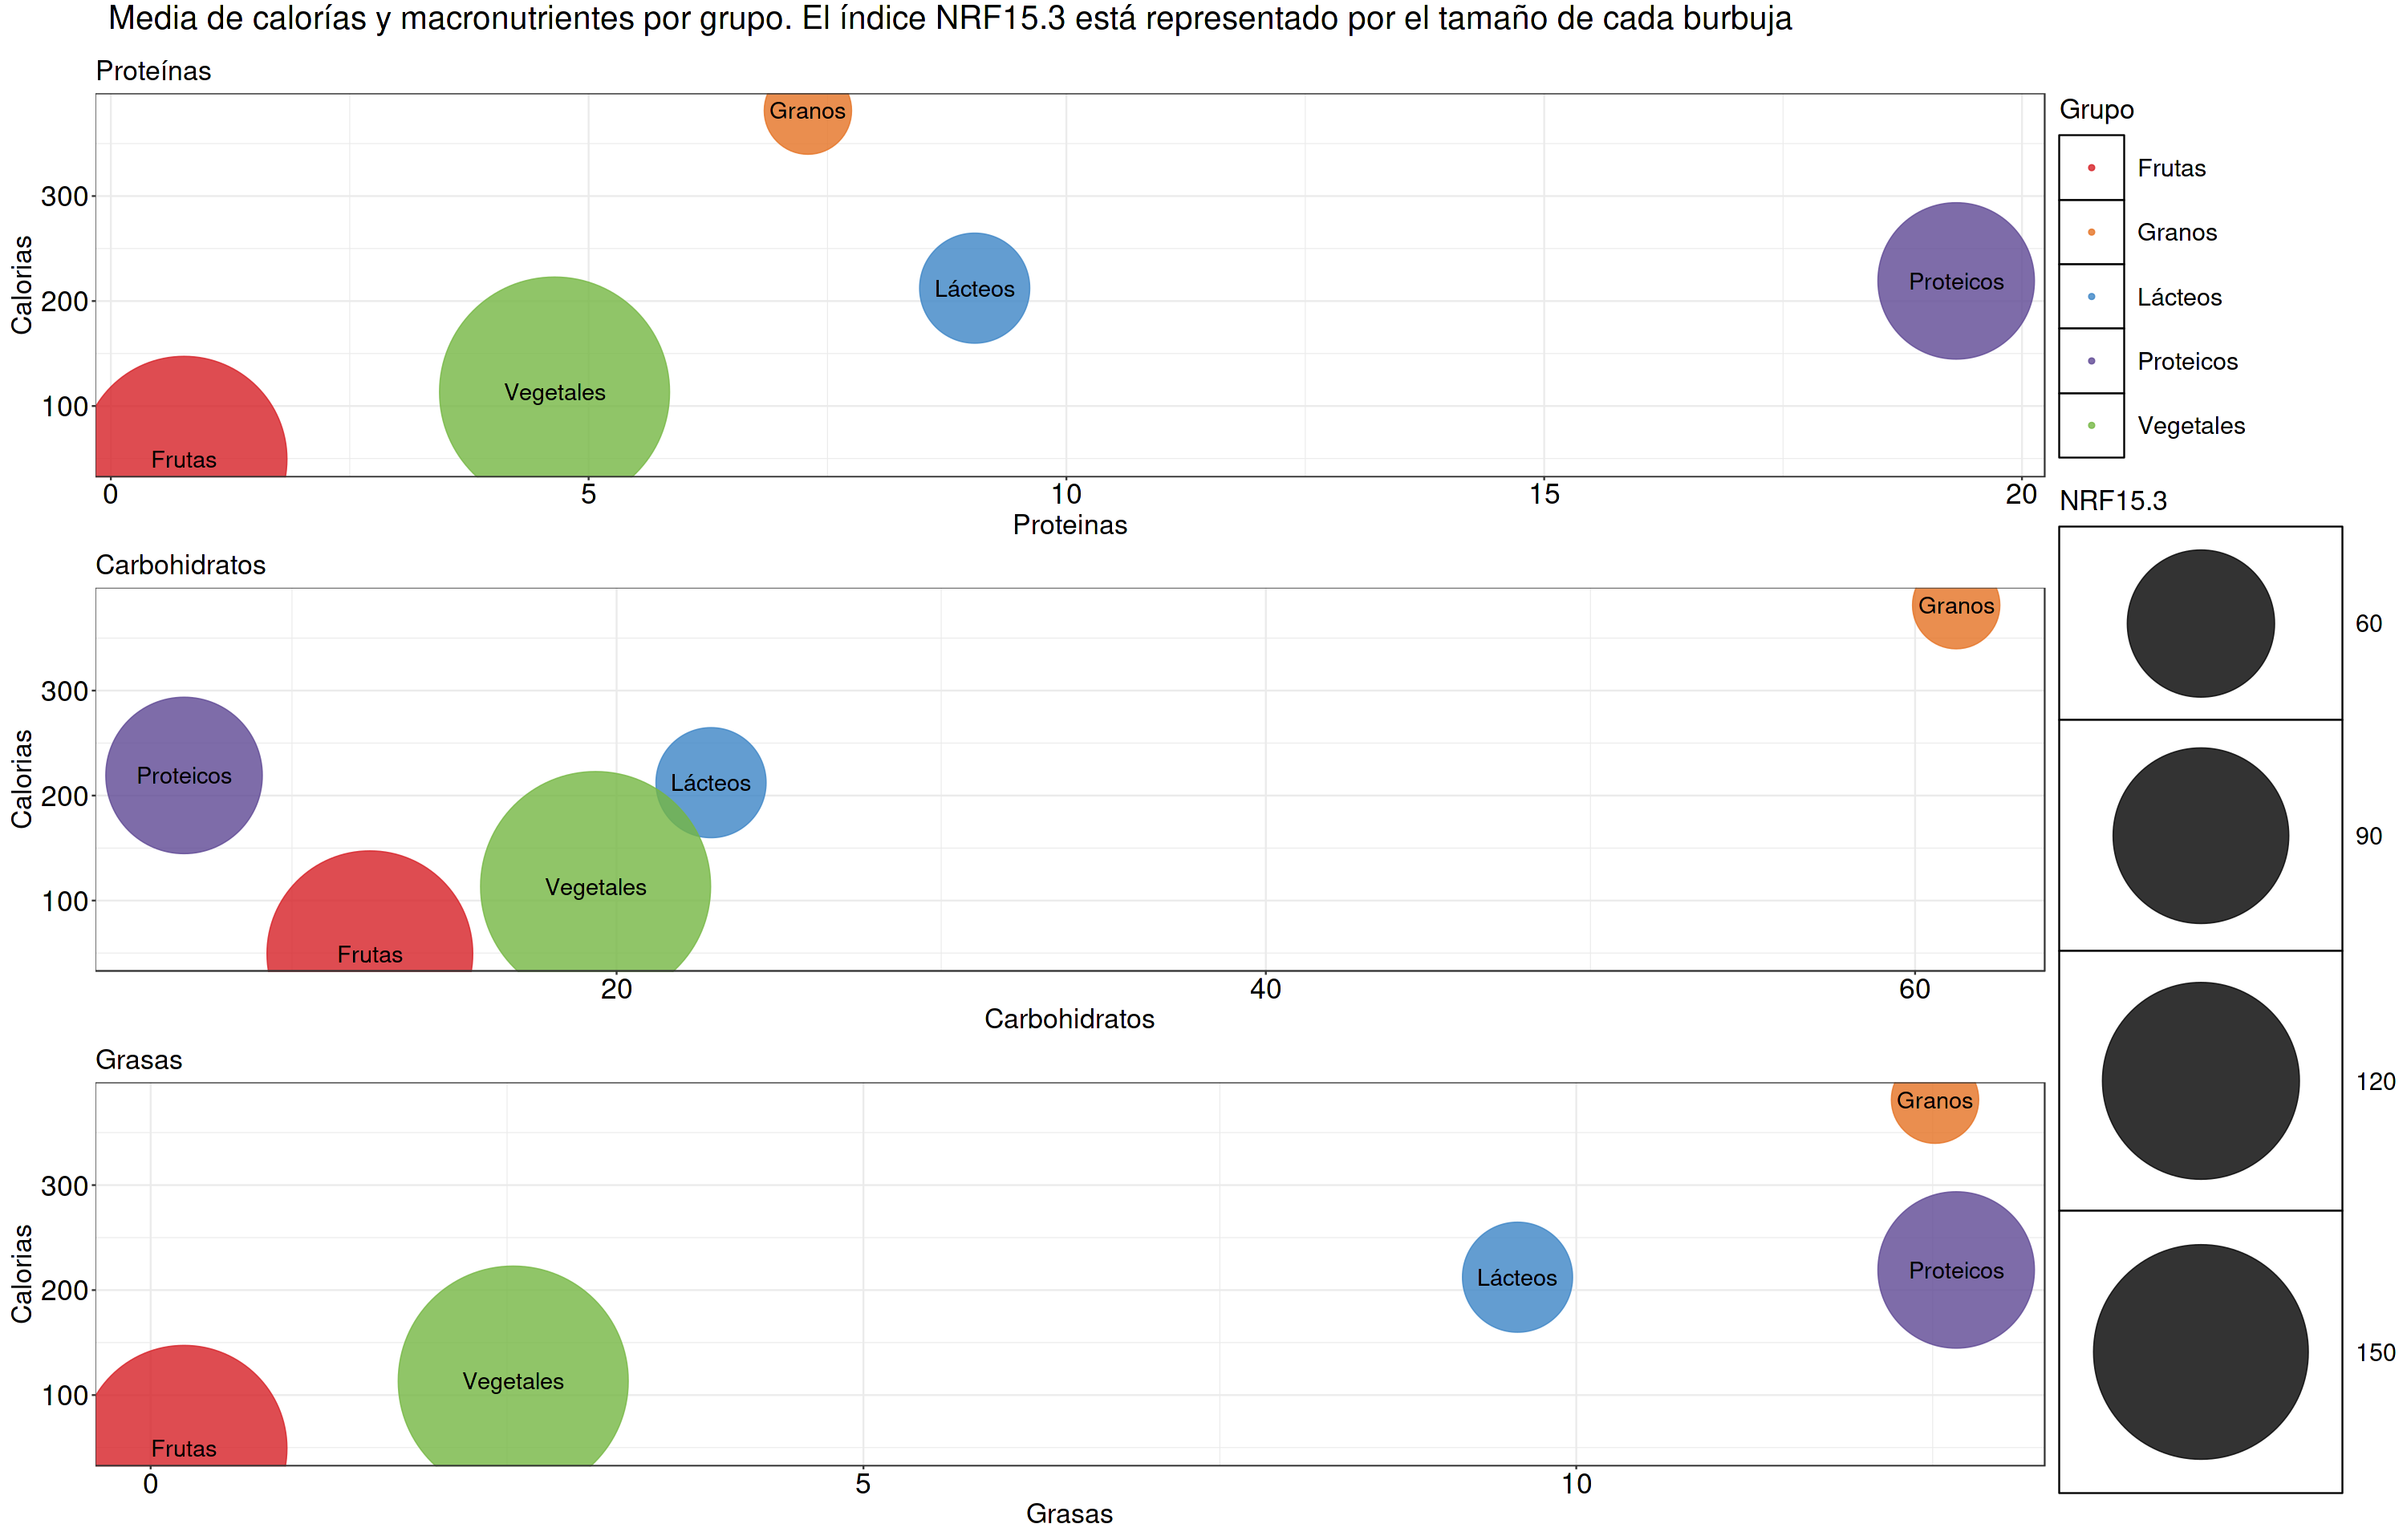

In [19]:
df_grupo=data %>% 
  group_by(Grupo) %>% 
  summarise(Calorias=mean(calories_100g),Proteinas = mean(protein_g), Carbohidratos = mean(carbohydrate_g), Grasas = mean(fat_g), 
            NRF15.3=mean(NRF15.3),AminEsenc=mean(AminEsenc),AminNoEsenc=mean(AminNoEsenc),Azúcares=mean(sugars_g),Fibra=mean(fiber_g), 
            GrasasInsaturadas=mean(grasasInsaturadas_g),GrasasSaturadas=mean(saturated_fatty_acids_g),GrasasTrans=mean(fatty_acids_total_trans_mg),
            Conteo= n())

df_grupo =  df_grupo%>% filter(df_grupo['Grupo'] !="Otro")
df_grupo =  df_grupo%>% filter(df_grupo['Grupo'] !="Aceites/grasas")
df_grupo


plot_size(25,16)

# Most basic bubble plot
plt_grp_prot=df_grupo   %>%
  ggplot(aes(x=Proteinas, y=Calorias,size=NRF15.3,color = Grupo)) +
  geom_point(alpha=0.8) +
  geom_text(aes(label=Grupo),size=6,color='black')+ 
    scale_size(range = c(30, 80)) + 
ggtitle("Proteínas")+ 
    theme(plot.title = element_text(size = 20))+
 scale_colour_manual(values=c("#d62026", "#e57224", "#3c84c5","#5e4894", "#74B743"))


#plt_grp_prot

plt_grp_carb=df_grupo   %>%
  ggplot(aes(x=Carbohidratos, y=Calorias,size=NRF15.3,color = Grupo)) +
  geom_point(alpha=0.8) +
  geom_text(aes(label=Grupo),size=6,color='black')+ 
    scale_size(range = c(30, 80))+ 
ggtitle("Carbohidratos")+ 
    theme(plot.title = element_text(size = 20))+
 scale_colour_manual(values=c("#d62026", "#e57224", "#3c84c5","#5e4894", "#74B743"))

#plt_grp_carb

plt_grp_fat=df_grupo   %>%
  ggplot(aes(x=Grasas, y=Calorias,size=NRF15.3,color = Grupo)) +
  geom_point(alpha=0.8) +
  geom_text(aes(label=Grupo),size=6,color='black')+ 
    scale_size(range = c(30, 80))+ 
ggtitle("Grasas")+ 
    theme(plot.title = element_text(size = 20))+
 scale_colour_manual(values=c("#d62026", "#e57224", "#3c84c5","#5e4894", "#74B743"))
#5 vege
#4 prot
#3 lacteo
#2 granos
#plt_grp_fat



mix=ggarrange(plt_grp_prot, plt_grp_carb,plt_grp_fat, nrow=3, common.legend = TRUE, legend="right")+
  theme(plot.margin = margin(0.5,0.1,0.1,0.1, "cm")) 
annotate_figure(mix,top=text_grob("Media de calorías y macronutrientes por grupo. El índice NRF15.3 está representado por el tamaño de cada burbuja", color = "black", size = 24, hjust=0.65))

**Visualización interactiva** <br/>
Algunos gráficos son interactivos (si lo es, está indicado al lado del título). <br/>
Podés desplazar, girar, acercar, alejar, filtrar y hasta verificar cada uno de los alimentos.

In [20]:
viz=data%>%filter(Grupo!='Aceites/grasas')
viz=viz%>%filter(Grupo!='Otro')

pal <- c("#d62026", "#e57224", "#3c84c5","#5e4894", "#74B743","grey")
pal <- setNames(pal, c("Frutas", "Granos", "Lácteos","Proteicos","Vegetales","Otro"))



plt_3d <- plot_ly(viz, x = ~protein_g, y = ~carbohydrate_g, z = ~fat_g, color=~Grupo,colors = pal,
                  text = ~paste("</br> Alimento:",viz$name, #con esto tenemos estos datos al hacer 'hover' con el cursor
                                 "</br> Calorías:",viz$calories_100g,"kcal",
                                 "</br> Proteínas", viz$protein_g,
                                 "</br> Carbohidratos:",viz$carbohydrate_g,
                                 "</br> Grasas Totales:", viz$fat_g,
                                 "</br> NRF 15.3:", viz$NRF15.3 )
                                
                  
                )
plt_3d <- plt_3d %>% add_markers()
plt_3d <- plt_3d %>% layout(title = list(text = 'Macronutrientes por grupo (interactivo)',x=0.12, y = 0.99),
                        font=t,scene = list(xaxis = list(title = 'Proteinas'),
                                     yaxis = list(title = 'Carbohidratos'),
                                     zaxis = list(title = 'Grasas')),
                           legend=list(title=list(text='<b> Seleccione grupo(s): </b>')))
#plt_3d

#----------------------------------------------------------------------
# EXPORTAR A HTML
library(htmlwidgets)
saveWidget(plt_3d, "plt_3d.html")
library('IRdisplay')
display_html('<iframe src="plt_3d.html" width=100% height=450></iframe>')

In [21]:
pal <- c("#d62026", "#e57224", "#3c84c5","#5e4894", "#74B743","grey")
pal <- setNames(pal, c("Frutas", "Granos", "Lácteos","Proteicos","Vegetales","Otro"))

plt_grupo = plot_ly(
                   viz, x = ~NRF15.3Wins, y = ~calories_100g, color= ~Grupo,shapes=~Subgrupo,colors = pal,
                   opacity=0.8,type = 'scatter',mode = 'markers',
                   text = ~paste("</br> Alimento:",viz$name, #con esto tenemos estos datos al hacer 'hover' con el cursor
                                 "</br> Calorías:",viz$calories_100g,"kcal",
                                 "</br> Proteínas", viz$protein_g,
                                 "</br> Carbohidratos:",viz$carbohydrate_g,
                                 "</br> Grasas Totales:", viz$fat_g,
                                 "</br> Aminoácidos:", viz$AminTotal_g,
                                 "</br> NRF 15.3:", viz$NRF15.3
                                )
                )
plt_grupo = plt_grupo %>% layout(title = list(text = 'NRF15.3 y calorías por grupo (interactivo)',x=0.12, y = 0.99),
                        font=t, xaxis = list(title = 'NRF13.3 - Winsorized'),yaxis = list(title = 'Calorías (kcal)'),
                                legend=list(title=list(text='<b> Seleccione grupo(s): </b>')))
#plt_grupo

#----------------------------------------------------------------------
# EXPORTAR A HTML
#library(htmlwidgets)
saveWidget(plt_grupo, "plt_grupo.html")
#library('IRdisplay')
display_html('<iframe src="plt_grupo.html" width=100% height=450></iframe>')

In [22]:
#Tabla sumarizada por subgrupo

df_subgrupo=data %>% 
  group_by(Subgrupo) %>% 
summarise(Calorias=mean(calories_100g),Proteinas = mean(protein_g), Carbohidratos = mean(carbohydrate_g), Grasas = mean(fat_g), 
            NRF15.3=mean(NRF15.3),AminEsenc=mean(AminEsenc),AminNoEsenc=mean(AminNoEsenc),Azúcares=mean(sugars_g),Fibra=mean(fiber_g), 
            GrasasInsaturadas=mean(grasasInsaturadas_g),GrasasSaturadas=mean(saturated_fatty_acids_g),GrasasTrans=mean(fatty_acids_total_trans_mg),
            Conteo= n())
df_subgrupo = df_subgrupo %>% 
  mutate(Grupo = case_when(
    Subgrupo=='Carnes'|Subgrupo=='Huevos' |Subgrupo=='Aves de corral'|Subgrupo=='Pescados/mariscos'|Subgrupo=='Productos de Soja'|Subgrupo=='Frutos secos'  ~ "Proteicos", 
      Subgrupo=='Lácteos'  ~ "Lácteos", 
      Subgrupo=='Frutas' ~ "Frutas", 
      Subgrupo=='Vegetales verdes'|Subgrupo=='Vegetales rojos y naranjas' |Subgrupo=='Vegetales almidonados'|Subgrupo=='Frijoles'|
      Subgrupo=='Otros vegetales'  ~ "Vegetales", 
      Subgrupo=='Granos enteros'|Subgrupo=='Granos refinados'   ~ "Granos",
      Subgrupo=='Aceites/grasas'   ~ "Aceites/grasas",
      Subgrupo=='Caramelos, gaseosas, etc.'  ~ "Caramelos, gaseosas, etc.",
    TRUE ~ "Otro"))

  
df_subgrupo =  df_subgrupo%>% filter(df_subgrupo['Subgrupo'] !="Otro")

**Media de nutrientes por subgrupo (proteicos)**

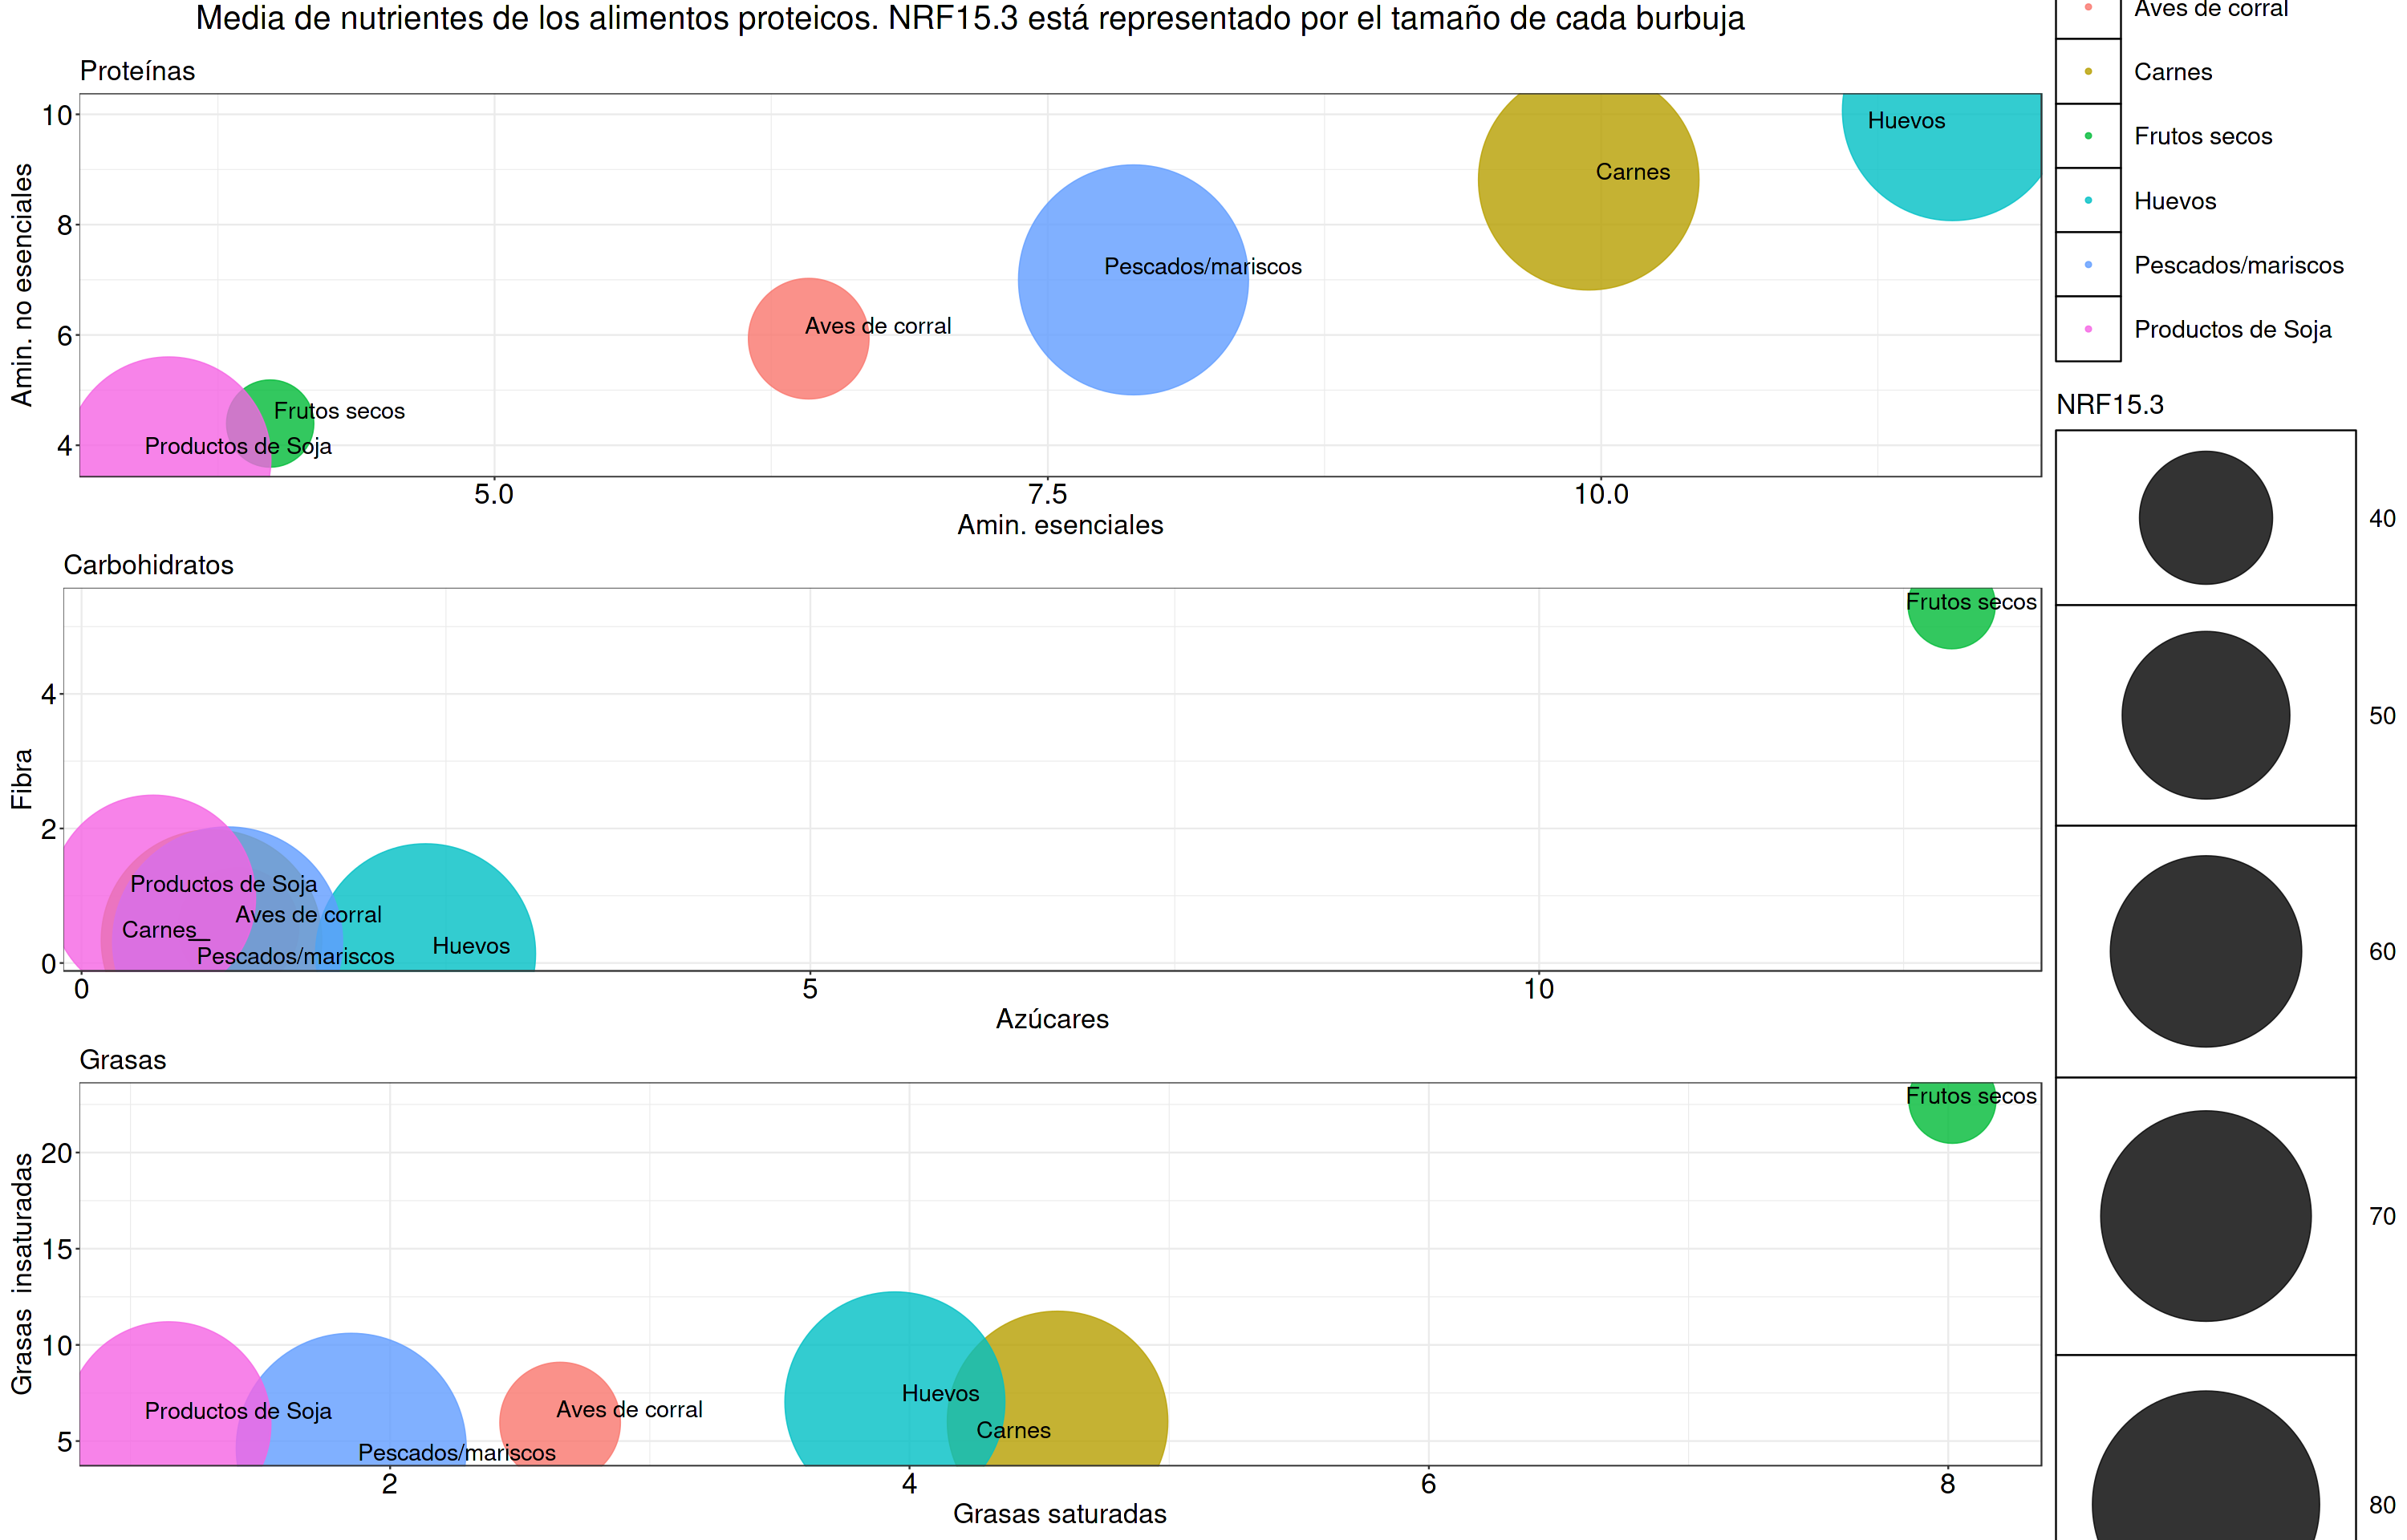

In [23]:
plot_size(25,16)
df_subgrupo_prot = df_subgrupo %>% filter(Grupo=="Proteicos")

# Most basic bubble plot
a=df_subgrupo_prot   %>%
  ggplot(aes(x=AminEsenc, y=AminNoEsenc,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Amin. no esenciales") +
    xlab("Amin. esenciales")+ 
ggtitle("Proteínas")+ 
 theme(plot.title = element_text(size = 20))  


# Most basic bubble plot
b=df_subgrupo_prot   %>%
  ggplot(aes(x=Azúcares, y=Fibra,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Fibra") +
    xlab("Azúcares")+ 
ggtitle("Carbohidratos")+ 
 theme(plot.title = element_text(size = 20))  


# Most basic bubble plot
c=df_subgrupo_prot   %>%
  ggplot(aes(x=GrasasSaturadas, y=GrasasInsaturadas,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Grasas  insaturadas") +
    xlab("Grasas saturadas")+ 
ggtitle("Grasas")+ 
 theme(plot.title = element_text(size = 20)) 


mix_prot=ggarrange(a,b,c, nrow=3, common.legend = TRUE, legend="right")+
  theme(plot.margin = margin(0.5,0.1,0.1,0.1, "cm")) 
annotate_figure(mix_prot,top=text_grob("Media de nutrientes de los alimentos proteicos. NRF15.3 está representado por el tamaño de cada burbuja", color = "black", size = 24, hjust=0.65))

**Media de nutrientes por subgrupo (vegetales)**

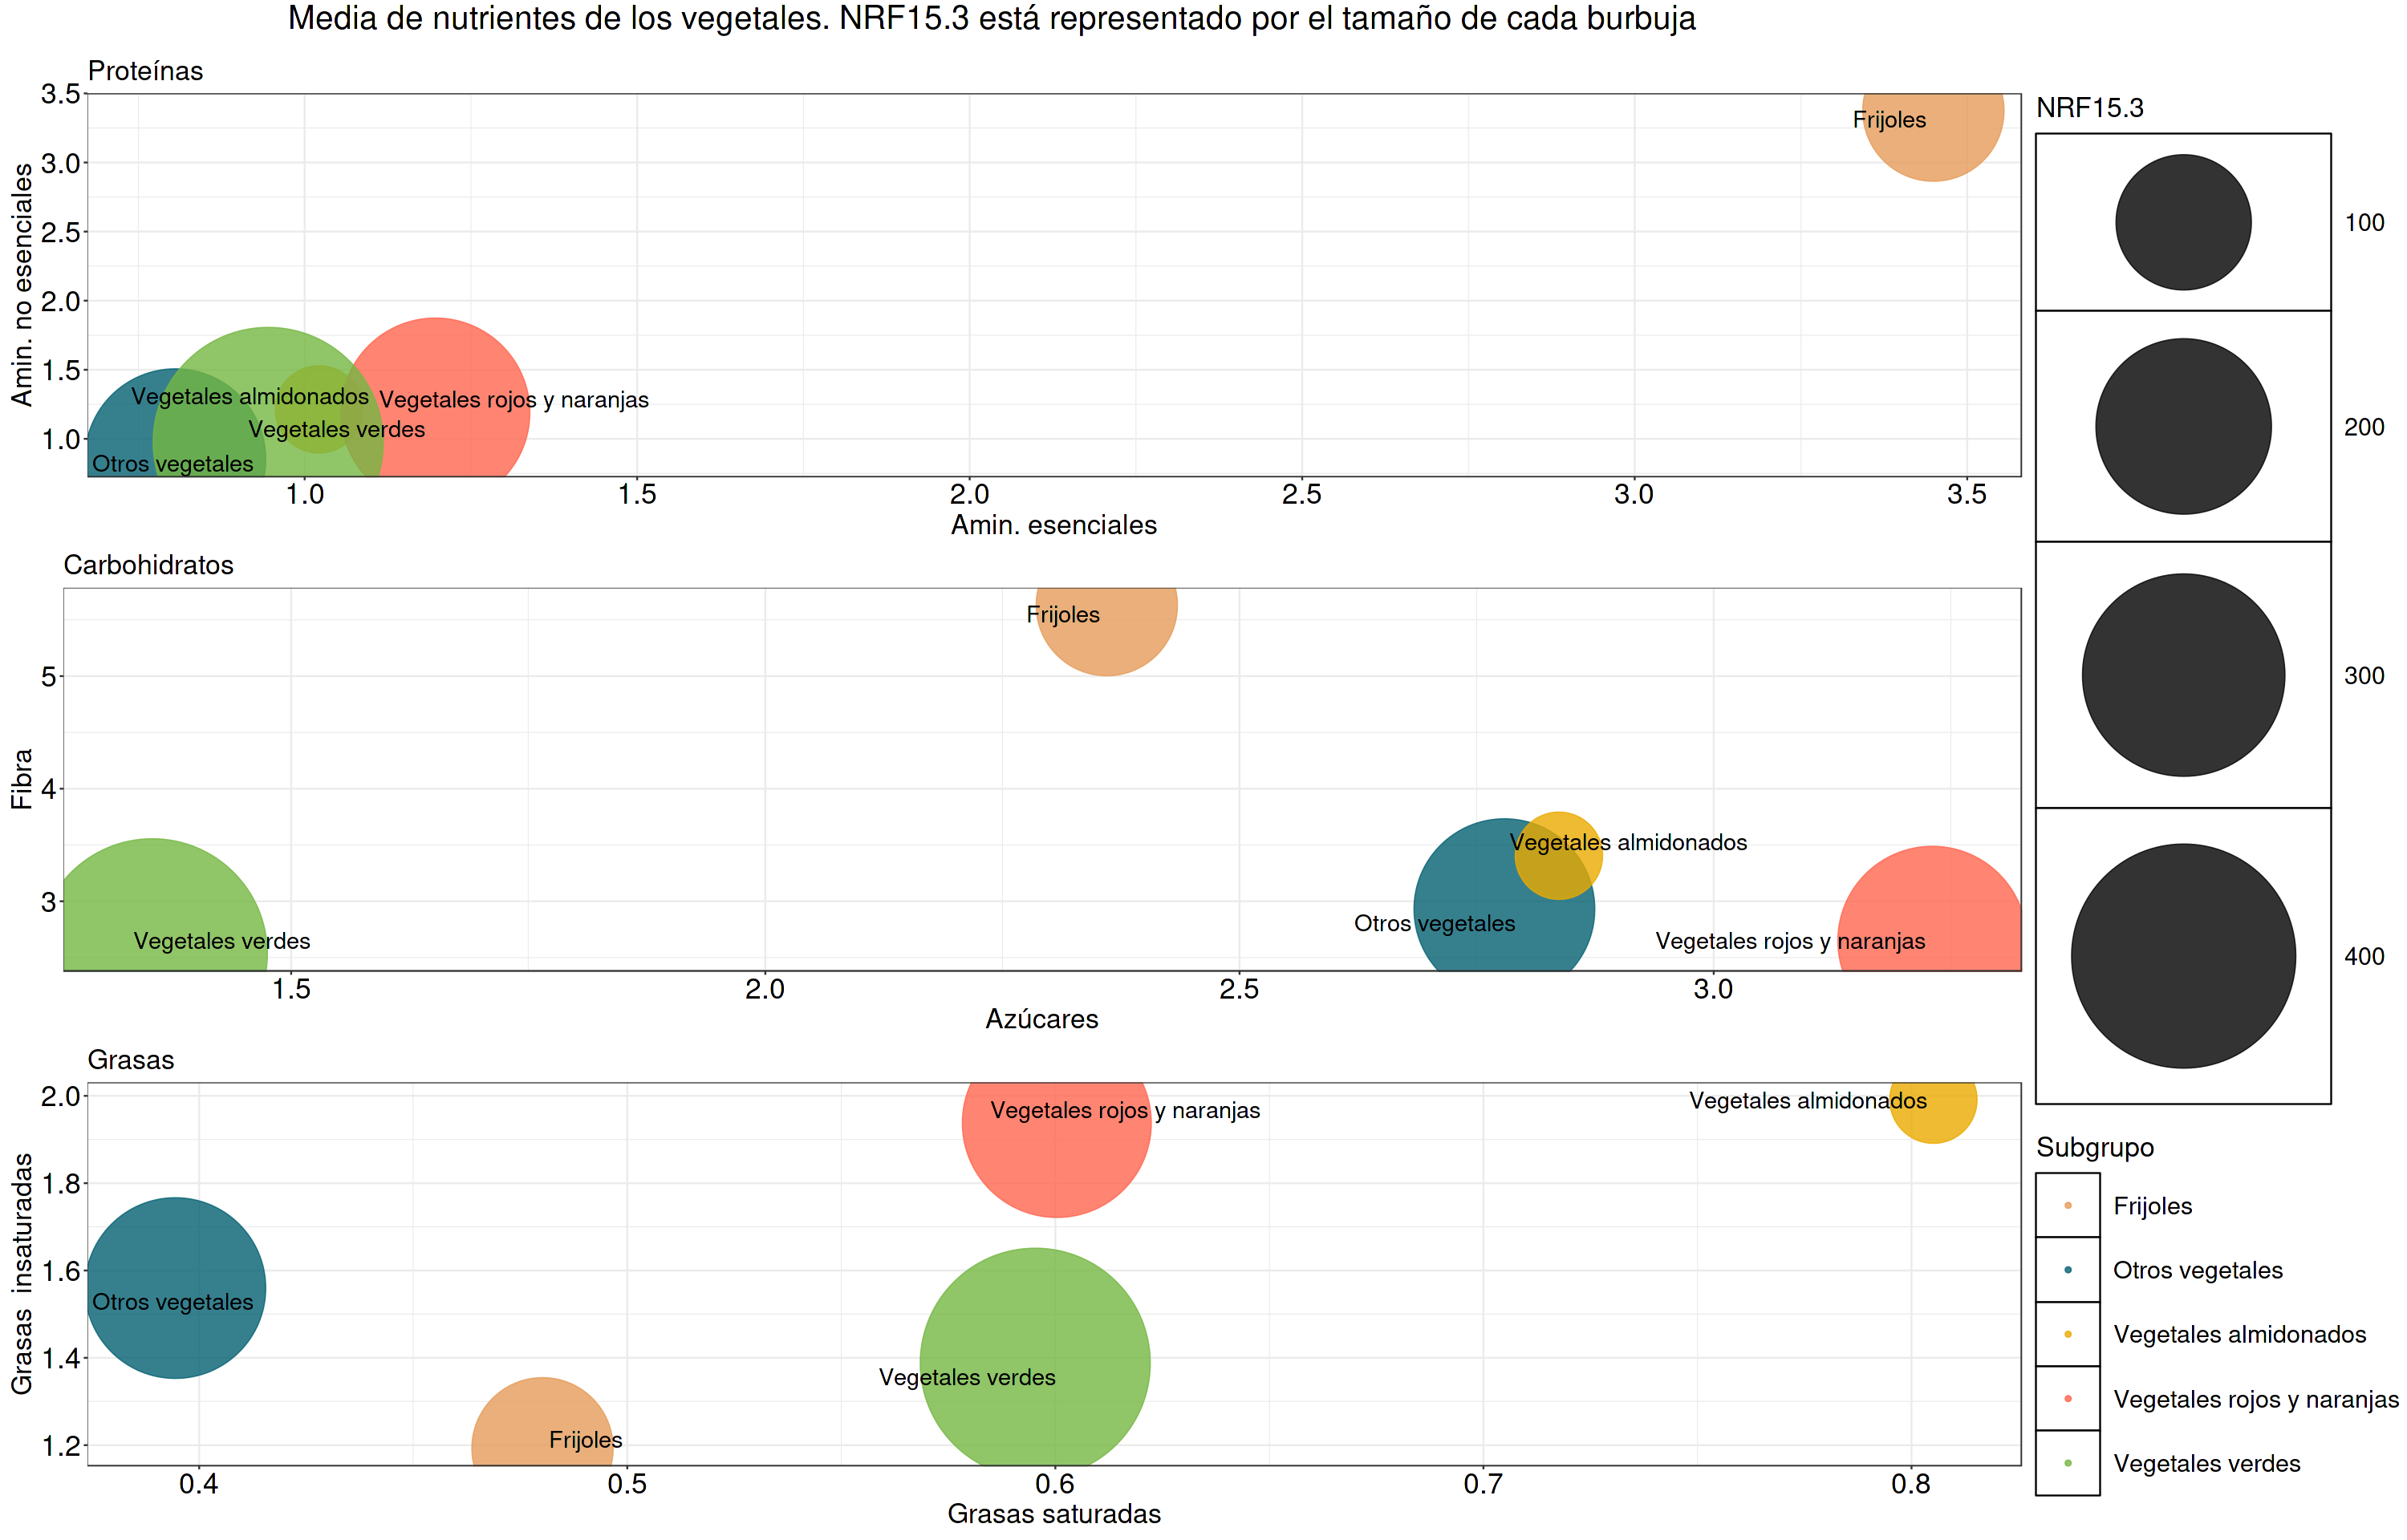

In [24]:
plot_size(25,16)
df_subgrupo_veg = df_subgrupo %>% filter(Grupo=="Vegetales")

# Most basic bubble plot
a=df_subgrupo_veg   %>%
  ggplot(aes(x=AminEsenc, y=AminNoEsenc,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Amin. no esenciales") +
    xlab("Amin. esenciales")+ 
ggtitle("Proteínas")+ 
 theme(plot.title = element_text(size = 20))  +
 scale_colour_manual(values=c("#E49B59", "#046072", "#EAAA00","#FF664F", "#74B743"))


# Most basic bubble plot
b=df_subgrupo_veg   %>%
  ggplot(aes(x=Azúcares, y=Fibra,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Fibra") +
    xlab("Azúcares")+ 
ggtitle("Carbohidratos")+ 
 theme(plot.title = element_text(size = 20))  +
 scale_colour_manual(values=c("#E49B59", "#046072", "#EAAA00","#FF664F", "#74B743"))


# Most basic bubble plot
c=df_subgrupo_veg   %>%
  ggplot(aes(x=GrasasSaturadas, y=GrasasInsaturadas,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Grasas  insaturadas") +
    xlab("Grasas saturadas")+ 
ggtitle("Grasas")+ 
 theme(plot.title = element_text(size = 20))  +
 scale_colour_manual(values=c("#E49B59", "#046072", "#EAAA00","#FF664F", "#74B743"))


mix_veg=ggarrange(a,b,c, nrow=3, common.legend = TRUE, legend="right")+
  theme(plot.margin = margin(0.5,0.1,0.1,0.1, "cm")) 
annotate_figure(mix_veg,top=text_grob("Media de nutrientes de los vegetales. NRF15.3 está representado por el tamaño de cada burbuja", color = "black", size = 24, hjust=0.65))

**Media de nutrientes por subgrupo (granos)**

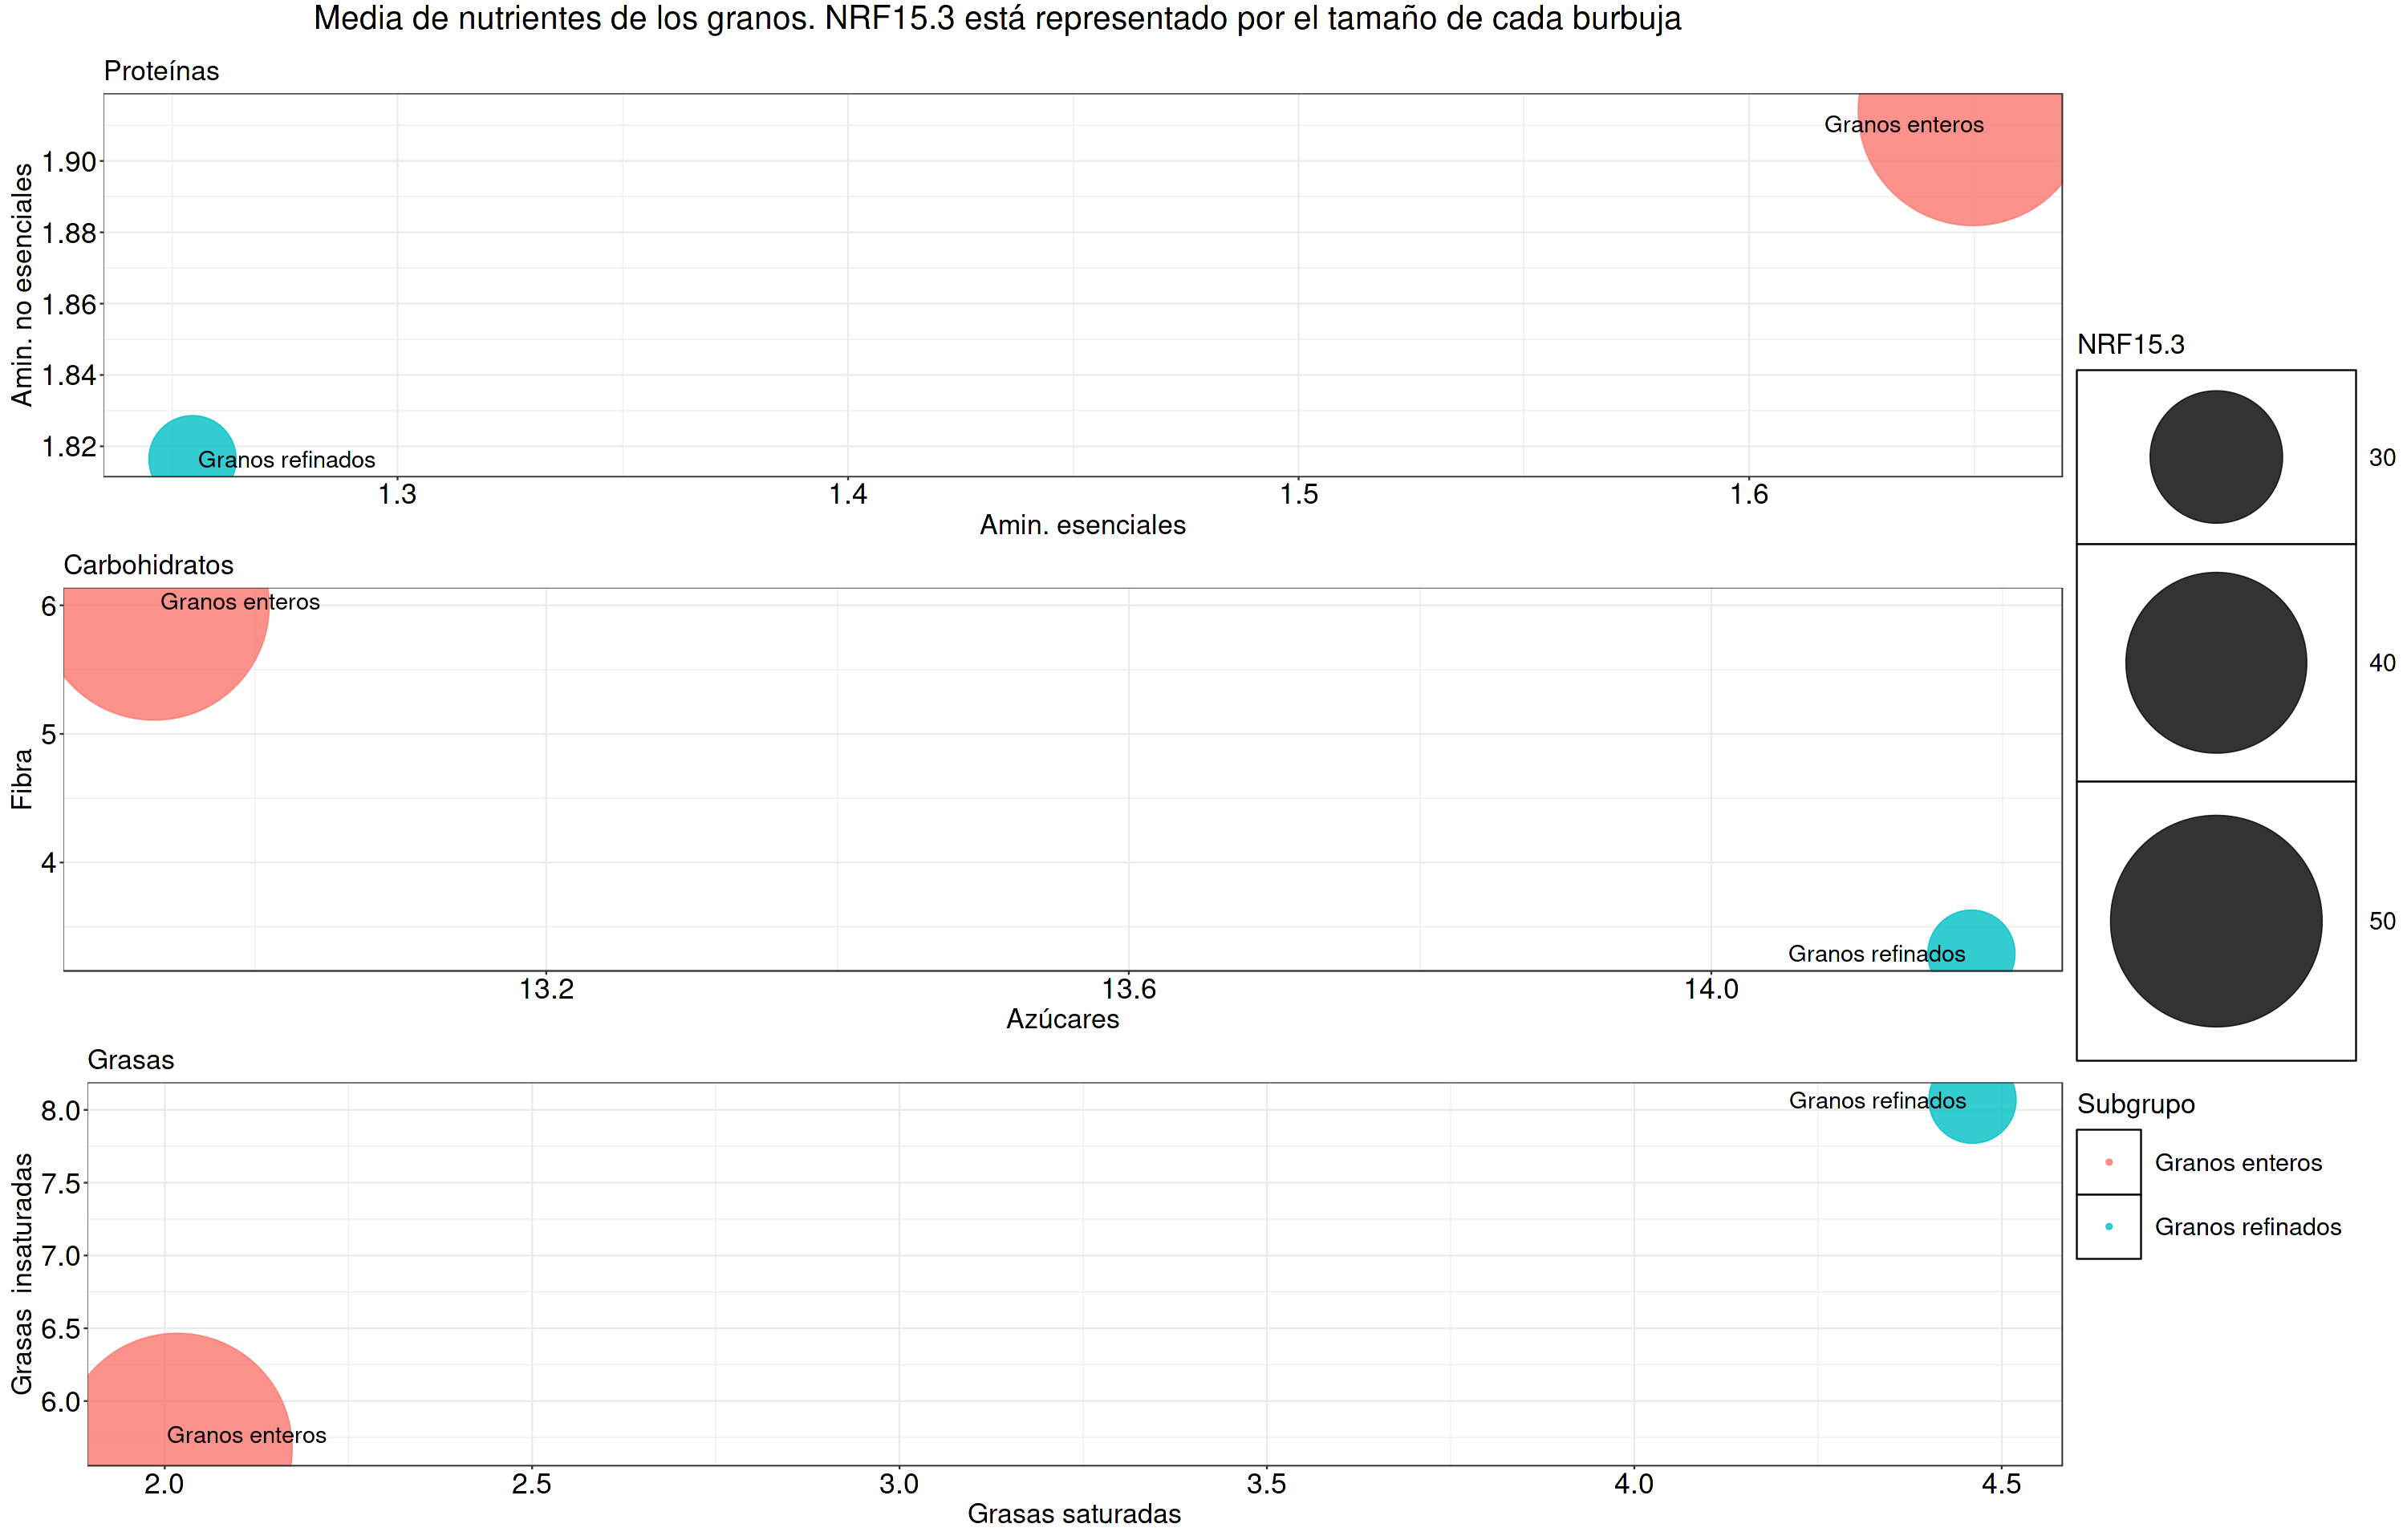

In [25]:
plot_size(25,16)
df_subgrupo_granos = df_subgrupo %>% filter(Grupo=="Granos")

# Most basic bubble plot
a=df_subgrupo_granos   %>%
  ggplot(aes(x=AminEsenc, y=AminNoEsenc,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Amin. no esenciales") +
    xlab("Amin. esenciales")+ 
ggtitle("Proteínas")+ 
 theme(plot.title = element_text(size = 20))  


# Most basic bubble plot
b=df_subgrupo_granos   %>%
  ggplot(aes(x=Azúcares, y=Fibra,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Fibra") +
    xlab("Azúcares")+ 
ggtitle("Carbohidratos")+ 
 theme(plot.title = element_text(size = 20))  


# Most basic bubble plot
c=df_subgrupo_granos   %>%
  ggplot(aes(x=GrasasSaturadas, y=GrasasInsaturadas,size=NRF15.3,color = Subgrupo)) +
  geom_point(alpha=0.8) +
  geom_text_repel(aes(label=Subgrupo),size=6,color='black')+ 
    scale_size(range = c(30, 80),name="NRF15.3") +
    theme(legend.position="right") +
    ylab("Grasas  insaturadas") +
    xlab("Grasas saturadas")+ 
ggtitle("Grasas")+ 
 theme(plot.title = element_text(size = 20)) 


mix_granos=ggarrange(a,b,c, nrow=3, common.legend = TRUE, legend="right")+
  theme(plot.margin = margin(0.5,0.1,0.1,0.1, "cm")) 
annotate_figure(mix_granos,top=text_grob("Media de nutrientes de los granos. NRF15.3 está representado por el tamaño de cada burbuja", color = "black", size = 24, hjust=0.65))

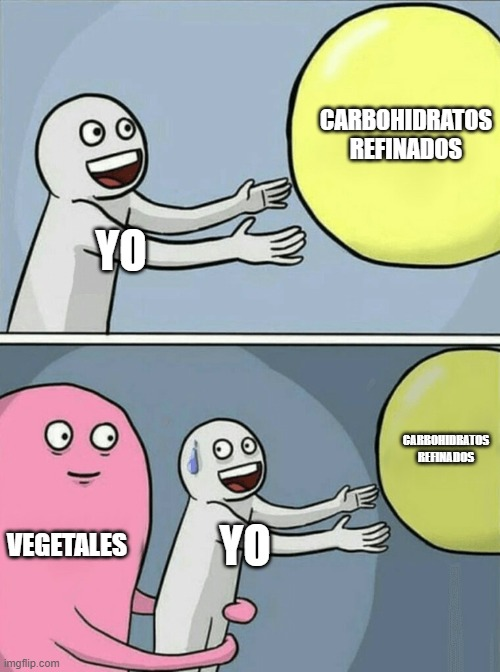

Eliminamos del dataset, todos aquellos alimentos que tienen nombres de marcas 

In [26]:
data_marcas= data.frame(data)#backup con los nombres de marcas, en caso de querer usarlos
marcas=filter(data,grepl('.*([A-Z]){2,}.*$',name)) #seleccionamos alimentos que contienen nombres de marcas (que tengan al menos dos letras mayusculas seguidas)
data=data[!data$name %in% marcas$name, , drop = FALSE] #eliminamos esos alimentos

# Análisis de proteínas
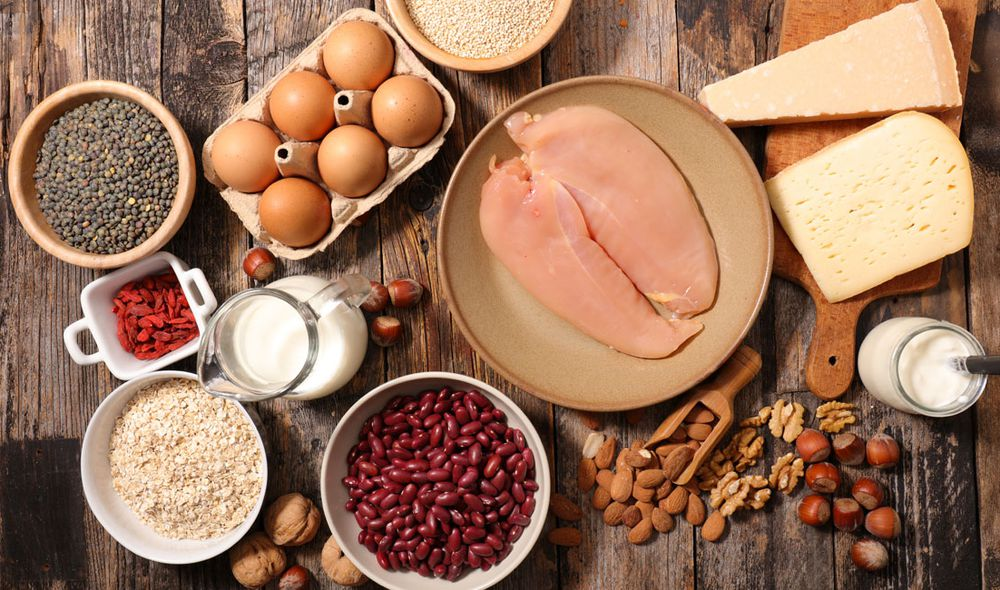


Son los pilares fundamentales de la vida. Es necesario consumir proteínas en la dieta para ayudar al cuerpo a reparar células y producir células nuevas. Cada gramo de proteína aporta 4kcal de energía.<br/> 
Se pueden clasificar segun su valor biológico:<br/> 
* **Alto valor biologico**: contienen los 9 aminoácidos esenciales
* **Bajo valor biológico**: no contienen (o en muy poca cantidad) los aminoacidos esenciales


**Aminoácidos**<br/> 
La estructura básica de la proteína es una cadena de aminoácidos.  El cuerpo humano necesita un gran número de aminoácidos en cantidades suficientemente grandes para mantener una buena salud. <br/>
Estos se pueden clasificar en:<br/>
* **Esenciales**: no son sintetizados por el cuerpo, deben incluirse en la alimentación
* **No esenciales**: son sintetizados por el cuerpo, no es necesaria una ingesta directa<br/> 

Los esenciales se encuentran principalmente en fuentes animales tales como las carnes, la leche, el pescado y los huevos y los no esenciales, principalmente en fuentes vegetales como la soja (soya), los fríjoles, las legumbres, la mantequilla de nueces y algunos granos. Si bien los esenciales no pueden faltar en la alimentación (ya que el cuerpo en si mismo no los produce), los no esenciales tambien aportan muchos beneficios. <br/>
Aunque los aminoacidos forman parte de las proteínas, tambien se pueden obtener beneficios adicionales al consumir aminoacidos aislados, ya que sirven para diversas funciones. Además algunas personas tienen problemas para digerir las proteínas (en especial cuando se excede la cantidad adecuada para cada persona), por eso a veces se opta por el consumo de aminoacidos aislados.<br/> 

Ver el [diccionario de datos](https://docs.google.com/document/d/13ZNXDsYDZ-ctmsnF3UU4uiLg42txIjE-/edit?usp=sharing&ouid=114517844413562493811&rtpof=true&sd=true) para más detalles

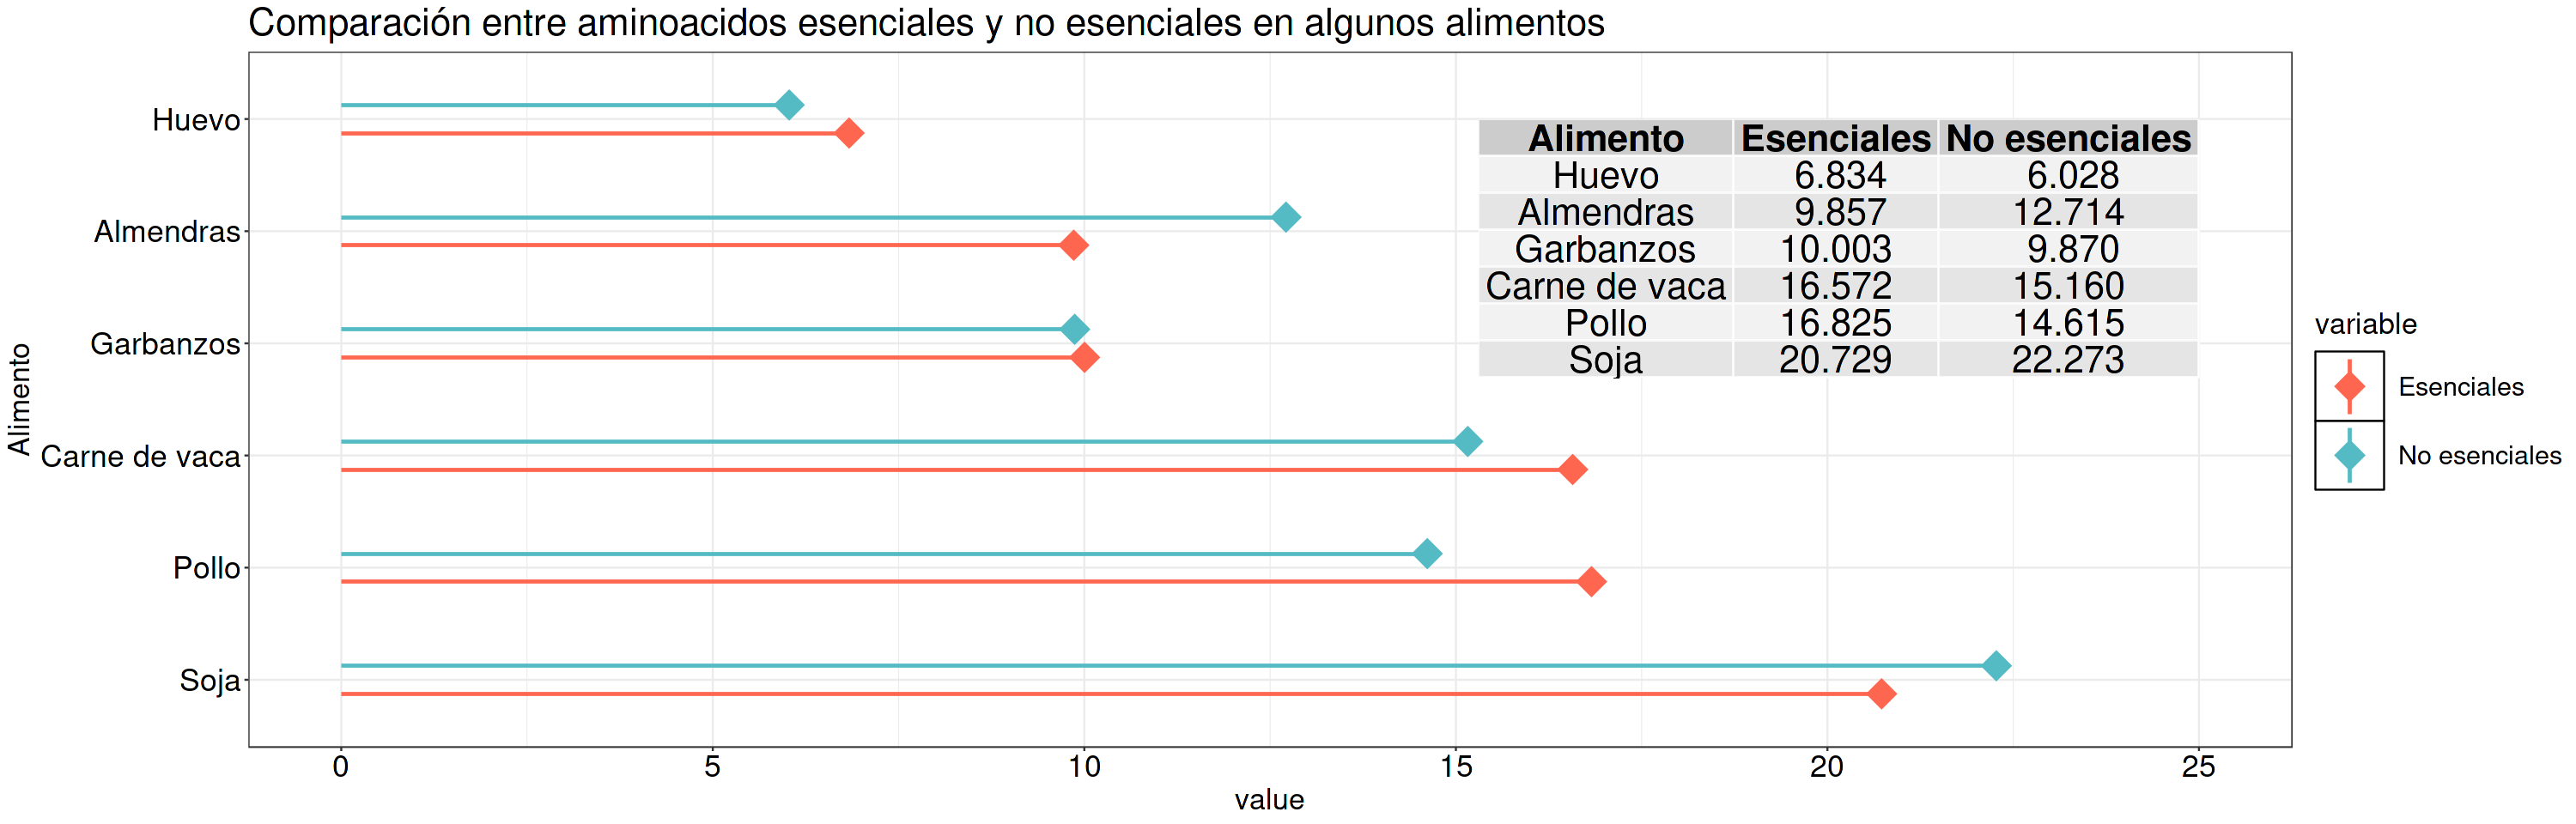

In [27]:
plot_size(25,8)
#CREAMOS COLUMNAS CALCULADAS

#data$AminEsenc = data$arginine_g + data$cystine_g + data$glycine_g + data$isoleucine_g + data$leucine_g + 
#                 data$lysine_g + data$methionine_g + data$phenylalanine_g +
#                 data$threonine_g + data$tryptophan_g + data$valine_g #defino el campo suma de aminoacidos esenciales

#data$AminNoEsenc = data$alanine_g + data$aspartic_acid_g + data$glutamic_acid_g + data$histidine_g +
#                   data$hydroxyproline_g  +  data$proline_g + data$serine_g + data$tyrosine_g #defino el campo suma de aminoacidos no esenciales

#data$AminTotal_g=data$AminEsenc + data$AminNoEsenc  # la suma total de aminoacidos

#--------------------------------------------------------------------------------
#SELECCIONAMOS ALIMENTOS PARA GRAFICAR
#--------------------------------------------------------------------------------


plt_bt_prot= data%>% filter(name=='Egg, fresh, raw, whole' | name=='Soybeans, raw, mature seeds' | name=='Nuts, almonds'|
                           name=='Chicken, fried, cooked, giblets, broilers or fryers' |name=='Beef, braised, cooked, choice, separable lean and fat, chuck for stew'|
                           name=='Chickpeas (garbanzo beans, bengal gram), raw, mature seeds') %>%
select(name,AminEsenc,AminNoEsenc)  #selecciono 6 alimentos para hacer la comparación luego
plt_bt_prot = plt_bt_prot %>%rename('Esenciales' = AminEsenc,'No esenciales' = AminNoEsenc)


#--------------------------------------------------------------------------------
#CAMBIAMOS LOS NOMBRES DE LOS ALIMENTOS
#--------------------------------------------------------------------------------
#cambiamos los nombres de los alimentos
plt_bt_prot["name"][plt_bt_prot["name"] == "Nuts, almonds"] <- "Almendras"
plt_bt_prot["name"][plt_bt_prot["name"] == "Soybeans, raw, mature seeds"] <- "Soja"
plt_bt_prot["name"][plt_bt_prot["name"] == "Egg, fresh, raw, whole"] <- "Huevo"
plt_bt_prot["name"][plt_bt_prot["name"] == "Chicken, fried, cooked, giblets, broilers or fryers"] <- "Pollo"
plt_bt_prot["name"][plt_bt_prot["name"] == "Chickpeas (garbanzo beans, bengal gram), raw, mature seeds"] <- "Garbanzos"
plt_bt_prot["name"][plt_bt_prot["name"] == "Beef, braised, cooked, choice, separable lean and fat, chuck for stew"] <- "Carne de vaca"

plt_bt_prot = plt_bt_prot[order(plt_bt_prot$Esenciales),] #ordenamos por aminoacidos esenciales
plt_bt_prot = plt_bt_prot %>%  rename('Alimento' = name) #renombramos columna


suppressMessages({
  plt_bt_prot.long<-melt(plt_bt_prot) #formateamos el dataframe para graficar
})


#--------------------------------------------------------------------------------
#GRAFICAMOS
#--------------------------------------------------------------------------------


plt_bt_prot.long %>%mutate(Alimento = fct_reorder(Alimento, -value)) %>%
ggplot(aes(y = value, ymin = 0,color=variable,
           x = Alimento, ymax = value, group = variable)) +
     geom_point(aes(color = variable), size=9, shape=18, stroke=2,position = position_dodge(.5))+
     geom_linerange(position = position_dodge(.5),size=1,aes(colour=variable))  +
     coord_flip()+                                               
     annotate(geom = "table",
           x = 6, size=9,
           y = 25,
           label = list(plt_bt_prot)) + 
scale_colour_manual(values = alpha(c("#FF664F", "#54BAC3")))+ 
  scale_x_discrete(limits=c("Soja","Pollo","Carne de vaca","Garbanzos","Almendras","Huevo"))+
ggtitle("Comparación entre aminoacidos esenciales y no esenciales en algunos alimentos")

**¿Qué alimentos se consideran altos en proteína?**
Existen distintos criterios y puntos de vista respecto a qué considerar alto en proteína. Aca vamos a considerar alimentos altos en proteína a aquellos que las proteínas aportan como mínimo el 20% del valor energético del alimento.<br/>
Por ejemplo, para 'Egg, dried, white' (clara de huevo deshidratada) por cada 100 gramos:
* calorías total: 382kcal .
* proteína: 81.1 gramos (81.1x4= 324kcal) ---> 324/383= 84% de las calorías totales vienen de la proteína
* grasas: 0 gramos 
* carbohidratos: 7.80 gramos

Fuente: https://ec.europa.eu/food/safety/labelling-and-nutrition/nutrition-and-health-claims/nutrition-claims_en

In [28]:
#seleccionamos datos y creamos el objeto para analizar
protein20=data %>%filter(data$proteinas_porc >= 0.2)

library(cleanNLP) 
cnlp_init_udpipe()

annotation <- cnlp_annotate(input = protein20$name)

#genero la lista de palabras , junto a sus respectivos campos para el analisis NLP 
#'upos' muestra que tipo de palabra es (adjetivo, sustantivo, etc)

#----------------------------------------------------------
#filtramos tokens
#----------------------------------------------------------

words=annotation$token%>% filter(upos=='NOUN' | upos=='PROPN' )%>% select(token) #selecciono solo las palabras que son sustantivos o nombres propios

words=words %>% #obtengo la frecuencia de cada palabra (cuantas veces aparece cada una)
  na.omit() %>%
  tolower() %>%
  strsplit(split = "\\W") %>% 
  unlist() %>%
  table() %>%
  sort(decreasing = TRUE) 

words=as.data.frame(words) #lo transformo a dataframe para luego usar la funcion wordcloud
words= words %>% filter (.!='lean' & .!='fat') #quito del df las palabras lean y fat ya que no representan al alimento propiamente que quiero mostrar
words= words %>% filter(between(Freq, 40, 1000)) #defino un minimo y maximo de ocurrencia de cada palabra, para que la visualizacion tenga más sentido



 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




Processed document 10 of 3548
Processed document 20 of 3548
Processed document 30 of 3548
Processed document 40 of 3548
Processed document 50 of 3548
Processed document 60 of 3548
Processed document 70 of 3548
Processed document 80 of 3548
Processed document 90 of 3548
Processed document 100 of 3548
Processed document 110 of 3548
Processed document 120 of 3548
Processed document 130 of 3548
Processed document 140 of 3548
Processed document 150 of 3548
Processed document 160 of 3548
Processed document 170 of 3548
Processed document 180 of 3548
Processed document 190 of 3548
Processed document 200 of 3548
Processed document 210 of 3548
Processed document 220 of 3548
Processed document 230 of 3548
Processed document 240 of 3548
Processed document 250 of 3548
Processed document 260 of 3548
Processed document 270 of 3548
Processed document 280 of 3548
Processed document 290 of 3548
Processed document 300 of 3548
Processed document 310 of 3548
Processed document 320 of 3548
Processed documen

In [29]:
#----------------------------------------------------------
#Visualizamos
#----------------------------------------------------------

library(wordcloud2) 
 
wc_prot=wordcloud2(data=words,size=1,color=rep_len( c("#e41a1c","#D2005E","#A23386","#65498E","#344E7A"), nrow(words) ))
#,color=brewer.pal(9,"Reds")

#https://universaldependencies.org/u/pos/
#https://cran.r-project.org/web/packages/cleanNLP/cleanNLP.pdf


library(htmlwidgets)
saveWidget(wc_prot, "wc_prot.html",selfcontained = F)
library('IRdisplay')
display_html('<iframe src="wc_prot.html" width=100% height=450></iframe>')

**¿Qué alimentos altos en proteinas es especialmente recomendable consumir?** <br/> 
Basicamente los que también sean altos en aminoacidos, especialmente los esenciales ya que son los que el cuerpo no produce por si mismo.

In [30]:
#CREAMOS DF PARA VISUALIZAR

data$protein_g_w = data$protein_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99))  #winsorize para disminuir los outliers
data$AminTotal_g_w = data$AminTotal_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
protein20=data %>%filter(data$proteinas_porc >= 0.2) #alimentos en los cuales al menos 20% de la energia total (kcal), es proveida por proteinas
#NRF15.3=protein20$NRF15.3Wins #para que el titulo de la leyenda de color quede más prolijo
#----------------------------------------------------------------------
#ETIQUETAS DE TRES ALIMENTOS
huevo <- protein20%>%filter(name=='Egg, fresh, raw, whole')
garbanzos <- protein20%>%filter(name=='Chickpeas (garbanzo beans, bengal gram), raw, mature seeds')
carnevaca <- protein20%>%filter(name=='Beef, braised, cooked, choice, separable lean and fat, chuck for stew')
a <- list(
  x = huevo$protein_g,
  y = huevo$AminTotal_g,
  text = "Huevo",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
    bgcolor='#fcfcd7',bordercolor='black'
)

b <- list(
  x = garbanzos$protein_g,
  y = garbanzos$AminTotal_g,
  text = "Garbanzos",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = -20,
  ay = -60,
    bgcolor='#fcfcd7',bordercolor='black'
)

c <- list(
  x = carnevaca$protein_g,
  y = carnevaca$AminTotal_g,
  text = "Carne de vaca",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = -20,
  ay = -60,
    bgcolor='#fcfcd7',bordercolor='black'
)

#----------------------------------------------------------------------
#VISUALIZACION
plt_Amin = plot_ly(
                   protein20, x = ~protein_g_w, y = ~AminTotal_g_w,symbol=~Grupo,symbols=c("circle","circle","circle","circle","circle","circle"),
                   color=~NRF15.3Wins,opacity=0.8,type = 'scatter',mode = 'markers',
                   text = ~paste("</br> Alimento:",protein20$name, #con esto tenemos estos datos al hacer 'hover' con el cursor
                                 "</br> Grupo:",protein20$Grupo,
                                 "</br> Subgrupo:",protein20$Subgrupo,
                                 "</br> Calorías:",protein20$calories_100g,"kcal",
                                 "</br> Proteínas:", protein20$protein_g,
                                 "</br> Carbohidratos:",protein20$carbohydrate_g,
                                 "</br> Grasas Totales:", protein20$fat_g,
                                 "</br> Aminoácidos:", protein20$AminTotal_g,
                                 "</br> NRF 15.3:", protein20$NRF15.3
                                )
                )
plt_Amin = plt_Amin %>% layout(title = list(text = 'Altos en proteína, su relación con los aminoácidos (interactivo)',x=0.12, y = 0.99),
                        font=t,
                        xaxis = list(title = 'Proteína (en gramos) - Winsorized'),
                        yaxis = list(title = 'Total aminoácidos (en gramos) - Winsorized'),
                        shapes=list(type="rect",fillcolor="blue",line=list(color="blue"),opacity = 0.2,x0=0,x1=36,xref="x", y0=-1, y1=1,yref="y"), #recuadro
                        annotations=list(a,b,c,list(text="Bajos en aminoácidos",x=33,y=2.5,showarrow = F,font=list(color="#9c93eb",size=13))),#texto
                        legend=list(title=list(text='<b> Seleccione grupo(s): </b>'))
                              )
#plt_Amin


#----------------------------------------------------------------------
# EXPORTAR A HTML
#library(htmlwidgets)
saveWidget(plt_Amin, "plt_Amin.html")
#library('IRdisplay')
display_html('<iframe src="plt_Amin.html" width=100% height=450></iframe>')

**¿Qué son los aminoácidos ramificados (BCAA) y como se relacionan con el aumento de masa muscular?** <br/>
Es común que las personas que están en un regimen de aumento de masa muscular, consuman mucha cantidad de proteína ya que aportan lo necesario para que esto suceda. En algunos casos hasta consumen batidos proteicos con 40/50 gramos de proteína(o más).  A grandes rasgos funciona asi, sin embargo está comprobado que consumir proteínas en exceso por un largo plazo tiene efectos negativos en la salud, afectando principalmente al hígado y riñones.<br/>
Cuánto es un exceso de proteínas depende de cada organismo, de sus actividades, de que otras cosas consume, su estilo de vida, etc.<br/>

**Aminoácidos ramificados (BCAA)** es la combinación de tres aminoácidos esenciales (**valina, isoleucina y leucina**) que componen casi la tercera parte de los músculos esqueléticos en el cuerpo humano y desempeñan un papel muy importante en la síntesis de proteínas.<br/>
Para las personas que están en un régimen de aumento de masa muscular, usualmente se recomienda el consumo de este grupo de aminoacidos de manera aislada ya que son muy importantes para la reparación de los musculos (en especial leucina, se recomienda al menos 2.5 gramos diarios), sin los efectos negativos del consumo excesivo de proteínas.<br/>
Se encuentran especialmente en carnes, lácteos y legumbres. 

In [31]:
#CREAMOS DF PARA VISUALIZAR
#data$BCAA_g=data$isoleucine_g + data$leucine_g + data$valine_g

#data$protein_g_w = data$protein_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99))  #winsorize para disminuir los outliers
data$BCAA_g_w = data$BCAA_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
bcaa2=data %>%filter(data$proteinas_porc >= 0.2) #alimentos en los cuales al menos 20% de la energia total (kcal), es proveida por proteinas
bcaa2 = bcaa2 %>%filter(bcaa2$BCAA_g >= 2)
bcaa2=bcaa2%>%filter(Grupo!='Frutas')
#NRF15.3=protein20$NRF15.3Wins #para que el titulo de la leyenda de color quede más prolijo

#----------------------------------------------------------------------

#----------------------------------------------------------------------
#VISUALIZACION
plt_BCAA <- plot_ly(
  bcaa2, x = ~protein_g_w, y = ~BCAA_g_w,symbol=~Grupo,symbols=c("circle","circle","circle","circle","circle","circle"),
  color = ~NRF15.3Wins,
  opacity=0.8,
    type = 'scatter',
    mode = 'markers',
  text = ~paste("</br> Alimento:",bcaa2$name, #con esto tenemos estos datos al hacer 'hover' con el cursor
                 "</br> Grupo:",bcaa2$Grupo,
                                 "</br> Subgrupo:",bcaa2$Subgrupo,
                "</br> Calorías:",bcaa2$calories_100g,"kcal",
                "</br> Proteínas", bcaa2$protein_g,
                "</br> Carbohidratos:",bcaa2$carbohydrate_g,
                "</br> Grasas Totales:", bcaa2$fat_g,
                "</br> BCAA:", bcaa2$BCAA_g,
                "</br> NRF 15.3:", bcaa2$NRF15.3
                )
)
plt_BCAA <- plt_BCAA %>% layout(title = list(text = 'Altos en proteína y BCAA (interactivo)',x=0.08, y = 0.99),
                        font=t,
                        xaxis = list(title = 'Proteína (en gramos) - Winsorized'),
                        yaxis = list(title = 'BCAA (en gramos) - Winsorized'),
                        legend=list(title=list(text='<b> Seleccione grupo(s): </b>'))
                        
 )

#plt_BCAA

#----------------------------------------------------------------------
# EXPORTAR A HTML
#library(htmlwidgets)
saveWidget(plt_BCAA, "plt_BCAA.html")
#library('IRdisplay')
display_html('<iframe src="plt_BCAA.html" width=100% height=450></iframe>')

# Análisis de carbohidratos
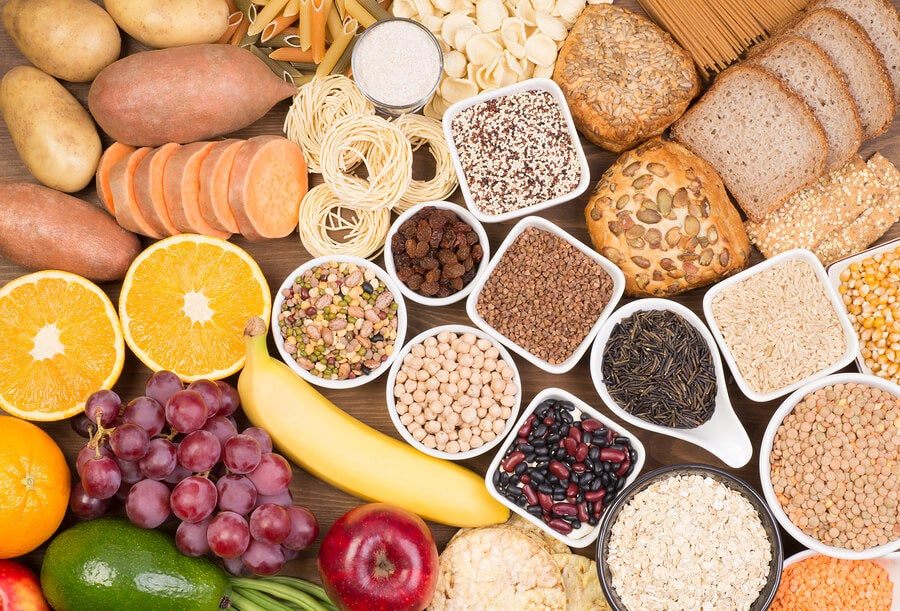

Son moléculas de azúcar. Junto con las proteínas y las grasas, son uno de los tres nutrientes principales que se encuentran en alimentos. <br/> En el cuerpo,  los carbohidratos se descomponen en glucosa, que es la principal fuente de energía para las células, tejidos y órganos del cuerpo. Puede usarse inmediatamente o almacenarse en el hígado y los músculos para su uso posterior. Aportan 4kcal por cada gramo<br/> 

Hay dos tipos pricipales: 
* **simples (azúcares):** compuestos principalmente de azúcares.
* **complejos (almidones y fibra):** proveen fibra, vitaminas, minerales y azúcares. No aumentan rapidamente los niveles de azúcar en sangre (en general son de bajo índice glucemico)

Se recomienda por lo general, reducir el consumo de los simples y aumentar el consumo de los complejos.

Ver el [diccionario de datos](https://docs.google.com/document/d/13ZNXDsYDZ-ctmsnF3UU4uiLg42txIjE-/edit?usp=sharing&ouid=114517844413562493811&rtpof=true&sd=true) para más detalles

In [32]:
plt_bt_carbs= data%>% filter(name=='Bread, whole-wheat, pita' | name=='Apples, with skin, red delicious, raw' | name=='Cereals ready-to-eat, chocolate-flavored frosted puffed corn'|
                           name=='Cocoa, unsweetened, dry powder' |name=='Soybeans, raw, mature seeds'|
                           name=='Carrot, dehydrated') %>%
select(name,sugars_g,fiber_g)  #selecciono 6 alimentos para hacer la comparación luego
plt_bt_carbs = plt_bt_carbs %>%rename('Azúcares' = sugars_g,'Fibra' = fiber_g)


#cambiamos los nombres de los alimentos
plt_bt_carbs["name"][plt_bt_carbs["name"] == "Bread, whole-wheat, pita"] <- "Pan Pita Integral"
plt_bt_carbs["name"][plt_bt_carbs["name"] == "Apples, with skin, red delicious, raw"] <- "Manzana 'deliciosa'"
plt_bt_carbs["name"][plt_bt_carbs["name"] == "Cereals ready-to-eat, chocolate-flavored frosted puffed corn"] <- "Cereal sabor chocolate"
plt_bt_carbs["name"][plt_bt_carbs["name"] == "Cocoa, unsweetened, dry powder"] <- "Cacao (puro)"
plt_bt_carbs["name"][plt_bt_carbs["name"] == "Soybeans, raw, mature seeds"] <- "Granos de soja"
plt_bt_carbs["name"][plt_bt_carbs["name"] == "Carrot, dehydrated"] <- "Zanahoria deshidratada"

plt_bt_carbs = plt_bt_carbs[order(plt_bt_carbs$Azúcares),] #ordenamos 
plt_bt_carbs = plt_bt_carbs %>%  rename('Alimento' = name) #renombramos columna



suppressMessages({
  plt_bt_carbs.long<-melt(plt_bt_carbs)
})


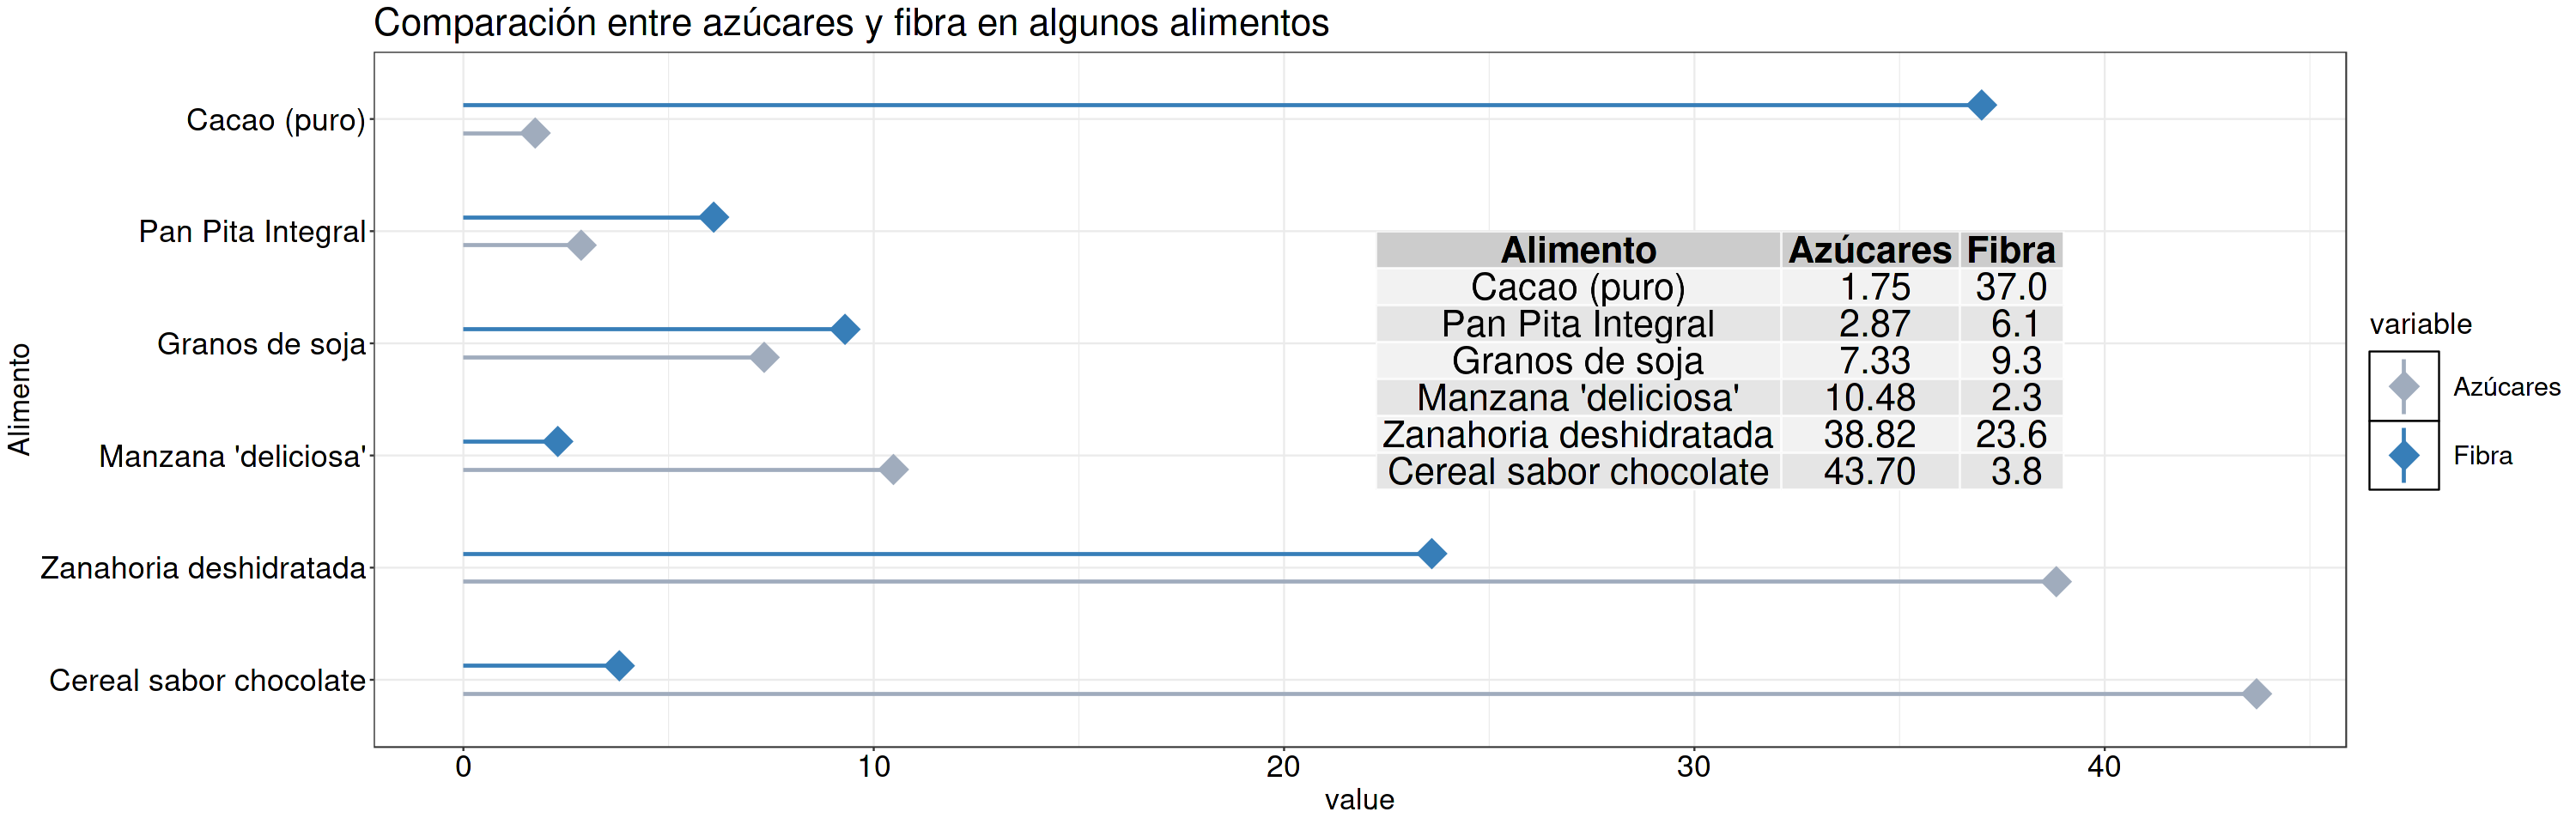

In [33]:
plot_size(25,8)
plt_bt_carbs.long %>%mutate(Alimento = fct_reorder(Alimento, -value)) %>%
ggplot(aes(y = value, ymin = 0,
           x = Alimento, ymax = value, group = variable)) +
     geom_point(aes(colour = variable), size=9, shape=18, stroke=2,position = position_dodge(.5))+
     geom_linerange(position = position_dodge(.5),size=1,aes(colour=variable))  +
     coord_flip()+                                               
     annotate(geom = "table",
           x = 5, size=9,
           y = 39,
           label = list(plt_bt_carbs)) + 
scale_colour_manual(values = alpha(c("#A0ACBD", "#377EB8"))) + 
  scale_x_discrete(limits=c("Cereal sabor chocolate","Zanahoria deshidratada","Manzana 'deliciosa'","Granos de soja","Pan Pita Integral","Cacao (puro)"))+
ggtitle("Comparación entre azúcares y fibra en algunos alimentos")

**¿Qué alimentos se consideran altos en carbohidratos?**
Existen distintos criterios y puntos de vista respecto a qué considerar alto. Una de las más aceptadas es considerar alimentos altos en carbohidratos a aquellos en donde los carbohidratos aportan como mínimo el 20% del valor energético del alimento.<br/>
Por ejemplo, para 100 gramos de arroz blanco vaporizado('Rice, dry, enriched, parboiled, long-grain, white'):
* calorías total: 374kcal 
* proteína: 7.51 gramos 
* grasas: 1.03 gramos 
* carbohidratos: 80.89 gramos (80.89x4=323kcal) ---> 323/374= 86% de las calorías totales vienen de los carbohidratos

In [34]:
#seleccionamos datos y creamos el objeto para analizar
carb20 = data  %>% filter(carbs_porc >= 0.2)

#library(cleanNLP)
#cnlp_init_udpipe()

annotation <- cnlp_annotate(input = carb20$name)

#genero la lista de palabras , junto a sus respectivos campos para el analisis NLP 
#'upos' muestra que tipo de palabras es (adjetivo, sustantivo, etc)



#----------------------------------------------------------
#filtramos tokens
#----------------------------------------------------------
words=annotation$token%>% filter(upos=='NOUN' | upos=='PROPN' )%>% select(token) #selecciono solo las palabras que son sustantivos o nombres propios

words=words %>%
  na.omit() %>%
  tolower() %>%
  strsplit(split = "\\W") %>% 
  unlist() %>%
  table() %>%
  sort(decreasing = TRUE) #obtengo la frecuencia de cada palabra (cuantas veces aparece cada una)

words=as.data.frame(words) #lo transformo a dataframe para luego usar la funcion wordcloud
words= words %>% filter (.!='eat') #quito del df las palabras que no representan al alimento propiamente que quiero mostrar
words= words %>% filter(between(Freq, 70, 331)) #defino un minimo y maximo de ocurrencia de cada palabra, para que la visualizacion quede con más sentido

Processed document 10 of 3668
Processed document 20 of 3668
Processed document 30 of 3668
Processed document 40 of 3668
Processed document 50 of 3668
Processed document 60 of 3668
Processed document 70 of 3668
Processed document 80 of 3668
Processed document 90 of 3668
Processed document 100 of 3668
Processed document 110 of 3668
Processed document 120 of 3668
Processed document 130 of 3668
Processed document 140 of 3668
Processed document 150 of 3668
Processed document 160 of 3668
Processed document 170 of 3668
Processed document 180 of 3668
Processed document 190 of 3668
Processed document 200 of 3668
Processed document 210 of 3668
Processed document 220 of 3668
Processed document 230 of 3668
Processed document 240 of 3668
Processed document 250 of 3668
Processed document 260 of 3668
Processed document 270 of 3668
Processed document 280 of 3668
Processed document 290 of 3668
Processed document 300 of 3668
Processed document 310 of 3668
Processed document 320 of 3668
Processed documen

In [35]:
#----------------------------------------------------------
 #creamos visualizacion
#----------------------------------------------------------

#library(wordcloud2) 
 
wc_carbs=wordcloud2(data=words,size = 1,color=rep_len( c("#377EB8","#5677BB","#756FB8","#9164AF","#A859A0"), nrow(words) ))
#,color=brewer.pal(9,"Oranges")

#https://universaldependencies.org/u/pos/
#https://cran.r-project.org/web/packages/cleanNLP/cleanNLP.pdf

#library(htmlwidgets)
saveWidget(wc_carbs, "wc_carbs.html",selfcontained = F)
#library('IRdisplay')
display_html('<iframe src="wc_carbs.html" width=100% height=450></iframe>')

**¿Cuáles son los alimentos altos en carbohidratos que más se recomienda consumir?**<br/> 
A grandes rasgos, los que estén a la izquierda de la linea naranja, ya que proveen menos de 15 gramos de azúcar cada 100 gramos de alimento.<br/> 
https://www.nhs.uk/live-well/eat-well/how-to-read-food-labels/

In [36]:
#CREAMOS DF PARA VISUALIZAR
#Carbohidratos=carbs20$carbohydrate_g #copia de la variable que usaré en color para que quede prolijo el titulo de la leyenda
data$fiber_g_w = data$fiber_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
data$sugar_g_w = data$sugars_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
carbs20 = data %>%  filter(carbs_porc >= 0.2)

#----------------------------------------------------------------------
#ETIQUETAS DE TRES ALIMENTOS
cereal <- carbs20%>%filter(name=='Cereals ready-to-eat, chocolate-flavored frosted puffed corn')
manzana <- carbs20%>%filter(name=='Apples, with skin, red delicious, raw')
soja <- carbs20%>%filter(name=='Soybeans, raw, mature seeds')

a <- list(
  x = cereal$sugar_g_w,
  y = cereal$fiber_g_w,
  text = "Cereal sabor chocolate",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
    bgcolor='#fcfcd7',bordercolor='black',
    ax = 10,
    ay = 75
)

b <- list(
  x = manzana$sugar_g_w,
  y = manzana$fiber_g_w,
  text = "Manzana",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = -20,
  ay = 65,
    bgcolor='#fcfcd7',bordercolor='black'
)

c <- list(
   x = soja$sugar_g_w,
  y = soja$fiber_g_w,
  text = "Granos de soja",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = -50,
  ay = -60,
    bgcolor='#fcfcd7',bordercolor='black'
)



#----------------------------------------------------------------------
#VISUALIZACION
pltAzuc <- plot_ly(
  carbs20, x = ~sugar_g_w, y = ~fiber_g_w,symbol=~Grupo,symbols=c("circle","circle","circle","circle","circle","circle"),
  color = ~NRF15.3Wins,
  opacity=0.8,
    type = 'scatter',
    mode = 'markers',
  text = ~paste("</br> Alimento:",carbs20$name, #con esto tenemos estos datos al hacer 'hover' con el cursor
                 "</br> Grupo:",carb20$Grupo,
                                 "</br> Subgrupo:",carb20$Subgrupo,
                "</br> Proteínas", carbs20$protein_g,
                "</br> Carbohidratos:",carbs20$carbohydrate_g,
                "</br> Grasas Totales:", carbs20$fat_g,
                "</br> Fibra:", carbs20$fiber_g,
                "</br> Azúcares:", carbs20$sugars_g,
                "</br> NRF 15.3:", carbs20$NRF15.3
                )
)
pltAzuc <- pltAzuc %>% layout(title = list(text = 'Altos en carbohidratos, su contenido de azúcares y fibra (interactivo)',x=0.12, y = 0.99),
                        font=t,
                        xaxis = list(title = 'Azúcares (en gramos) - Winsorized'),
                        yaxis = list(title = 'Fibra (en gramos) - Winsorized'),
                        annotations=list(a,b,c,list(x = 32, y = 21,showarrow = TRUE,axref='x', ayref='y',ax=23,ay=21,arrowcolor = "#ff993e"), #flecha
                                         list(text="Alto en azúcar",x = 28, y = 21.9,showarrow = FALSE,font=list(color="#ff993e")) #texto
                                        ),
                        shapes=list(type='line', x0= 22.5, x1= 22.5, y0=-2, y1=max(carbs20$fiber_g_w+3), #linea de referencia, vertical
                                    line=list(dash='dot', width=2,color="#ff993e") 
                                    ),
                              legend=list(title=list(text='<b> Seleccione grupo(s): </b>'))
                             )
#type = "log"
#pltAzuc
#----------------------------------------------------------------------
# EXPORTAR A HTML

#library(htmlwidgets)
saveWidget(pltAzuc, "pltAzuc.html")
#library('IRdisplay')
display_html('<iframe src="pltAzuc.html" width=100% height=450></iframe>')

**¿Qué alimentos debo considerar para una dieta alta en fibra?** <br/> 
Todos aquellos que brinden al menos 6 gramos de fibra cada 100 gramos de alimento (aunque cabe aclarar, ya pasando los 3 gramos se considera al alimento como una buena fuente de fibra).

In [37]:
#CREAMOS DF PARA VISUALIZAR
#data$fiber_g_w = data$fiber_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
#data$sugar_g_w = data$sugars_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
fiber6 = data %>%  filter(fiber_g >= 6 & carbs_porc >= 0.2)
#Carbohidratos=carbs20$carbohydrate_g #copia de la variable que usaré en color para que quede prolijo el titulo de la leyenda


#----------------------------------------------------------------------
#ETIQUETAS DE TRES ALIMENTOS
cacao <- fiber6%>%filter(name=='Cocoa, unsweetened, dry powder')
zanahoria <- fiber6%>%filter(name=='Carrot, dehydrated')
panpita <- fiber6%>%filter(name=='Bread, whole-wheat, pita')

a <- list(
  x = cacao$sugar_g_w,
  y = cacao$fiber_g_w,
  text = "Cacao (puro)",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
     ax = 30,
  ay = 30,
    bgcolor='#fcfcd7',bordercolor='black'
)

b <- list(
  x = zanahoria$sugar_g_w,
  y = zanahoria$fiber_g_w,
  text = "Zanahoria (deshidratada)",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = 20,
  ay = 50,
    bgcolor='#fcfcd7',bordercolor='black'
)

c <- list(
   x = panpita$sugar_g_w,
  y = panpita$fiber_g_w,
  text = "Pan Pita Integral",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = 25,
  ay = 20,
    bgcolor='#fcfcd7',bordercolor='black'
)

#----------------------------------------------------------------------
#VISUALIZACION
pltFib <- plot_ly(
  fiber6, x = ~sugar_g_w, y = ~fiber_g_w,symbol=~Grupo,symbols=c("circle","circle","circle","circle","circle","circle"),
  color = ~NRF15.3Wins,
  opacity=0.8,
    type = 'scatter',
    mode = 'markers',
  text = ~paste("</br> Alimento:",fiber6$name, #con esto tenemos estos datos al hacer 'hover' con el cursor
                 "</br> Grupo:",fiber6$Grupo,
                                 "</br> Subgrupo:",fiber6$Subgrupo,
                "</br> Proteínas", fiber6$protein_g,
                "</br> Carbohidratos:",fiber6$carbohydrate_g,
                "</br> Grasas Totales:", fiber6$fat_g,
                "</br> Fibra:", fiber6$fiber_g,
                "</br> Azúcares:", fiber6$sugars_g,
                "</br> NRF 15.3:", fiber6$NRF15.3
                )
)
pltFib <- pltFib %>% layout(title = list(text = 'Altos en fibra (interactivo)',x=0.12, y = 0.99),
                        font=t,
                        xaxis = list(title = 'Azúcares (en gramos) - Winsorized'),
                        yaxis = list(title = 'Fibra (en gramos) - Winsorized'),
                        annotations=list(a,b,c,list(x = 32, y = 19.5,showarrow = TRUE,axref='x', ayref='y',ax=23,ay=19.5,arrowcolor = "#ff993e"), #flecha
                                         list(text="Alto en azúcar",x = 28, y = 20,showarrow = FALSE,font=list(color="#ff993e")) #texto
                                        ),
                        shapes=list(type='line', x0= 22.5, x1= 22.5, y0=5.5, y1=max(fiber6$fiber_g_w + 1), #linea de referencia, vertical
                                    line=list(dash='dot', width=2,color="#ff993e") 
                                    ),
                            legend=list(title=list(text='<b> Seleccione grupo(s): </b>'))
                             )
#pltAzuc
#type = "log"

#----------------------------------------------------------------------
# EXPORTAR A HTML
#library(htmlwidgets)
saveWidget(pltFib, "pltFib.html")
#library('IRdisplay')
display_html('<iframe src="pltFib.html" width=100% height=450></iframe>')

# Análisis de grasas
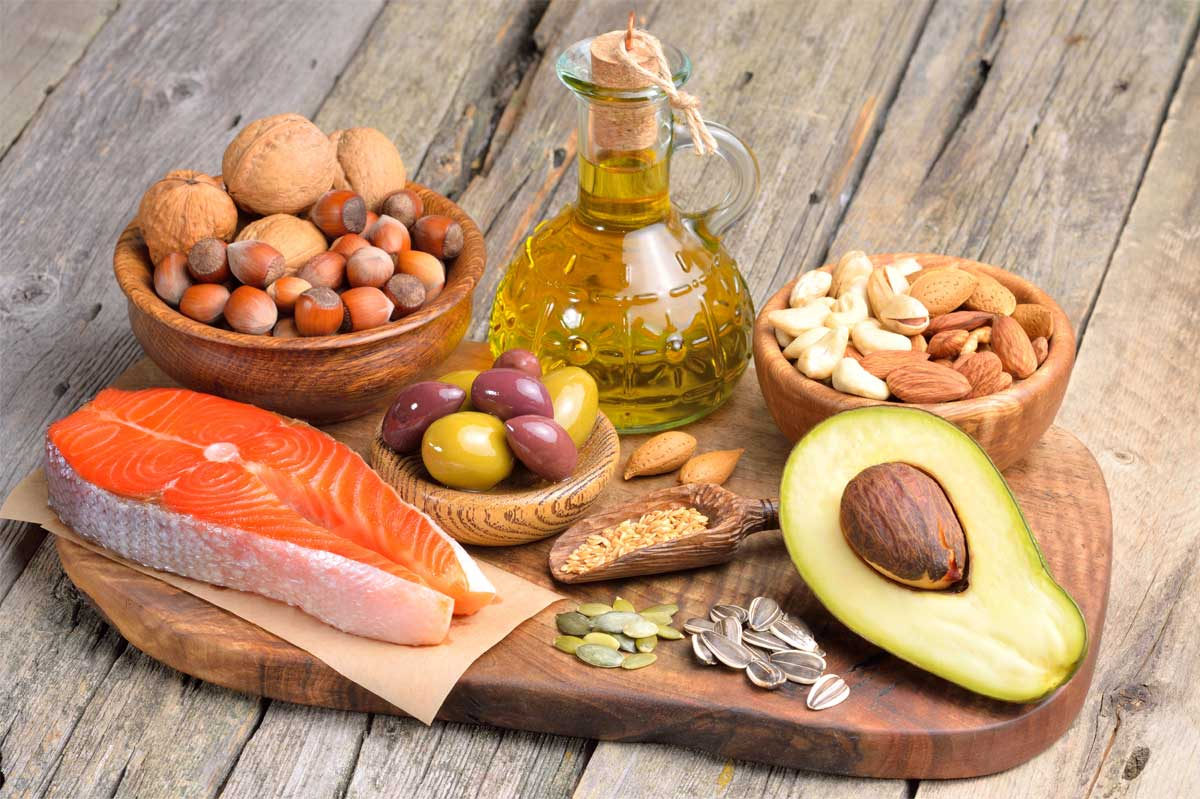

La grasa es uno de los macronutrientes que deben estar presentes en la alimentación. Es esencial para proteger los órganos, absorber las vitaminas liposolubles (A, D, E, y K), regular la produccion de hormonas y muchas cosas más. Aportan 9kcal por cada gramo

Todas las grasas están compuestas de ácidos grasos **saturados e insaturados**. Su denominación depende de cuánta cantidad de cada tipo de ácido graso contienen.<br/>
A rasgos generales se recomienda habitualmente reducir las grasas saturadas, y tener un nivel recomendado de grasas insaturadas.

Ver el [diccionario de datos](https://docs.google.com/document/d/13ZNXDsYDZ-ctmsnF3UU4uiLg42txIjE-/edit?usp=sharing&ouid=114517844413562493811&rtpof=true&sd=true) para más detalles

In [38]:
#data$grasasInsaturadas_g = data$monounsaturated_fatty_acids_g + data$polyunsaturated_fatty_acids_g #creamos la columna de grasas insaturadas


plt_sp_grasas=data%>% filter(name=='Nuts, pecans' | name=='Cheese, roquefort' | name=='Oil, salad or cooking, olive' |
                            name=='Oil, coconut' | name=="Baking chocolate, squares, unsweetened" |name=="Peanut butter, without salt, chunk style") %>%
select(name,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) #seleccionamos 6 alimentos para graficar
plt_sp_grasas = plt_sp_grasas[order(-plt_sp_grasas$grasasInsaturadas_g),]



#cambiamos los nombres de los alimentos
plt_sp_grasas["name"][plt_sp_grasas["name"] == "Oil, salad or cooking, olive"] <- "Aceite de oliva"
plt_sp_grasas["name"][plt_sp_grasas["name"] == "Nuts, pecans"] <- "Nueces Pecan"
plt_sp_grasas["name"][plt_sp_grasas["name"] == "Peanut butter, without salt, chunk style"] <- "Mantequilla de maní"
plt_sp_grasas["name"][plt_sp_grasas["name"] == "Cheese, roquefort"] <- "Queso roquefort"
plt_sp_grasas["name"][plt_sp_grasas["name"] == "Oil, coconut"] <- "Aceite de coco"
plt_sp_grasas["name"][plt_sp_grasas["name"] == "Baking chocolate, squares, unsweetened"] <- "Chocolate de repostería"


plt_sp_grasas = plt_sp_grasas %>%  rename('Alimento' = name) #renombramos columna

#tabla para mostrar junto a las gráficas
plt_sp_grasas_table=plt_sp_grasas
plt_sp_grasas_table = plt_sp_grasas_table %>%  rename('Grasas saturadas(g)' = saturated_fatty_acids_g,
                                                      'Grasas insaturadas(g)' = grasasInsaturadas_g,
                                                      'Grasas trans(mg)' = fatty_acids_total_trans_mg)


plt_sp_grasas = plt_sp_grasas%>% select(-Alimento)    


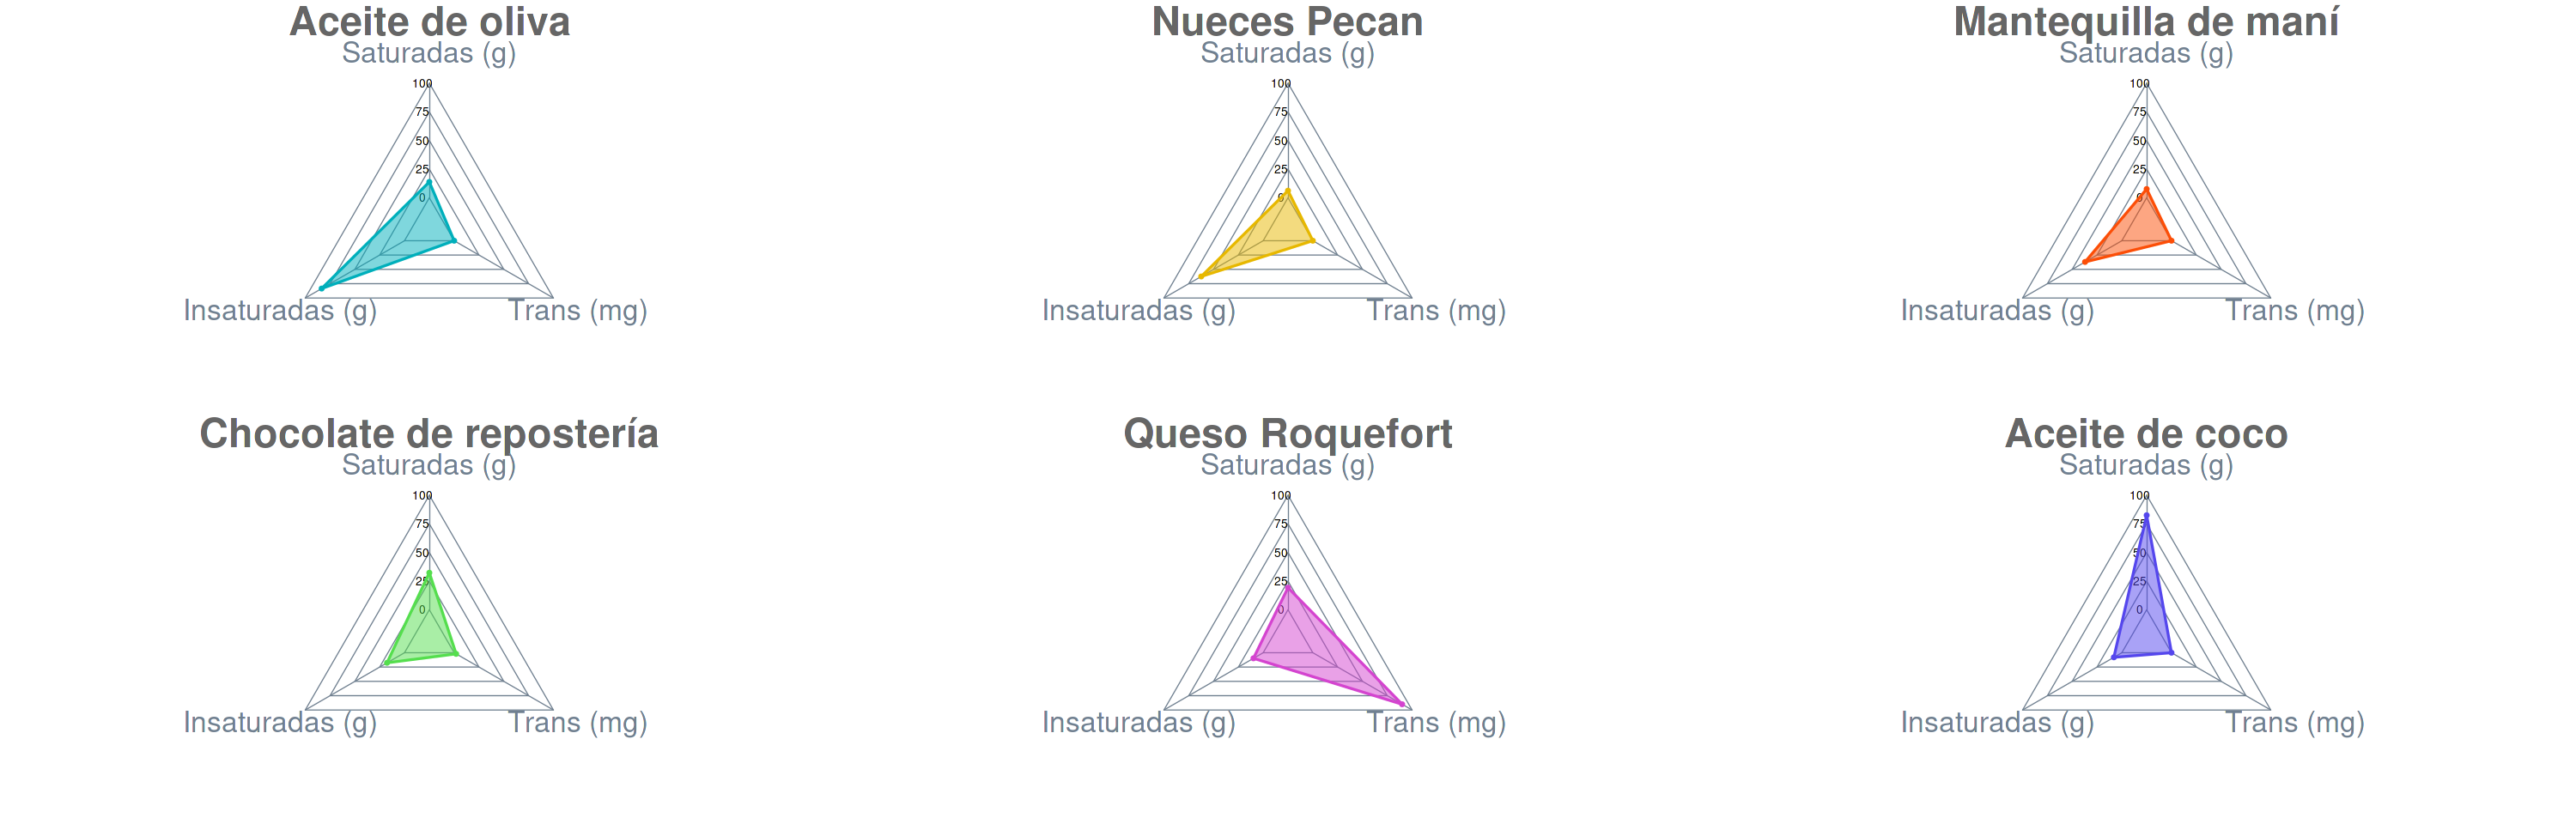

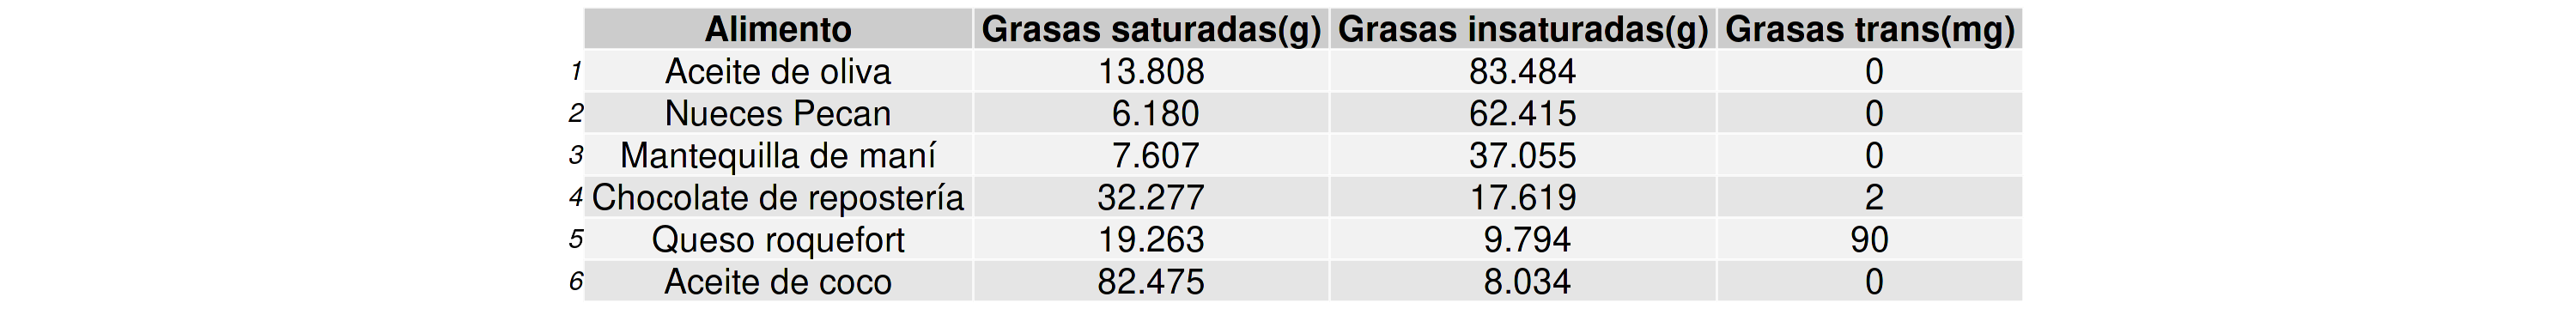

In [39]:
plot_size(25,8)



# 1) Define the variable ranges: maximum and minimum
max_min <- data.frame(
  saturated_fatty_acids_g = c(100, 0), grasasInsaturadas_g = c(100, 0),fatty_acids_total_trans_mg = c(100, 0) )
rownames(max_min) <- c("Max", "Min")
# Bind the variable ranges to the data
df <- rbind(max_min, plt_sp_grasas)

# 2) funcion para crear distintos radar charts
create_beautiful_radarchart <- function(data, color = "#00AFBB", 
                                        vlabels = colnames(data), vlcex = 2.5,
                                        caxislabels = NULL, title = NULL, ...){
    radarchart(
    data, axistype = 1,
    # Customize the polygon
    pcol = color, pfcol = scales::alpha(color, 0.5), plwd = 2, plty = 1,
    # Customize the grid
    cglcol = "slategrey", cglty = 1, cglwd = 0.8,
    # Customize the axis
    axislabcol = "black", 
    # Variable labels
    vlcex = vlcex, vlabels = vlabels,
    caxislabels = caxislabels, title = title, ...
  )
}


# 3) Llamamamos a la función creada con nuestros parametros y nuestros datos
# Define colors and titles
colors <- c("#00AFBB", "#E7B800", "#FC4E07","#55de4e","#d444cf","#5547ed")
titles <- c("Aceite de oliva", "Nueces Pecan", "Mantequilla de maní","Chocolate de repostería","Queso Roquefort","Aceite de coco")
# Reduce plot margin using par()
# Split the screen in 3 parts
op <- par(mar = c(0, 0, 3, 0),family = "Arial",col='slategrey',col.main='gray40',cex.main=3.5) #definimos los márgenes y la fuente del titulo
par(mfrow = c(2,3)) #definimos como se van a distribuir los graficos
# Create the radar chart
for(i in 1:6){
  create_beautiful_radarchart(  #llamamos a la funcion creada antes
    data = df[c(1, 2, i+2), ], caxislabels = c(0, 25, 50, 75, 100),
    color = colors[i], title = titles[i],vlabels=c("Saturadas (g)","Insaturadas (g)","Trans (mg)")
    )
}
par(op)
# https://www.datanovia.com/en/blog/beautiful-radar-chart-in-r-using-fmsb-and-ggplot-packages/#ggplot-radar-chart-using-the-ggradar-r-package

#---------------------------------------------------------------------
#---------------------------------------------------------------------

# TABLA
plot_size(25,3)
tbl_theme <- gridExtra::ttheme_default(
    core = list(fg_params=list(cex = 2.0)),
    colhead = list(fg_params=list(cex = 2.0)),
    rowhead = list(fg_params=list(cex = 1.5)))

table <- gridExtra::tableGrob(plt_sp_grasas_table, theme = tbl_theme)
grid.arrange(table)

**¿Qué alimentos se consideran altos en grasa?** <br/>
Vamos a considerar alimentos altos en grasa en los casos en que haya como minimo 17.5 gramos de grasa, cada 100gramos de alimento.<br/>
Por ejemplo, para 100 gramos de nueces ('Nuts, raw, macadamia nuts'):
* calorías total: 718kcal .
* proteína: 7.91 gramos 
* grasas: 76 gramos 
* carbohidratos: 13.82 gramos

In [40]:
#seleccionamos datos y creamos el objeto para analizar
fat20 = data %>% filter(fat_g >= 17.5)

#library(cleanNLP)
#cnlp_init_udpipe()

annotation <- cnlp_annotate(input = fat20$name)

#genero la lista de palabras , junto a sus respectivos campos para el analisis NLP 
#'upos' muestra que tipo de palabras es (adjetivo, sustantivo, etc)

#----------------------------------------------------------
#filtramos tokens
#----------------------------------------------------------

words=annotation$token%>% filter(upos=='NOUN' | upos=='PROPN' )%>% select(token) #selecciono solo las palabras que son sustantivos o nombres propios

words=words %>%
  na.omit() %>%
  tolower() %>%
  strsplit(split = "\\W") %>% 
  unlist() %>%
  table() %>%
  sort(decreasing = TRUE) #obtengo la frecuencia de cada palabra (cuantas veces aparece cada una)

words=as.data.frame(words) #lo transformo a dataframe para luego usar la funcion wordcloud
words= words %>% filter (.!='fat' & .!='lean') #quito del df las palabras que no representan al alimento propiamente que quiero mostrar
words= words %>% filter(between(Freq, 36, 1000)) #defino un minimo y maximo de ocurrencia de cada palabra, para que la visualizacion quede con más sentido

Processed document 10 of 1253
Processed document 20 of 1253
Processed document 30 of 1253
Processed document 40 of 1253
Processed document 50 of 1253
Processed document 60 of 1253
Processed document 70 of 1253
Processed document 80 of 1253
Processed document 90 of 1253
Processed document 100 of 1253
Processed document 110 of 1253
Processed document 120 of 1253
Processed document 130 of 1253
Processed document 140 of 1253
Processed document 150 of 1253
Processed document 160 of 1253
Processed document 170 of 1253
Processed document 180 of 1253
Processed document 190 of 1253
Processed document 200 of 1253
Processed document 210 of 1253
Processed document 220 of 1253
Processed document 230 of 1253
Processed document 240 of 1253
Processed document 250 of 1253
Processed document 260 of 1253
Processed document 270 of 1253
Processed document 280 of 1253
Processed document 290 of 1253
Processed document 300 of 1253
Processed document 310 of 1253
Processed document 320 of 1253
Processed documen

In [41]:
#----------------------------------------------------------
# creamos visualizacion
#----------------------------------------------------------
#library(wordcloud2) 
 
wc_grasas=wordcloud2(data=words,size=1.0,color=rep_len( c("#4DAF4A","#009E68","#008A7A","#00747D","#025E70"), nrow(words) ))
#,color=brewer.pal(9,"Pastel2")

#https://universaldependencies.org/u/pos/
#https://cran.r-project.org/web/packages/cleanNLP/cleanNLP.pdf

#library(htmlwidgets)
saveWidget(wc_grasas, "wc_grasas.html",selfcontained = F)
#library('IRdisplay')
display_html('<iframe src="wc_grasas.html" width=100% height=450></iframe>')

**¿Qué alimentos altos en grasas es recomendable consumir?** <br/> 
Como vimos anteriormente, a pesar de la mala fama que tienen las grasas, son imprescindibles para un buen funcionamiento del organismo.
Se recomienda basicamente consumir alimentos altos en grasas insaturadas (compuestas de monoinsaturadas y polinsaturadas), y en lo posible disminuir el consumo de grasas saturadas y grasas trans (bueno, en realidad las grasas trans son parte de las insaturadas pero quedemos con este concepto).<br/> 
https://www.nhs.uk/live-well/eat-well/how-to-read-food-labels/

In [42]:
#CREAMOS DF PARA VISUALIZAR

#data$grasasInsaturadas_g = data$monounsaturated_fatty_acids_g + data$polyunsaturated_fatty_acids_g
data$grasasInsaturadas_g_w = data$grasasInsaturadas_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
data$saturated_fatty_acids_g_w = data$saturated_fatty_acids_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
fat20 = data %>% filter(fat_g >= 17.5)

#----------------------------------------------------------------------
#ETIQUETAS DE TRES ALIMENTOS
manteca <- fat20%>%filter(name=='Butter, salted')
mmani <- fat20%>%filter(name=='Peanut butter, without salt, chunk style')
parmesano <- fat20%>%filter(name=='Cheese, hard, parmesan')

a <- list(
  x = manteca$saturated_fatty_acids_g_w,
  y = manteca$grasasInsaturadas_g_w,
  text = "Manteca",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
     ax = -35,
    bgcolor='#fcfcd7',bordercolor='black'
)

b <- list(
  x = mmani$saturated_fatty_acids_g_w,
  y = mmani$grasasInsaturadas_g_w,
  text = "Mantequilla de maní",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = -20,
  ay = -60,
    bgcolor='#fcfcd7',bordercolor='black'
)

c <- list(
  x = parmesano$saturated_fatty_acids_g_w,
  y = parmesano$grasasInsaturadas_g_w,
  text = "Queso parmesano",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = 20,
  ay = 45,
    bgcolor='#fcfcd7',bordercolor='black'
)

#----------------------------------------------------------------------
#VISUALIZACION
plt_fat <- plot_ly(
  fat20, x = ~saturated_fatty_acids_g_w, y = ~grasasInsaturadas_g_w,symbol=~Grupo,symbols=c("circle","circle","circle","circle","circle","circle"),
  color = ~NRF15.3Wins,type = 'scatter',mode = 'markers',
  opacity=0.8,
  text = ~paste("</br> Alimento:",fat20$name,
                 "</br> Grupo:",fat20$Grupo,
                                 "</br> Subgrupo:",fat20$Subgrupo,
                "</br> Proteínas", fat20$protein_g,
                "</br> Carbohidratos:",fat20$carbohydrate_g,
                "</br> Grasas:", fat20$fat_g,
                "</br> Grasas saturadas:", fat20$saturated_fatty_acids_g,
                "</br> Grasas insaturadas:", fat20$grasasInsaturadas_g,
                "</br> NRF 15.3:", fat20$NRF15.3
  )
)
plt_fat <- plt_fat %>% layout(title = list(text = 'Altos en grasas, su relación entre saturadas e insaturadas  (interactivo)',x=0.12, y = 0.99),
                        font=t,
                        xaxis = list(title = 'Grasas saturadas (en gramos) - Winsorized'),
                        yaxis = list(title = 'Grasas insaturadas (en gramos) - Winsorized'),
                        annotations=list(a,b,c,list(x = 9, y = 71.6,showarrow = TRUE,axref='x', ayref='y',ax=5.5,ay=71.6,arrowcolor = "#ff993e"), #flecha
                                         list(text="Alto en grasas saturadas",x = 9, y =69.6,showarrow = FALSE,font=list(color="#ff993e")) #texto
                                        ),
                        shapes=list(type='line', x0= 5, x1= 5, y0=-2, y1=max(fat20$grasasInsaturadas_g_w)+5, #linea de referencia, vertical
                                    line=list(dash='dot', width=2,color="#ff993e") 
                                    ),
                             legend=list(title=list(text='<b> Seleccione grupo(s): </b>')))
#plf_fat

#----------------------------------------------------------------------
# EXPORTAR A HTML                                          
#library(htmlwidgets)
saveWidget(plt_fat, "plt_fat.html")
#library('IRdisplay')
display_html('<iframe src="plt_fat.html" width=100% height=450></iframe>')

**¿Cuándo se considera a un alimento alto en grasas insaturadas?** <br/> 
Cumpliendo dos condiciones: la primera es que al menos el 20% de la energía que aporta el alimento, provenga de las grasas insaturadas. La segunda condición es que de las grasas totales, al menos el 70% sean insaturadas. <br/> 
https://ec.europa.eu/food/safety/labelling-and-nutrition/nutrition-and-health-claims/nutrition-claims_en

In [43]:
#CREAMOS DF PARA VISUALIZAR
#data$grasasInsaturadas_g = data$monounsaturated_fatty_acids_g + data$polyunsaturated_fatty_acids_g
data$grasas_insat_porc=(data$grasasInsaturadas_g*9)/data$calories_100g #1° condicion
data$insat_porc=data$grasasInsaturadas_g/data$fat_g #2° condicion
data$sat_porc=data$saturated_fatty_acids_g/data$fat_g
#data$grasasInsaturadas_g_w = data$grasasInsaturadas_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
#data$saturated_fatty_acids_g_w = data$saturated_fatty_acids_g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
unsat_alto= data %>% filter(insat_porc>=0.7 #al menos 70% del total de grasas, son insaturadas
                            & grasas_insat_porc >= 0.2) #al menos 20% del total de energia que aporta el alimento, vienen de las grasas insaturadas


#----------------------------------------------------------------------
#ETIQUETAS DE TRES ALIMENTOS
palta <- unsat_alto%>%filter(name=='Avocados, all commercial varieties, raw')
ac_oliva <- unsat_alto%>%filter(name=='Oil, salad or cooking, olive')
pecans <- unsat_alto%>%filter(name=='Nuts, pecans')

a <- list(
  x = palta$saturated_fatty_acids_g_w,
  y = palta$grasasInsaturadas_g_w,
  text = "Palta / aguacate",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = -20,
  ay = -60,
    bgcolor='#fcfcd7',bordercolor='black'
)

b <- list(
  x = ac_oliva$saturated_fatty_acids_g_w,
  y = ac_oliva$grasasInsaturadas_g_w,
  text = "Aceite de oliva",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = -20,
  ay = 20,
    bgcolor='#fcfcd7',bordercolor='black'
)

c <- list(
  x = pecans$saturated_fatty_acids_g_w,
  y = pecans$grasasInsaturadas_g_w,
  text = "Nueces Pecan",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = -20,
  ay = 20,
    bgcolor='#fcfcd7',bordercolor='black'
)

#----------------------------------------------------------------------
#VISUALIZACION
plt_insat_fat <- plot_ly(
  unsat_alto, x = ~saturated_fatty_acids_g_w, y = ~grasasInsaturadas_g_w,symbol=~Grupo,symbols=c("circle","circle","circle","circle","circle","circle"),
  color = ~NRF15.3Wins,type = 'scatter',mode = 'markers',
  opacity=0.8,
  text = ~paste("</br> Alimento:",unsat_alto$name,
                 "</br> Grupo:",unsat_alto$Grupo,
                                 "</br> Subgrupo:",unsat_alto$Subgrupo,
                "</br> Proteínas", unsat_alto$protein_g,
                "</br> Carbohidratos:",unsat_alto$carbohydrate_g,
                "</br> Grasas:", unsat_alto$fat_g,
                "</br> Grasas saturadas:", unsat_alto$saturated_fatty_acids_g,
                "</br> Grasas insaturadas:", unsat_alto$grasasInsaturadas_g,
                "</br> NRF 15.3:", unsat_alto$NRF15.3
  )
)
plt_insat_fat <- plt_insat_fat %>% layout(title = list(text = 'Altos en grasas insaturadas (interactivo)',x=0.12, y = 0.99),
                        font=t,
                        xaxis = list(title = 'Grasas saturadas (en gramos) - Winsorized'),
                        yaxis = list(title = 'Grasas insaturadas (en gramos) - Winsorized'),
                        annotations=list(a,b,c,list(x = 10, y = 2,showarrow = TRUE,axref='x', ayref='y',ax=5.5,ay=2,arrowcolor = "#ff993e"), #flecha
                                         list(text="Alto en grasas saturadas",x = 9, y = 4,showarrow = FALSE,font=list(color="#ff993e")) #texto
                                        ),
                        shapes=list(type='line', x0= 5, x1= 5, y0=-2, y1=max(fat20$grasasInsaturadas_g_w+2), #linea de referencia, vertical
                                    line=list(dash='dot', width=2,color="#ff993e") 
                                    ),
                                         legend=list(title=list(text='<b> Seleccione grupo(s): </b>')))
#plt_insat_fat
                    
#----------------------------------------------------------------------
# EXPORTAR A HTML
#library(htmlwidgets)
saveWidget(plt_insat_fat, "plt_insat_fat.html")
#library('IRdisplay')
display_html('<iframe src="plt_insat_fat.html" width=100% height=450></iframe>')

# Bonus track - Sodio en alimentos <br/>
Consideramos alimentos altos en sodio a aquellos en los que este mineral sobrepase los 0.6 gramos (600mg), cada 100 gramos de alimento.<br/>
https://www.nhs.uk/live-well/eat-well/how-to-read-food-labels/

In [44]:
#CREAMOS DF PARA VISUALIZAR
data$sodium_mg_w = data$sodium_mg %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99)) #winsorize para disminuir los outliers
data$calories_100g_w = data$calories_100g %>% Winsorize(na.rm=TRUE,probs = c(0, 0.99))

#----------------------------------------------------------------------
#VISUALIZACION
plt_na <- plot_ly(
  data, x = ~sodium_mg_w, y = ~calories_100g_w,symbol=~Grupo,symbols=c("circle","circle","circle","circle","circle","circle"),
  color = ~NRF15.3Wins,type = 'scatter',mode = 'markers',
  opacity=0.8,
  text = ~paste("</br> Alimento:",data$name,
                 "</br> Grupo:",data$Grupo,
                                 "</br> Subgrupo:",data$Subgrupo,
                "</br> Proteínas", data$protein_g,
                "</br> Carbohidratos:",data$carbohydrate_g,
                "</br> Grasas:", data$fat_g,
                "</br> NRF 15.3:", data$NRF15.3
  )
)
plt_na <- plt_na %>% layout(title = list(text = 'Sodio en alimentos (interactivo)',x=0.12, y = 0.99),
                        font=t,
                        xaxis = list(title = 'Sodio (en mg) - Winsorized'),
                        yaxis = list(title = 'Calorias (kcal) - Winsorized'),
                        annotations=list(list(x = 800, y = 800,showarrow = TRUE,axref='x', ayref='y',ax=650,ay=800,arrowcolor = "#ff993e"), #flecha
                                         list(text="Altos en sodio",x = 725, y = 840,showarrow = FALSE,font=list(color="#ff993e")) #texto
                                        ),
                        shapes=list(type='line', x0= 600, x1= 600, y0=-2, y1=max(data$calories_100g_w+2), #linea de referencia, vertical
                                    line=list(dash='dot', width=2,color="#ff993e") 
                                    ),
                                         legend=list(title=list(text='<b> Seleccione grupo(s): </b>')))
#plt_na
                    
#----------------------------------------------------------------------
# EXPORTAR A HTML
#library(htmlwidgets)
saveWidget(plt_na, "plt_na.html")
#library('IRdisplay')
display_html('<iframe src="plt_na.html" width=100% height=450></iframe>')

# Nutrientes de algunos alimentos comunes

In [45]:
ddl=filter(data_marcas, grepl('dulce', name,ignore.case=TRUE)& grepl('leche',name,ignore.case=TRUE))
ddl= ddl[1,]
avocado=filter(data_marcas, grepl('avocado', name,ignore.case=TRUE))
avocado= avocado[4,]
beer=filter(data_marcas, grepl('beer', name,ignore.case=TRUE) & grepl('alcoholic beverage', name,ignore.case=TRUE))
beer= beer[2,]
empanadas=filter(data_marcas, grepl('empanada', name,ignore.case=TRUE))
arepas=filter(data_marcas, grepl('arepa', name,ignore.case=TRUE))
bigMac=filter(data_marcas, grepl('big mac', name,ignore.case=TRUE))
bigMac= bigMac[1,]
kfc=filter(data_marcas, grepl("KFC, meat and skin with breading, Breast, ORIGINAL RECIPE, Fried Chicken", name,ignore.case=TRUE))
salame=filter(data_marcas, grepl('salami', name,ignore.case=TRUE))
salame= salame[4,]
kitKat=filter(data_marcas, grepl('kit kat', name,ignore.case=TRUE))
kitKat= kitKat[1,]
mm=filter(data_marcas, grepl('m&m', name,ignore.case=TRUE))
mm= mm[6,]
cocacola= filter(data_marcas,name=="Beverages, regular, cola, carbonated")

data_graphs= rbind(ddl,avocado,beer,empanadas,arepas,bigMac,kfc,salame,kitKat,mm,cocacola)


#--------------------------------------------------------------------------------
#CAMBIAMOS LOS NOMBRES DE LOS ALIMENTOS
#--------------------------------------------------------------------------------
#cambiamos los nombres de los alimentos
data_graphs["name"][data_graphs["name"] == "Avocados, all commercial varieties, raw"] <- "Palta/aguacate"
data_graphs["name"][data_graphs["name"] == "Alcoholic beverage, all, regular, beer"] <- "Cerveza"
data_graphs["name"][data_graphs["name"] == "Restaurant, prepared, beef, empanadas, Latino"] <- "Empanadas de carne"
data_graphs["name"][data_graphs["name"] == "Restaurant, arepa (unleavened cornmeal bread), Latino"] <- "Arepas"
data_graphs["name"][data_graphs["name"] == "McDONALD'S, BIG MAC"] <- "Big Mac McDonald's"
data_graphs["name"][data_graphs["name"] == "KFC, meat and skin with breading, Breast, ORIGINAL RECIPE, Fried Chicken"] <- "Pollo KFC"
data_graphs["name"][data_graphs["name"] == "Salami, beef and pork, cooked"] <- "Salame"
data_graphs["name"][data_graphs["name"] == "Candies, KIT KAT Wafer Bar"] <- "Kit Kat"
data_graphs["name"][data_graphs["name"] == "Candies, M&M's Milk Chocolate Candies, MARS SNACKFOOD US"] <- "Confites M&M"
data_graphs["name"][data_graphs["name"] == "Beverages, regular, cola, carbonated"] <- "Gaseosa cola"


In [46]:
df = data_graphs %>%filter(name=='Dulce de Leche')
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_ddl <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_ddl <- subplt_ddl %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt4  
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_ddl, "subplt_ddl.html")
#library('IRdisplay')
display_html('<iframe src="subplt_ddl.html" width=100% height=450></iframe>')

In [47]:
df = data_graphs %>%filter(name=='Palta/aguacate')
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_palta <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_palta <- subplt_palta %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt 2 
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_palta, "subplt_palta.html")
#library('IRdisplay')
display_html('<iframe src="subplt_palta.html" width=100% height=450></iframe>')

In [48]:
df = data_graphs %>%filter(name=='Cerveza')
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_cerv <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_cerv <- subplt_cerv %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt4  
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_cerv, "subplt_cerv.html")
#library('IRdisplay')
display_html('<iframe src="subplt_cerv.html" width=100% height=450></iframe>')

In [49]:
df = data_graphs %>%filter(name=='Empanadas de carne')
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_emp <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_emp <- subplt_emp %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt 2 
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_emp, "subplt_emp.html")
#library('IRdisplay')
display_html('<iframe src="subplt_emp.html" width=100% height=450></iframe>')

In [50]:
df = data_graphs %>%filter(name=='Arepas')
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_arepa <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_arepa <- subplt_arepa %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt 2 
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_arepa, "subplt_arepa.html")
#library('IRdisplay')
display_html('<iframe src="subplt_arepa.html" width=100% height=450></iframe>')

In [51]:
df = data_graphs %>%filter(name=="Big Mac McDonald's")
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_bmac <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_bmac <- subplt_bmac %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt 2 
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_bmac, "subplt_bmac.html")
#library('IRdisplay')
display_html('<iframe src="subplt_bmac.html" width=100% height=450></iframe>')

In [52]:
df = data_graphs %>%filter(name=="Pollo KFC")
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_kfc <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_kfc <- subplt_kfc %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt 2 
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_kfc, "subplt_kfc.html")
#library('IRdisplay')
display_html('<iframe src="subplt_kfc.html" width=100% height=450></iframe>')

In [53]:
df = data_graphs %>%filter(name=='Salame')
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_salame <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_salame <- subplt_salame %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt  
#----------------------------FIN SUBPLOT------------------------------------------

#library(htmlwidgets)
saveWidget(subplt_salame, "subplt_salame.html")
#library('IRdisplay')
display_html('<iframe src="subplt_salame.html" width=100% height=450></iframe>')

In [54]:
df = data_graphs %>%filter(name=="Kit Kat")
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_kkat <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_kkat <- subplt_kkat %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt 2 
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_kkat, "subplt_kkat.html")
#library('IRdisplay')
display_html('<iframe src="subplt_kkat.html" width=100% height=450></iframe>')

In [55]:
df = data_graphs %>%filter(name=="Confites M&M")
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)
suppressMessages({
  df_macros = melt(df_macros)
})

barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)
suppressMessages({
  df_nut = melt(df_nut)
})
df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_mm <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_mm <- subplt_mm %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt  
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_mm, "subplt_mm.html")
#library('IRdisplay')
display_html('<iframe src="subplt_mm.html" width=100% height=450></iframe>')

In [56]:
df = data_graphs %>%filter(name=='Gaseosa cola')
name=df$name 
calorias=df$calories_100g
grupo=df$Grupo
subgrupo=df$Subgrupo
titulo=paste(name,"(100g -",calorias,"kcal)"," <br> Grupo:",grupo,"- Subgrupo:",subgrupo)

#----------------------------INICIO BAR PLOT------------------------------------------
df_macros = df %>% select(name,protein_g,carbohydrate_g,fat_g,NRF15.3) 
df_macros  = df_macros %>% rename("Proteínas" = protein_g, "Carbohidratos"=carbohydrate_g,
                          "Grasas"=fat_g)

suppressMessages({
  df_macros = melt(df_macros)
})


barplot <- plot_ly(df_macros, x = ~variable, y = ~value, type = 'bar',
             text = ~value, textposition = 'auto',opacity=0.9,
             marker = list(color = c("#e41a1c","#377eb8","4daf4a",'grey'),
                           line = list(color = "#565152", width = 1.5)))
barplot <- barplot %>% layout(title = "Macros y NRF15.3",
         xaxis = list(title = ""),
         yaxis = list(title = ""))
#pattern = list(shape="+",size=7)
#----------------------------FIN BAR PLOT------------------------------------------


#----------------------------INICIO DOT PLOT------------------------------------------
df_nut = df%>% select(name,AminEsenc,AminNoEsenc,sugars_g,fiber_g,saturated_fatty_acids_g,grasasInsaturadas_g,fatty_acids_total_trans_mg) 
df_nut  = df_nut %>% rename("Amin. esenciales" = AminEsenc, "Amin. no esenciales"=AminNoEsenc,
                          "Azúcares"=sugars_g,"Fibra"=fiber_g,
                          "G. Saturadas"=saturated_fatty_acids_g, "G. Insaturadas"=grasasInsaturadas_g,"G. Trans (mg)"=fatty_acids_total_trans_mg)

suppressMessages({
  df_nut = melt(df_nut)
})

df_nut$Tipo="A"
df_nut["Tipo"][df_nut["variable"] == "Amin. esenciales"|df_nut["variable"] == "Amin. no esenciales"] <- "Proteína"
df_nut["Tipo"][df_nut["variable"] == "Azúcares"|df_nut["variable"] == "Fibra"] <- "Carbohidrato"
df_nut["Tipo"][df_nut["variable"] == "G. Saturadas"|df_nut["variable"] == "G. Insaturadas"|df_nut["variable"] == "G. Trans (mg)"] <- "Grasa"

df_nut$variable <- factor(df_nut$variable, levels = df_nut$variable[order(df_nut$value)])
dotchart <- plot_ly(df_nut, x = ~value, y = ~variable, name = "variable", type = 'scatter',color=~Tipo,
                    colors = c(Proteína = '#e41a1c', Carbohidrato = '#377eb8', Grasa = '#4daf4a'),size=7,mode = "markers",text = round(df_nut$value,digits=2))%>%
add_text(textfont = t, textposition = "bottom right")
dotchart <- dotchart %>% layout(showlegend=FALSE,
    title = "Composición",
    xaxis = list(title = "Gramos"),
    margin = list(l = 100)
  )
#----------------------------FIN DOT PLOT------------------------------------------


#----------------------------INICIO SUBPLOT------------------------------------------
subplt_coca <- subplot(barplot,dotchart,nrows = 1, margin = 0.1) %>%  
  layout(annotations = list( 
    list(x = 0.05 , y =1.15, text = "Macros y NRF15.3", showarrow = F, xref='paper', yref='paper'), 
    list(x = 0.95 , y = 1.15, text = "Composición", showarrow = F, xref='paper', yref='paper')) )
subplt_coca <- subplt_coca %>% layout(title = titulo, 
         xaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'ffff'), 
         yaxis = list( 
           zerolinecolor = '#ffff', 
           zerolinewidth = 2, 
           gridcolor = 'eeeeee'), 
         showlegend=FALSE,showlegend2=FALSE, 
         margin = 0.01) 
#subplt  
#----------------------------FIN SUBPLOT------------------------------------------


#library(htmlwidgets)
saveWidget(subplt_coca, "subplt_coca.html")
#library('IRdisplay')
display_html('<iframe src="subplt_coca.html" width=100% height=450></iframe>')


**¿Y ahora qué sigue?** <br />
Me gustaría seguir con este análisis, particularmente con vitaminas y minerales. Por el momento, dejo el trabajo en progreso. <br/> 
Agradezco cualquier comentario o sugerencia.